<a href="https://colab.research.google.com/github/kennedot/Github-and-Jupyter-setup/blob/main/Check_Point_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting from Google Drive


In [ ]:
# @title
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# root_dir is the path to your My_Drive folder.
root_dir = "/content/drive/My Drive/"

# i'm storing the data folder in the Colab Notebooks directory at the top level of the Google Drive
data_folder = root_dir + "Colab Notebooks/replication_package/2input_data/"

# change directory to the data folder
os.chdir(data_folder)

Mounted at /content/drive


In [ ]:
# @title
def dta_to_csv(dta_file_path):
  """
  takes a path to a .dta file and converts it to a .csv. The result
  is stored a subdirectory of the original directory named "/csv".

  Arguments:
    dta_file_path: Full path to the .dta file

  """

  # get the directory and file name from the full path
  directory_name, file_name = os.path.split(dta_file_path)

  # read the .dta file into a pandas DataFrame
  print("Converting file", dta_file_path)
  data = pd.io.stata.read_stata(dta_file_path)

  # save the DataFrame as a ".csv" to the "csv" directory in the original path (directory_name).
  # And get rid of the ".dta" by slicing the file_name
  data.to_csv(directory_name + "/csv/" +  file_name[:-4] +  ".csv")

In [ ]:
# @title
def convert_all_dta_to_csv(data_folder):
  """
  Traverse the directory that has path name data_folder. Look for
  .dta files and call dta_to_csv() to convert them to .csv
  """

  # Walk the directory structure
  for root, direc, files in os.walk(data_folder):
    for file in files:
      file_path = os.path.join(root, file)

      # split the file into its name and extension
      filename, extension = os.path.splitext(file)

      # does the file have a .dta extension
      if extension.lower() == ('.dta'):
        dir_path = root # store current directory

        # Create a 'csv' subdirectory if it doesn't exist
        csv_dir_path = os.path.join(dir_path, 'csv')
        if not os.path.exists(csv_dir_path):
          os.makedirs(csv_dir_path)

        # call the conversion function
        dta_to_csv(file_path)

# call the function to do the conversion
convert_all_dta_to_csv(data_folder)

Converting file /content/drive/My Drive/Colab Notebooks/replication_package/2input_data/brfss_2017.dta
Converting file /content/drive/My Drive/Colab Notebooks/replication_package/2input_data/redemption_data.dta
Converting file /content/drive/My Drive/Colab Notebooks/replication_package/2input_data/main_survey_attrit_info.dta
Converting file /content/drive/My Drive/Colab Notebooks/replication_package/2input_data/main_survey.dta
Converting file /content/drive/My Drive/Colab Notebooks/replication_package/2input_data/sender_rating_survey.dta


In [ ]:
# @title
main_survey_data = pd.read_csv(data_folder + "csv/main_survey.csv")

Confirming that the data has been converted to a csv DataFrame

In [ ]:
# @title
main_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Columns: 165 entries, Unnamed: 0 to resp_any_med
dtypes: float64(67), int64(70), object(28)
memory usage: 3.6+ MB


In [ ]:
# @title
main_survey_data.head()

Unnamed: 0     id authority video_length video_race  el_status  \
0           0  18197       doc         long      white        NaN   
1           1   5465       doc        short      white        NaN   
2           2   7534       doc        short      white        NaN   
3           3   5456       lay        short      black        NaN   
4           4   4758       doc         long      white        NaN   

   el_progress  el_durationinseconds  el_finished      el_responseid  ...  \
0          NaN                   NaN          NaN  R_6LsRVVTs2vjptgl  ...   
1          NaN                   NaN          NaN  R_2P0vAZKzXespjdQ  ...   
2          NaN                   NaN          NaN  R_10ryZI0l77UTzwy  ...   
3          NaN                   NaN          NaN  R_2tL0vrhh2xYKLKL  ...   
4          NaN                   NaN          NaN  R_2v8J0lMeEAma2rt  ...   

        area_division     region  region_num  region_midwest  \
0  West South Central      South       South             0.0   
1  West South Central      South       South             0.0   
2      South Atlantic      South       South             0.0   
3  West North Central    Midwest     Midwest             1.0   
4     Middle Atlantic  Northeast   Northeast             0.0   

   region_northeast  region_south  region_west  missing_region  resp_no_med  \
0               0.0           1.0          0.0             0.0          1.0   
1               0.0           1.0          0.0             0.0          1.0   
2               0.0           1.0          0.0             0.0          1.0   
3               0.0           0.0          0.0             0.0          1.0   
4               1.0           0.0          0.0             0.0          1.0   

  resp_any_med  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 165 columns]

In [ ]:
# @title
main_survey_data.shape

(2893, 165)

In [ ]:
# @title
main_survey_data.describe()

Unnamed: 0            id  el_status  el_progress  \
count  2893.000000   2893.000000      665.0        665.0   
mean   1446.000000  11430.949188        0.0        100.0   
std     835.281489   4927.858611        0.0          0.0   
min       0.000000   3882.000000        0.0        100.0   
25%     723.000000   7434.000000        0.0        100.0   
50%    1446.000000  10444.000000        0.0        100.0   
75%    2169.000000  15538.000000        0.0        100.0   
max    2892.000000  20809.000000        0.0        100.0   

       el_durationinseconds  el_finished  el_flushot  el_liklihood_prior  \
count            665.000000        665.0  665.000000          529.000000   
mean            1390.007519          1.0    1.750376            4.521739   
std            15655.434822          0.0    0.433121            3.636411   
min              101.000000          1.0    1.000000            0.000000   
25%              221.000000          1.0    2.000000            1.000000   
50%              303.000000          1.0    2.000000            5.000000   
75%              416.000000          1.0    2.000000            8.000000   
max           355384.000000          1.0    2.000000           10.000000   

       el_reaction_prior_14  el_coupon_family_friend  ...    actor_age  \
count            665.000000               144.000000  ...  2893.000000   
mean              32.030075                 5.527778  ...    43.929831   
std               29.935256                 0.500970  ...     8.611300   
min                0.000000                 5.000000  ...    30.000000   
25%                3.000000                 5.000000  ...    38.000000   
50%               26.000000                 6.000000  ...    42.000000   
75%               58.000000                 6.000000  ...    51.000000   
max              100.000000                 6.000000  ...    59.000000   

          mturk_se    statefips  region_midwest  region_northeast  \
count  2847.000000  2879.000000     2879.000000        2879.00000   
mean      0.482965    28.663077        0.209448           0.14901   
std       0.798568    15.517338        0.406985           0.35616   
min      -1.000000     1.000000        0.000000           0.00000   
25%       0.000000    13.000000        0.000000           0.00000   
50%       1.000000    29.000000        0.000000           0.00000   
75%       1.000000    42.000000        0.000000           0.00000   
max       1.000000    56.000000        1.000000           1.00000   

       region_south  region_west  missing_region  resp_no_med  resp_any_med  
count   2879.000000  2879.000000     2893.000000   2893.00000    2893.00000  
mean       0.520320     0.121223        0.004839      0.73868       0.26132  
std        0.499674     0.326443        0.069408      0.43943       0.43943  
min        0.000000     0.000000        0.000000      0.00000       0.00000  
25%        0.000000     0.000000        0.000000      0.00000       0.00000  
50%        1.000000     0.000000        0.000000      1.00000       0.00000  
75%        1.000000     0.000000        0.000000      1.00000       1.00000  
max        1.000000     1.000000        1.000000      1.00000       1.00000  

[8 rows x 137 columns]

In [ ]:
# @title
main_survey_data.info('columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 165 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    Unnamed: 0                     int64  
 1    id                             int64  
 2    authority                      object 
 3    video_length                   object 
 4    video_race                     object 
 5    el_status                      float64
 6    el_progress                    float64
 7    el_durationinseconds           float64
 8    el_finished                    float64
 9    el_responseid                  object 
 10   el_flushot                     float64
 11   el_liklihood_prior             float64
 12   el_reaction_prior_14           float64
 13   el_coupon_family_friend        float64
 14   el_gender_recall               float64
 15   el_race_recall                 float64
 16   el_authority_recall            float64
 17   el_sick                        

# QUESTION 1 Data Cleaning Code
Do regional and/or pharmacy promixity differences predict covid vaccination hesitancy within a population?

This code calls for columns **pharmacy_lookup, treatment_group, covid_vaccine_intent, pharmacy_distance,** and regional data: **region_midwest, region_northeast, region_south,** and **region_west**

In [ ]:
# @title
df = main_survey_data
question_1 = df[['pharmacy_lookup', 'treatment_group', 'covid_vaccine_intent_1', 'pharmacy_distance', 'region_midwest', 'region_northeast', 'region_south', 'region_west']].copy()
question_1.head(15)

pharmacy_lookup        treatment_group  covid_vaccine_intent_1  \
0               5.0   black white doc long                     1.0   
1               6.0  black white doc short                     NaN   
2               5.0  black white doc short                     NaN   
3               5.0  black black lay short                     NaN   
4               6.0   black white doc long                     NaN   
5               5.0  white black doc short                     8.0   
6               6.0  black black lay short                     5.0   
7               6.0  black black doc short                     3.0   
8               6.0  white black doc short                     6.0   
9               5.0  white black doc short                     7.0   
10              6.0   black white doc long                     0.0   
11              6.0  black black lay short                     5.0   
12              6.0   black white doc long                     0.0   
13              5.0  white white doc short                     5.0   
14              5.0  white white doc short                     0.0   

    pharmacy_distance  region_midwest  region_northeast  region_south  \
0                 3.0             0.0               0.0           1.0   
1                 1.0             0.0               0.0           1.0   
2                 3.0             0.0               0.0           1.0   
3                 1.0             1.0               0.0           0.0   
4                 1.0             0.0               1.0           0.0   
5                 2.0             NaN               NaN           NaN   
6                 3.0             0.0               0.0           0.0   
7                 1.0             0.0               0.0           1.0   
8                 0.5             1.0               0.0           0.0   
9                 1.0             0.0               1.0           0.0   
10               15.0             0.0               0.0           0.0   
11                7.0             0.0               1.0           0.0   
12               10.0             0.0               0.0           1.0   
13                1.0             0.0               0.0           0.0   
14                3.0             0.0               0.0           1.0   

    region_west  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
5           NaN  
6           1.0  
7           0.0  
8           0.0  
9           0.0  
10          1.0  
11          0.0  
12          0.0  
13          1.0  
14          0.0

In [ ]:
# @title
question_1.value_counts('treatment_group')

treatment_group
white white doc short    614
white black doc short    607
black black lay short    430
black white doc short    417
black black doc short    415
black white doc long     410
Name: count, dtype: int64

In [ ]:
# @title
ftg1 = {
    'category': ('white white doc short', 'white black doc short', 'black black lay short', 'black white doc short', 'black black doc short', 'black white doc long'),
    'value': [1, 2, 3, 4, 5, 6]
}

ftg1 = dict(zip(ftg1['category'], ftg1['value']))

question_1['treatment_group'] = question_1['treatment_group'].map(ftg1)

print(question_1['treatment_group'].value_counts())


treatment_group
1    614
2    607
3    430
4    417
5    415
6    410
Name: count, dtype: int64


In [ ]:
# @title
question_1.isna().sum()

pharmacy_lookup             2
treatment_group             0
covid_vaccine_intent_1    854
pharmacy_distance           0
region_midwest             14
region_northeast           14
region_south               14
region_west                14
dtype: int64

In [ ]:
# @title
question_1.describe()

pharmacy_lookup  treatment_group  covid_vaccine_intent_1  \
count      2891.000000      2893.000000             2039.000000   
mean          5.639917         3.221915                4.538990   
std           0.480107         1.733201                3.716436   
min           5.000000         1.000000                0.000000   
25%           5.000000         2.000000                0.000000   
50%           6.000000         3.000000                5.000000   
75%           6.000000         5.000000                8.000000   
max           6.000000         6.000000               10.000000   

       pharmacy_distance  region_midwest  region_northeast  region_south  \
count        2893.000000     2879.000000        2879.00000   2879.000000   
mean            8.877177        0.209448           0.14901      0.520320   
std           105.121416        0.406985           0.35616      0.499674   
min             0.000000        0.000000           0.00000      0.000000   
25%             1.000000        0.000000           0.00000      0.000000   
50%             2.000000        0.000000           0.00000      1.000000   
75%             5.000000        0.000000           0.00000      1.000000   
max          5280.000000        1.000000           1.00000      1.000000   

       region_west  
count  2879.000000  
mean      0.121223  
std       0.326443  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [ ]:
# @title
question_1['covid_vaccine_intent_1'] = pd.to_numeric(question_1['covid_vaccine_intent_1'], errors='coerce')

mean_vaccine = question_1['covid_vaccine_intent_1'].mean()
missing_vaccine_intent_count = question_1['covid_vaccine_intent_1'].isnull().sum()

question_1['covid_vaccine_intent_1'] = question_1['covid_vaccine_intent_1'].fillna(mean_vaccine)
print(f"Replaced {missing_vaccine_intent_count} missing values with the mean.")

Replaced 854 missing values with the mean.


In [ ]:
# @title
question_1['pharmacy_lookup'] = pd.to_numeric(question_1['pharmacy_lookup'])

mean_pharm = question_1['pharmacy_lookup'].mean()
missing_pharm_count = question_1['pharmacy_lookup'].isnull().sum()

question_1['pharmacy_lookup'] = question_1['pharmacy_lookup'].fillna(mean_pharm)
print(f"Replaced {missing_pharm_count} missing values with the mean.")

Replaced 2 missing values with the mean.


In [ ]:
# @title
# Decided too drop thesse 14 entries due to entries only being 1s and 0s.
question_1 = question_1.dropna(subset=['region_midwest', 'region_northeast', 'region_south', 'region_west'])

In [ ]:
# @title
#NaN check
question_1.isna().sum()

pharmacy_lookup           0
treatment_group           0
covid_vaccine_intent_1    0
pharmacy_distance         0
region_midwest            0
region_northeast          0
region_south              0
region_west               0
dtype: int64

In [ ]:
# @title
columns_to_convert = ['pharmacy_lookup', 'region_midwest', 'region_northeast', 'region_south', 'region_west']
question_1[columns_to_convert] = question_1[columns_to_convert].astype(int)
print(question_1[columns_to_convert].dtypes)

pharmacy_lookup     int64
region_midwest      int64
region_northeast    int64
region_south        int64
region_west         int64
dtype: object


In [ ]:
# @title
question_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 2892
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pharmacy_lookup         2879 non-null   int64  
 1   treatment_group         2879 non-null   int64  
 2   covid_vaccine_intent_1  2879 non-null   float64
 3   pharmacy_distance       2879 non-null   float64
 4   region_midwest          2879 non-null   int64  
 5   region_northeast        2879 non-null   int64  
 6   region_south            2879 non-null   int64  
 7   region_west             2879 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 202.4 KB


In [ ]:
# @title
question_1.head(15)

pharmacy_lookup  treatment_group  covid_vaccine_intent_1  \
0                 5                6                 1.00000   
1                 6                4                 4.53899   
2                 5                4                 4.53899   
3                 5                3                 4.53899   
4                 6                6                 4.53899   
6                 6                3                 5.00000   
7                 6                5                 3.00000   
8                 6                2                 6.00000   
9                 5                2                 7.00000   
10                6                6                 0.00000   
11                6                3                 5.00000   
12                6                6                 0.00000   
13                5                1                 5.00000   
14                5                1                 0.00000   
15                6                1                 0.00000   

    pharmacy_distance  region_midwest  region_northeast  region_south  \
0                 3.0               0                 0             1   
1                 1.0               0                 0             1   
2                 3.0               0                 0             1   
3                 1.0               1                 0             0   
4                 1.0               0                 1             0   
6                 3.0               0                 0             0   
7                 1.0               0                 0             1   
8                 0.5               1                 0             0   
9                 1.0               0                 1             0   
10               15.0               0                 0             0   
11                7.0               0                 1             0   
12               10.0               0                 0             1   
13                1.0               0                 0             0   
14                3.0               0                 0             1   
15               10.0               0                 0             0   

    region_west  
0             0  
1             0  
2             0  
3             0  
4             0  
6             1  
7             0  
8             0  
9             0  
10            1  
11            0  
12            0  
13            1  
14            0  
15            1

# QUESTION 2 Data Cleaning Code
Do the video interventions produce spillover effects on broader institutional trust? Are these spillover effects strongest among subgroups with low income or limited insurance coverage?

This code calls for columns **video_length, video_race, health_insurance, income, treatment_group, rating_trust**


In [ ]:
# @title
df = main_survey_data
question_2 = df[['video_length', 'video_race', 'treatment_group', 'health_insurance', 'income', 'rating_trust']].copy()
question_2.head()


video_length video_race        treatment_group  health_insurance  income  \
0         long      white   black white doc long                 2       4   
1        short      white  black white doc short                 2       6   
2        short      white  black white doc short                 1       5   
3        short      black  black black lay short                 1       5   
4         long      white   black white doc long                 1       1   

   rating_trust  
0             6  
1             5  
2             6  
3             5  
4             5

In [ ]:
# @title
question_2.isna().sum() #ISNT THIS BEAUTIFUL!

video_length        0
video_race          0
treatment_group     0
health_insurance    0
income              0
rating_trust        0
dtype: int64

In [ ]:
# @title
video_race_fix = {
    'category': ('white', 'black'),
    'value': [0, 1]
}

video_race2 = dict(zip(video_race_fix['category'], video_race_fix['value']))

question_2['video_race'] = question_2['video_race'].map(video_race2)

print(question_2['video_race'].value_counts())

video_race
1    1452
0    1441
Name: count, dtype: int64


In [ ]:
# @title
video_length_fix = {
    'category': ('short', 'long'),
    'value': [0, 1]
}

video_length2 = dict(zip(video_length_fix['category'], video_length_fix['value']))

question_2['video_length'] = question_2['video_length'].map(video_length2)

print(question_2['video_length'].value_counts())

video_length
0    2483
1     410
Name: count, dtype: int64


In [ ]:
# @title
ftg2 = {
    'category': ('white white doc short', 'white black doc short', 'black black lay short', 'black white doc short', 'black black doc short', 'black white doc long'),
    'value': [1, 2, 3, 4, 5, 6]
}

ftgmap2 = dict(zip(ftg2['category'], ftg2['value']))

question_2['treatment_group'] = question_2['treatment_group'].map(ftgmap2)

print(question_2['treatment_group'].value_counts())

treatment_group
1    614
2    607
3    430
4    417
5    415
6    410
Name: count, dtype: int64


In [ ]:
# @title
question_2.head(15)

video_length  video_race  treatment_group  health_insurance  income  \
0              1           0                6                 2       4   
1              0           0                4                 2       6   
2              0           0                4                 1       5   
3              0           1                3                 1       5   
4              1           0                6                 1       1   
5              0           1                2                 2      11   
6              0           1                3                 1       2   
7              0           1                5                 3       5   
8              0           1                2                 1       2   
9              0           1                2                 1      12   
10             1           0                6                 1       2   
11             0           1                3                 2       1   
12             1           0                6                 3      11   
13             0           0                1                 1       2   
14             0           0                1                 2       3   

    rating_trust  
0              6  
1              5  
2              6  
3              5  
4              5  
5              5  
6              6  
7              5  
8              6  
9              6  
10             1  
11             5  
12             1  
13             6  
14             7

# TIME TO MAKE VISUALIZATIONS!!! EEEEEEEK

# Question 1 Data Visualization


In [ ]:
question_1.info()
print(question_1.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 2892
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pharmacy_lookup         2879 non-null   int64  
 1   treatment_group         2879 non-null   int64  
 2   covid_vaccine_intent_1  2879 non-null   float64
 3   pharmacy_distance       2879 non-null   float64
 4   region_midwest          2879 non-null   int64  
 5   region_northeast        2879 non-null   int64  
 6   region_south            2879 non-null   int64  
 7   region_west             2879 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 202.4 KB
       pharmacy_lookup  treatment_group  covid_vaccine_intent_1  \
count      2879.000000      2879.000000             2879.000000   
mean          5.640848         3.225773                4.530148   
std           0.479835         1.734181                3.117289   
min           5.000000         1.000000          

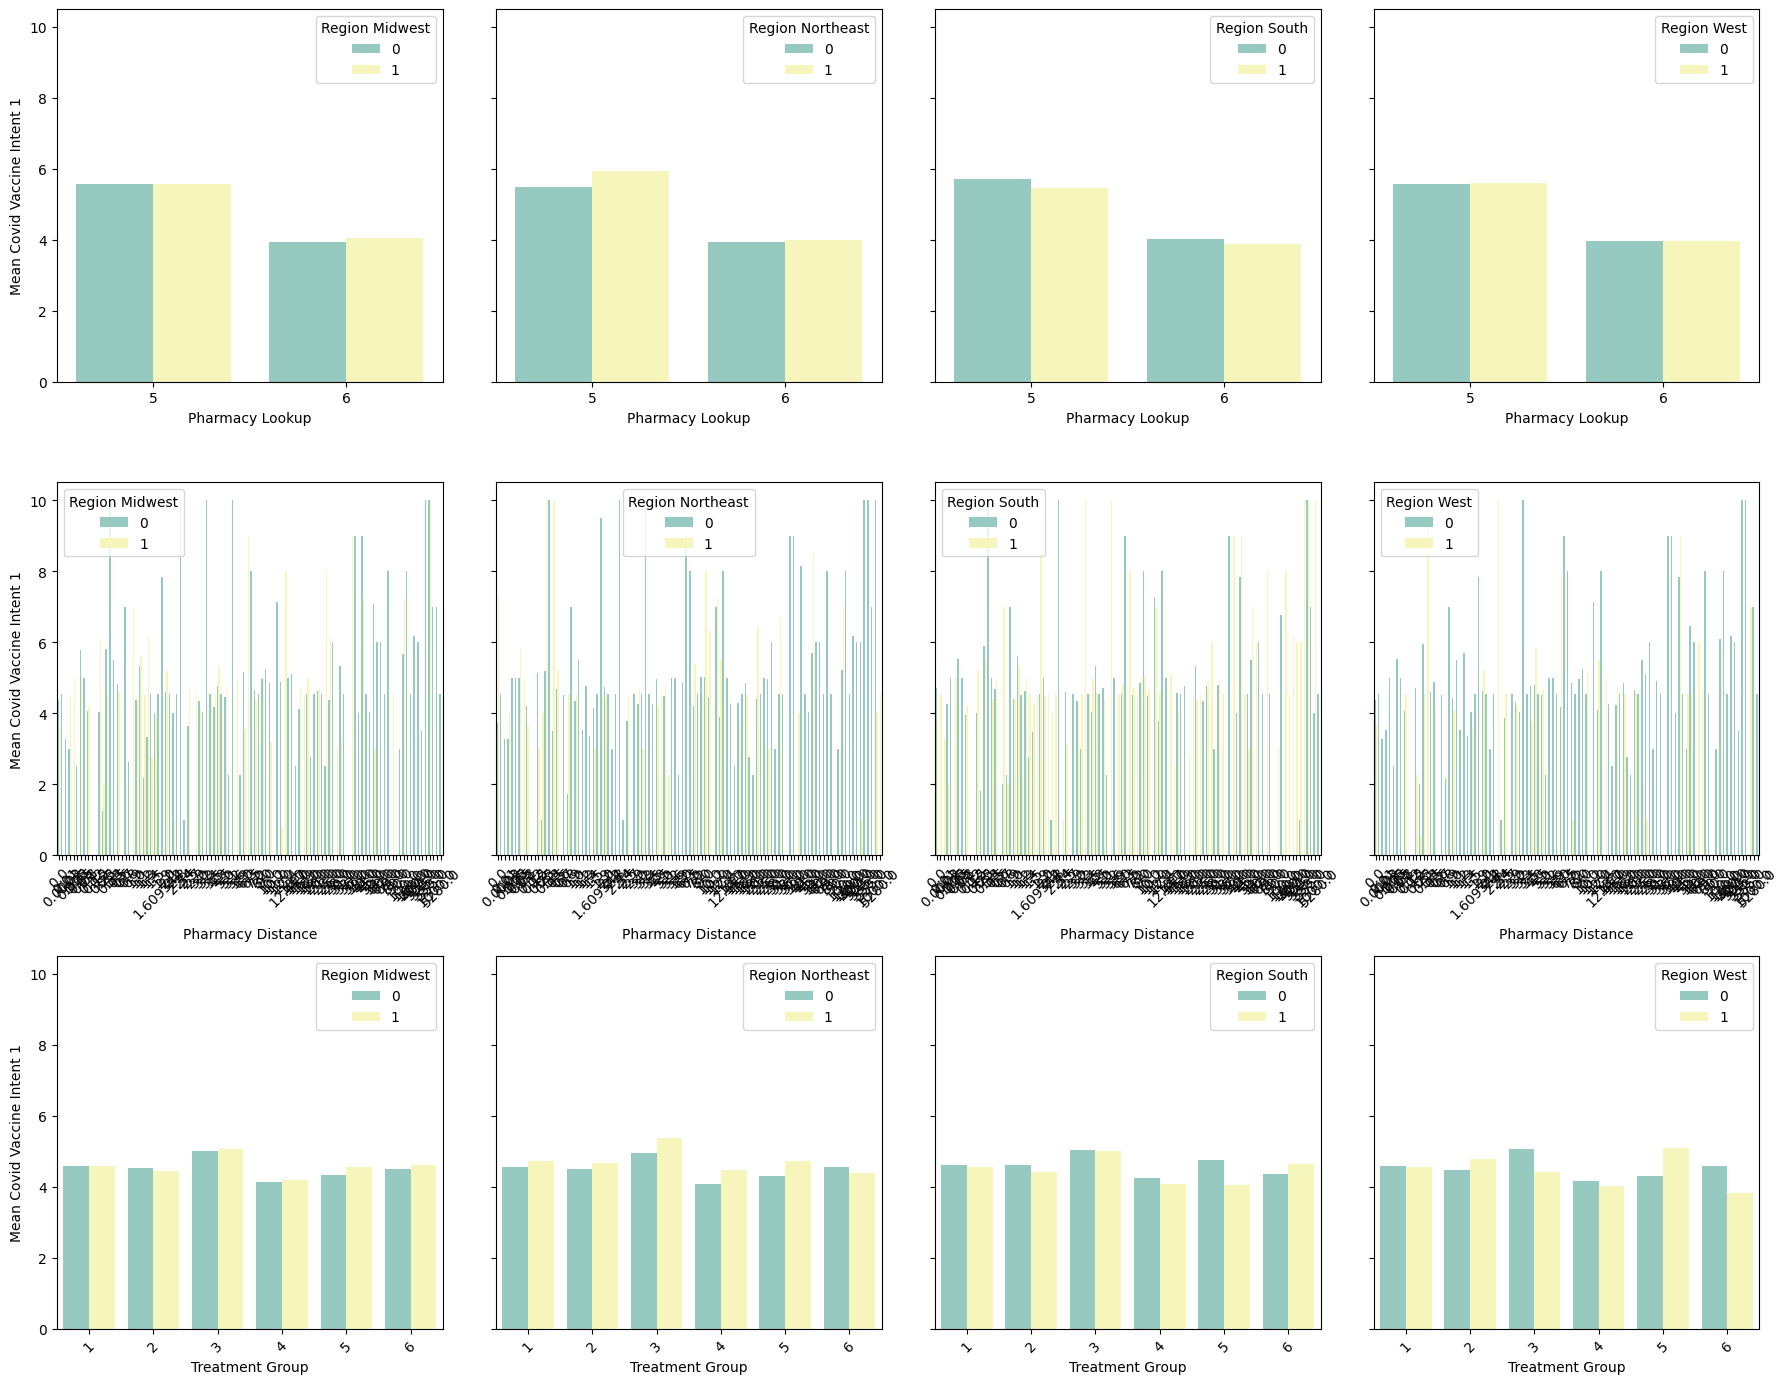

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

main_categorical_vars = ['pharmacy_lookup', 'pharmacy_distance', 'treatment_group']
hue_categorizing_vars = ['region_midwest', 'region_northeast', 'region_south', 'region_west']
target_col = 'covid_vaccine_intent_1'

fig, axes = plt.subplots(len(main_categorical_vars), len(hue_categorizing_vars),
                         figsize=(18, 5 * len(main_categorical_vars)), sharey=True)

if len(main_categorical_vars) == 1:
    axes = [axes]
elif len(hue_categorizing_vars) == 1:
    axes = [[ax] for ax in axes]


for i, main_col in enumerate(main_categorical_vars):
    for j, hue_col in enumerate(hue_categorizing_vars):
        ax = axes[i][j]

        mean_trust_grouped = question_1.groupby([main_col, hue_col])[target_col].mean().reset_index()

        sns.barplot(x=main_col, y=target_col, hue=hue_col, data=mean_trust_grouped, ax=ax, palette='Set3')

        ax.set_xlabel(main_col.replace("_", " ").title())
        ax.set_ylabel(f'Mean {target_col.replace("_", " ").title()}' if j == 0 else '')
        ax.legend(title=hue_col.replace("_", " ").title())

        if question_1[main_col].nunique() > 5:
            ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig('/content/drive/MyDrive/question_1bar.png')
plt.show()

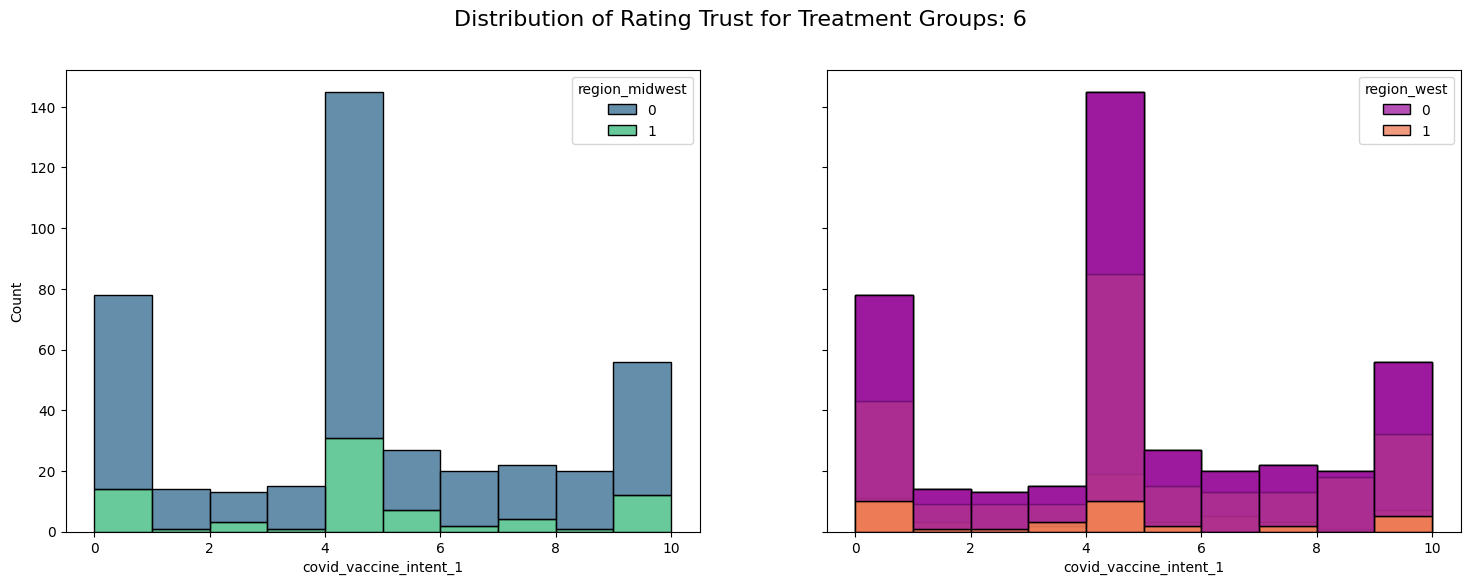

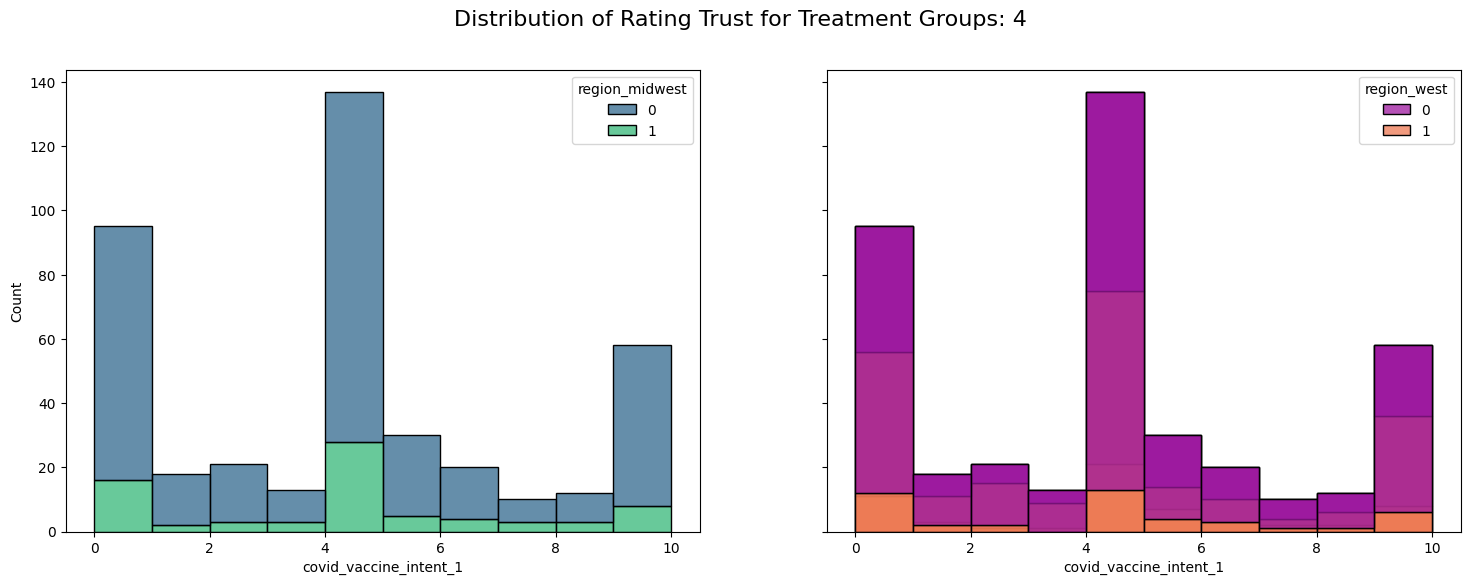

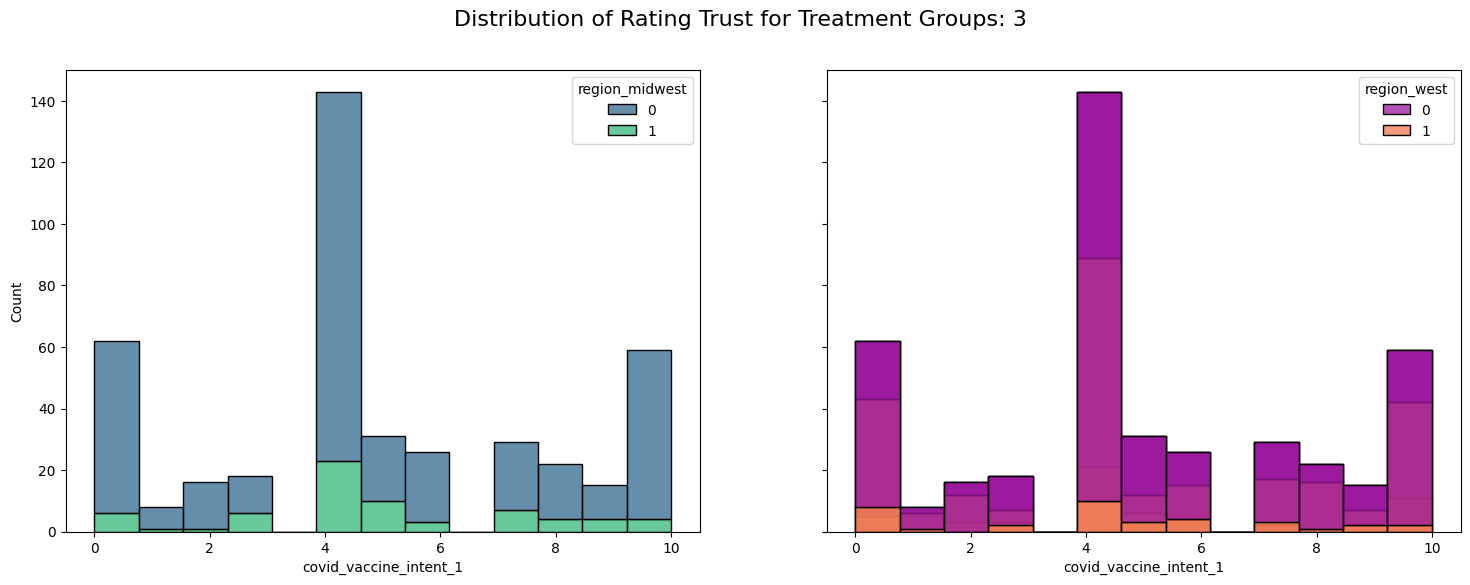

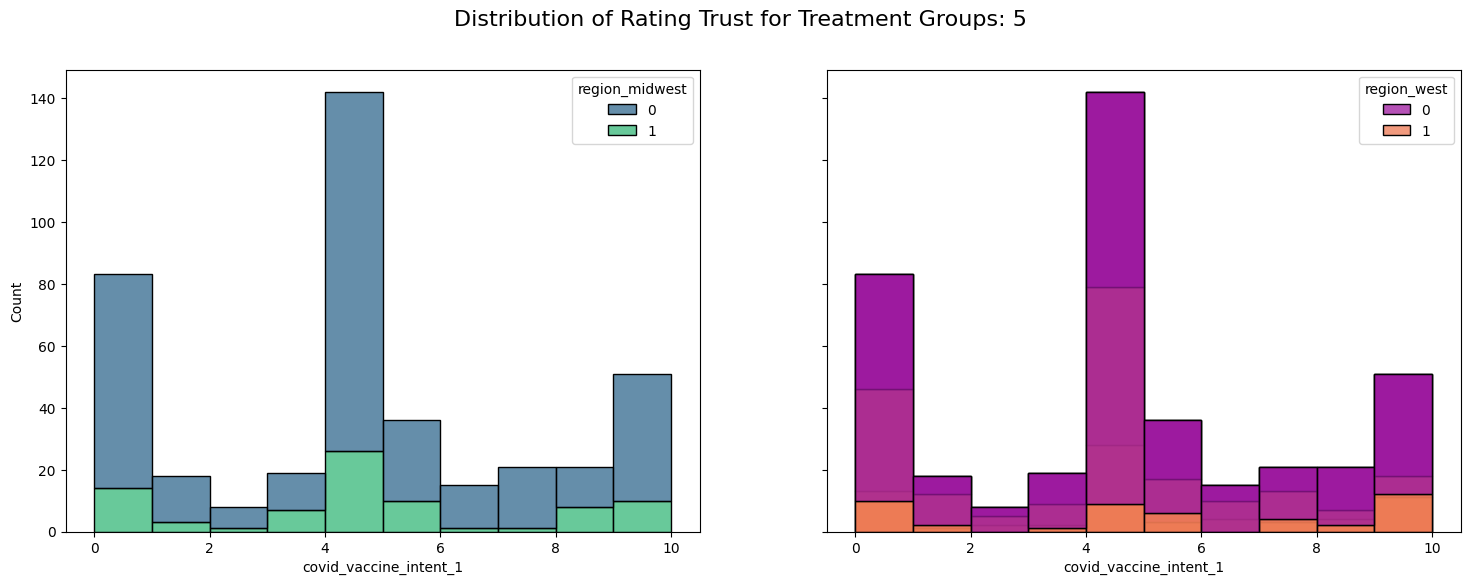

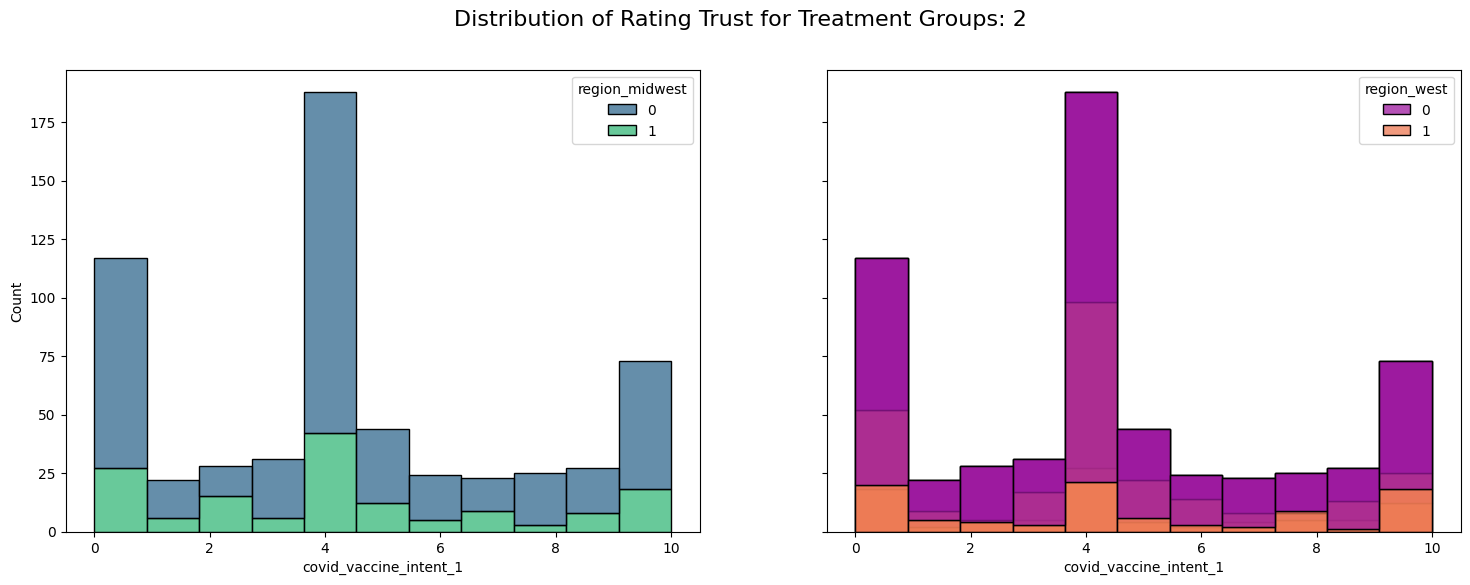

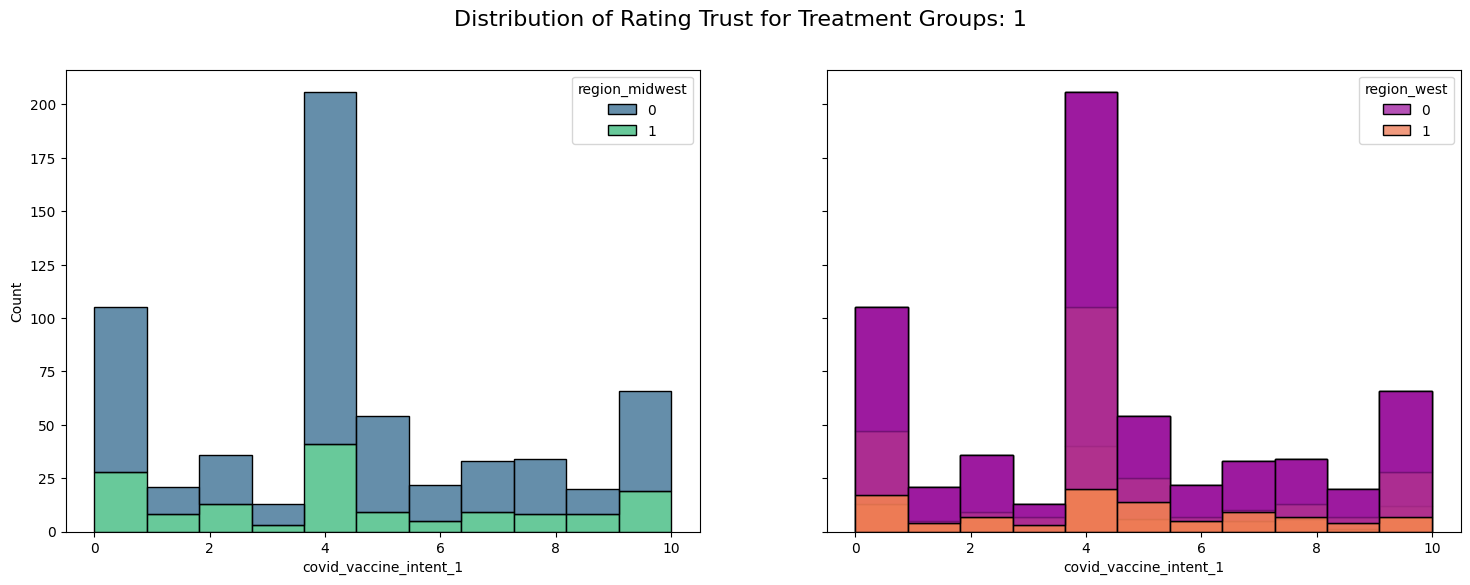

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_tregroup = question_1['treatment_group'].unique()

for treat_grp in unique_tregroup:
    filtered_df = question_1[question_1['treatment_group'] == treat_grp]

    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

    sns.histplot(data=filtered_df, x='covid_vaccine_intent_1', hue='region_midwest', multiple='stack', ax=axes[0], palette='viridis', legend=True)

    sns.histplot(data=filtered_df, x='covid_vaccine_intent_1', hue='region_northeast', multiple='stack', ax=axes[1], palette='plasma', legend=True)

    sns.histplot(data=filtered_df, x='covid_vaccine_intent_1', hue='region_south', multiple='stack', ax=axes[1], palette='plasma', legend=True)

    sns.histplot(data=filtered_df, x='covid_vaccine_intent_1', hue='region_west', multiple='stack', ax=axes[1], palette='plasma', legend=True)

    plt.suptitle(f'Distribution of Rating Trust for Treatment Groups: {treat_grp}', fontsize=16)
    plt.savefig('/content/drive/MyDrive/question1histogram.png')
    plt.show()

/tmp/ipython-input-2777277796.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)


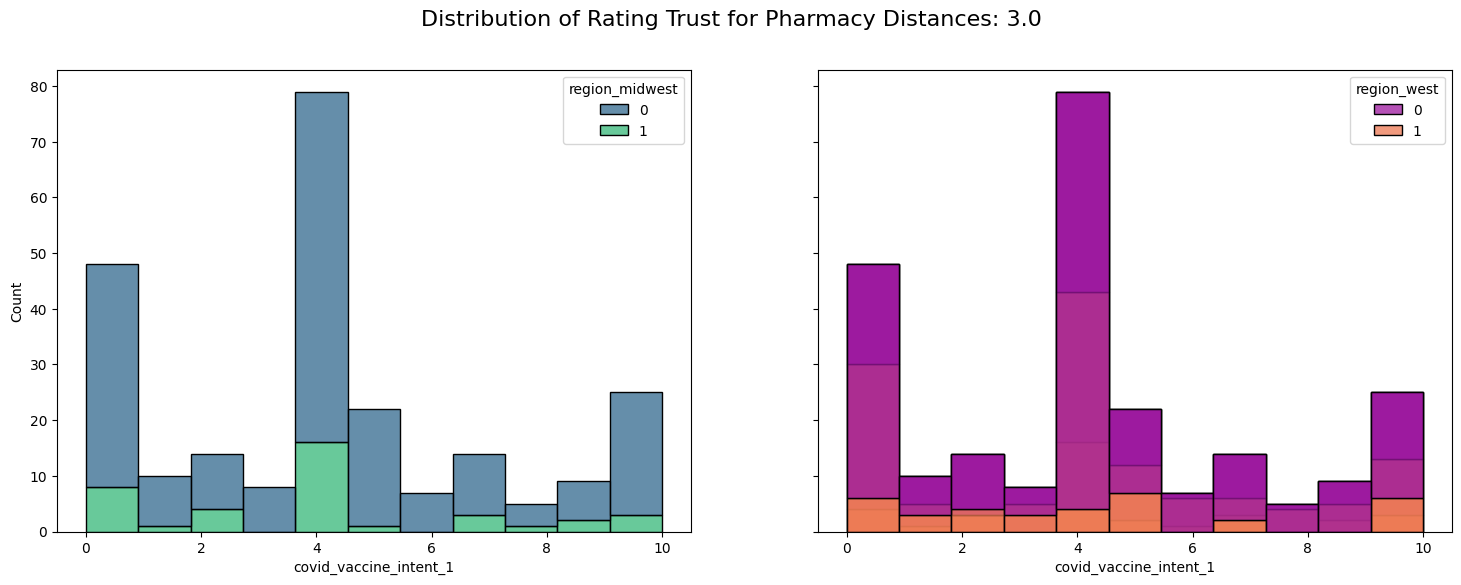

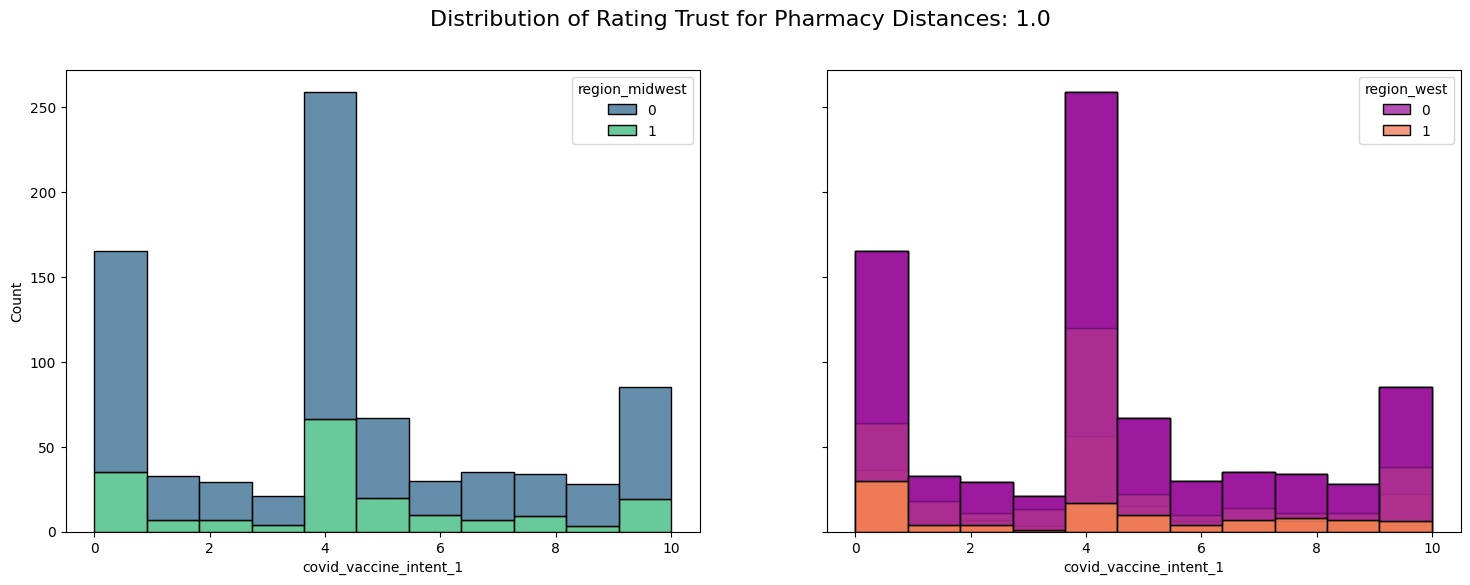

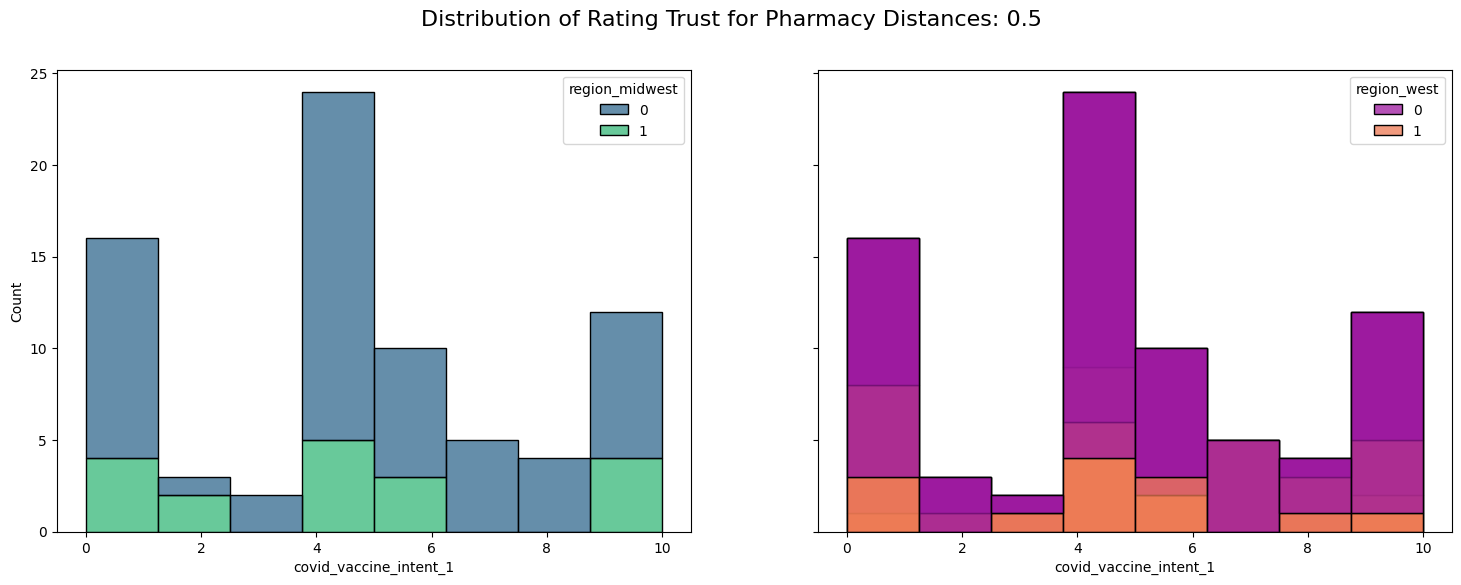

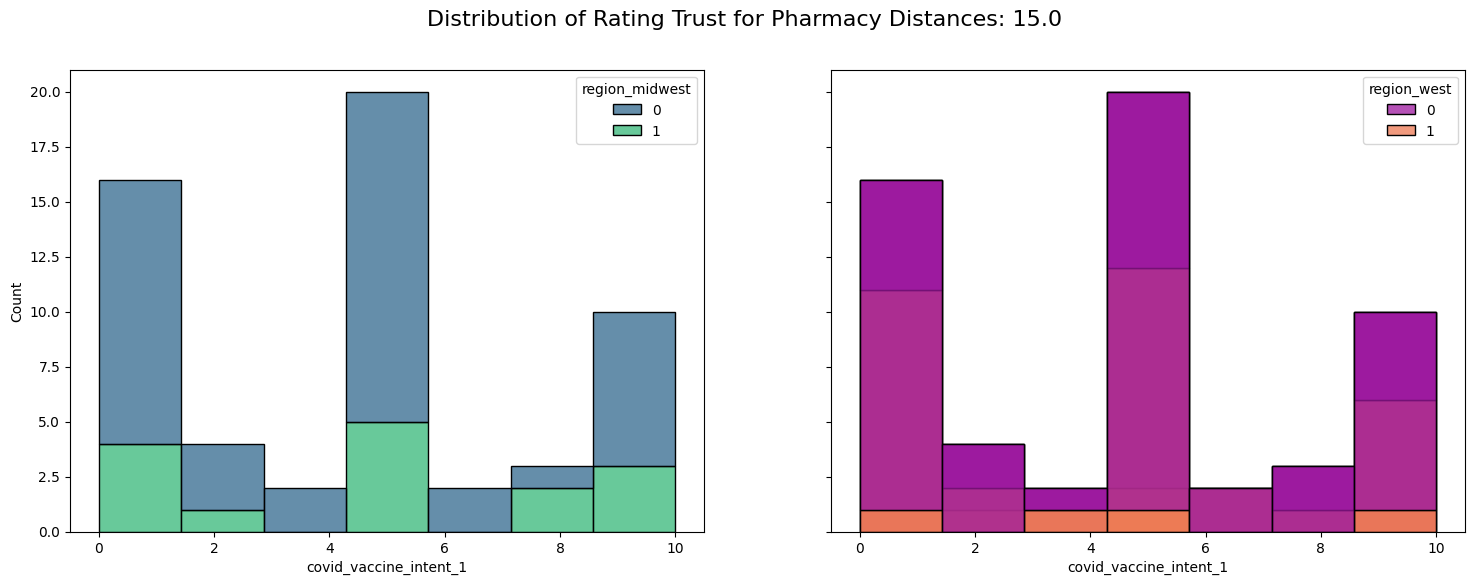

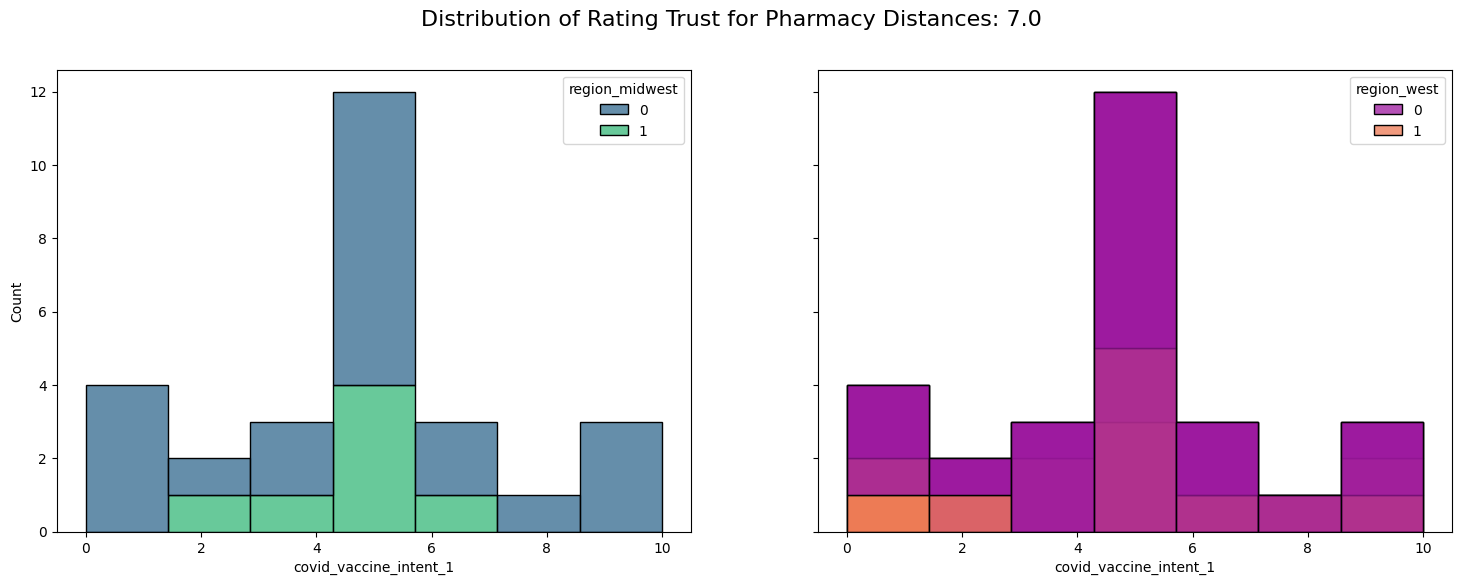

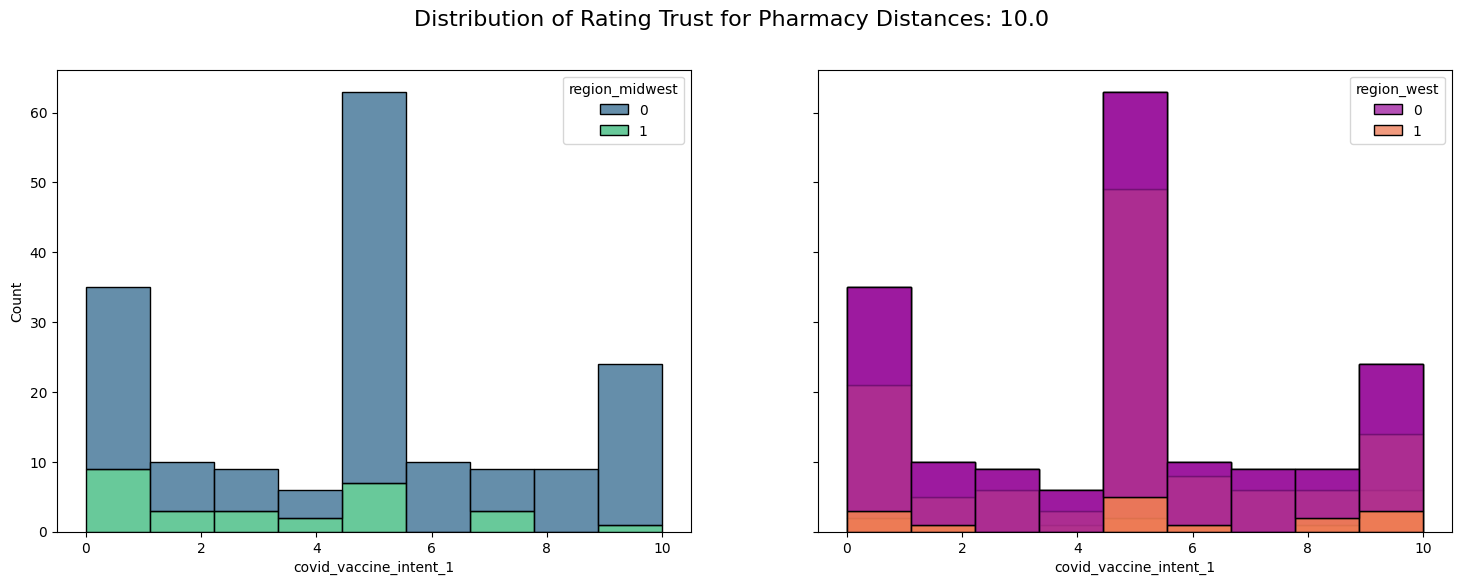

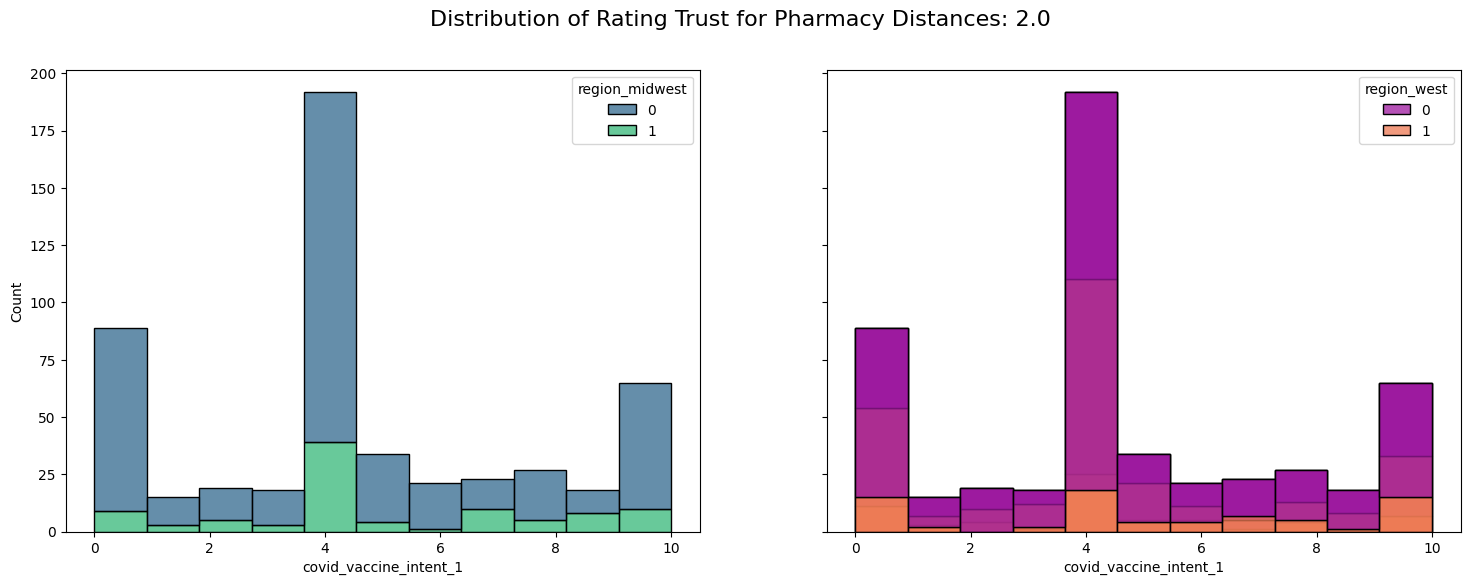

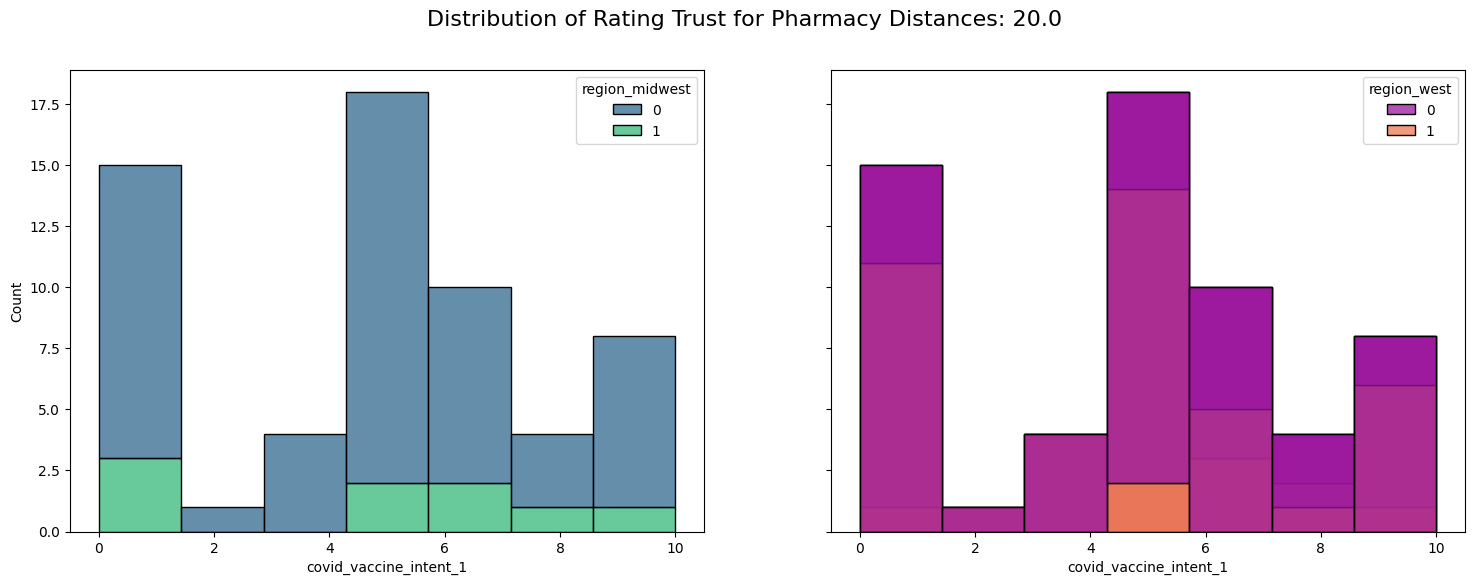

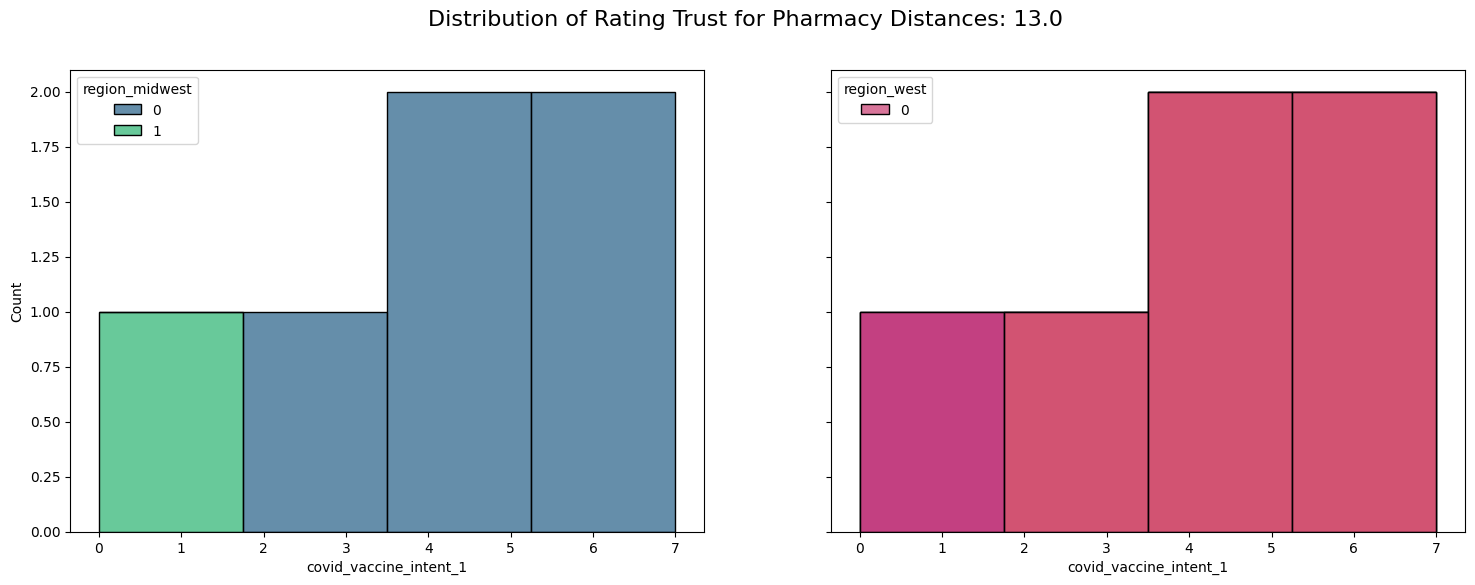

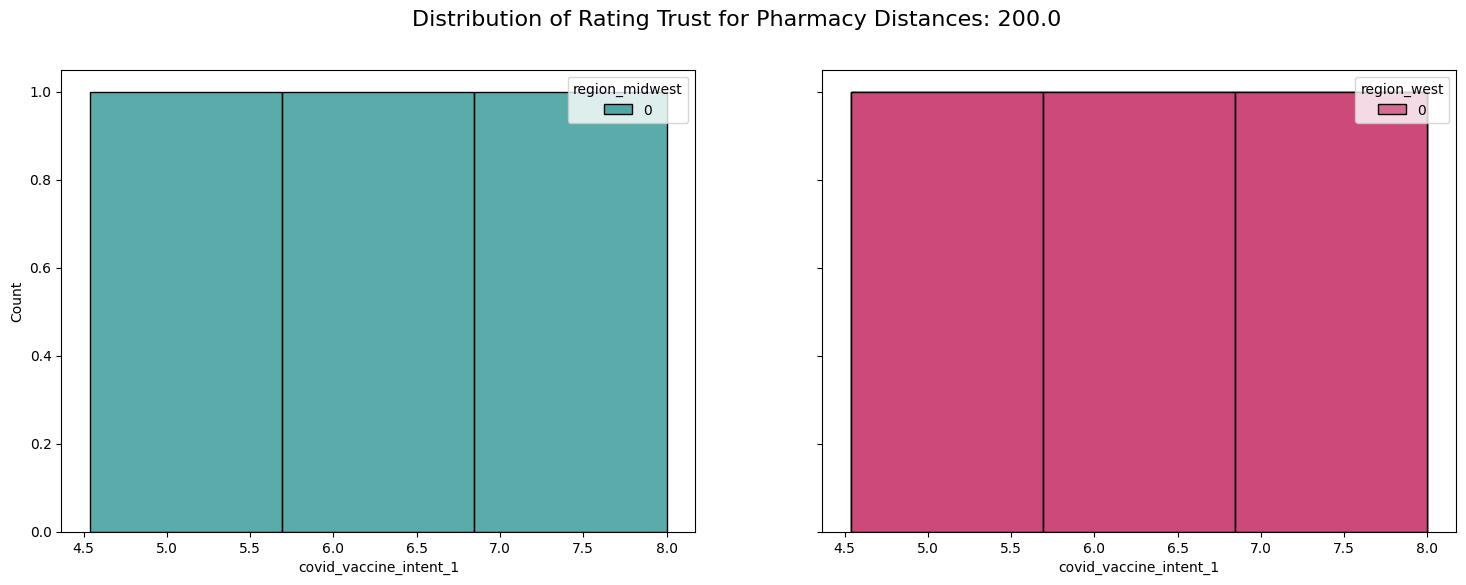

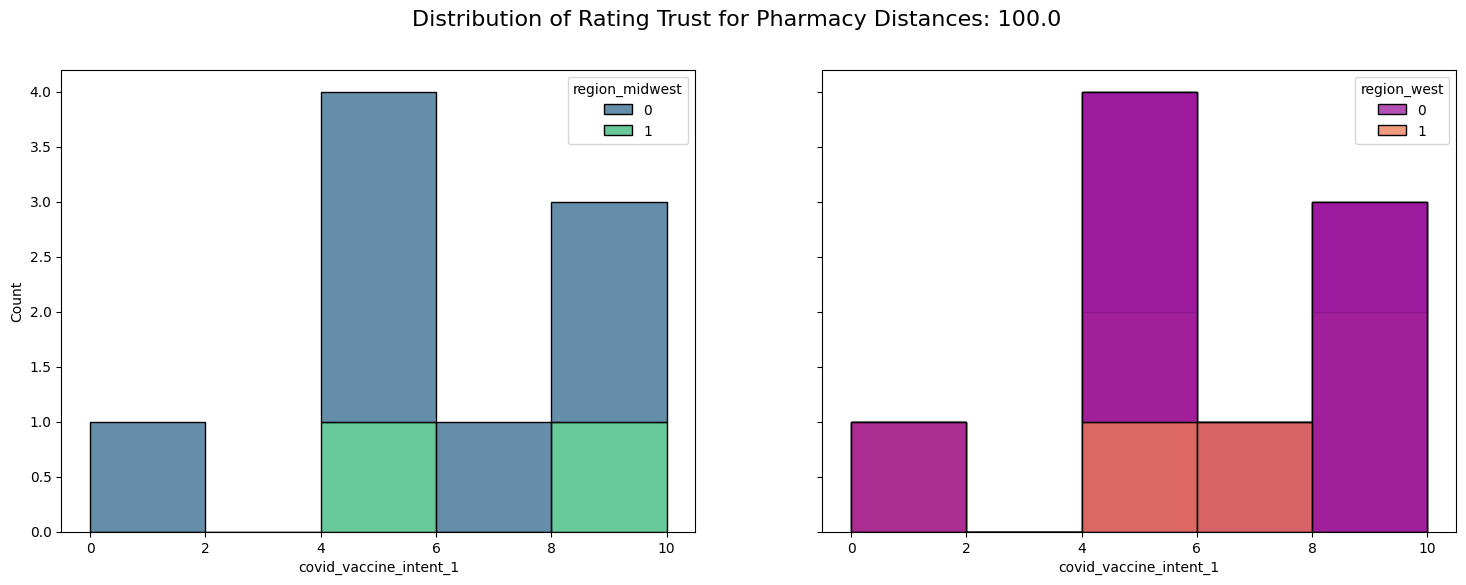

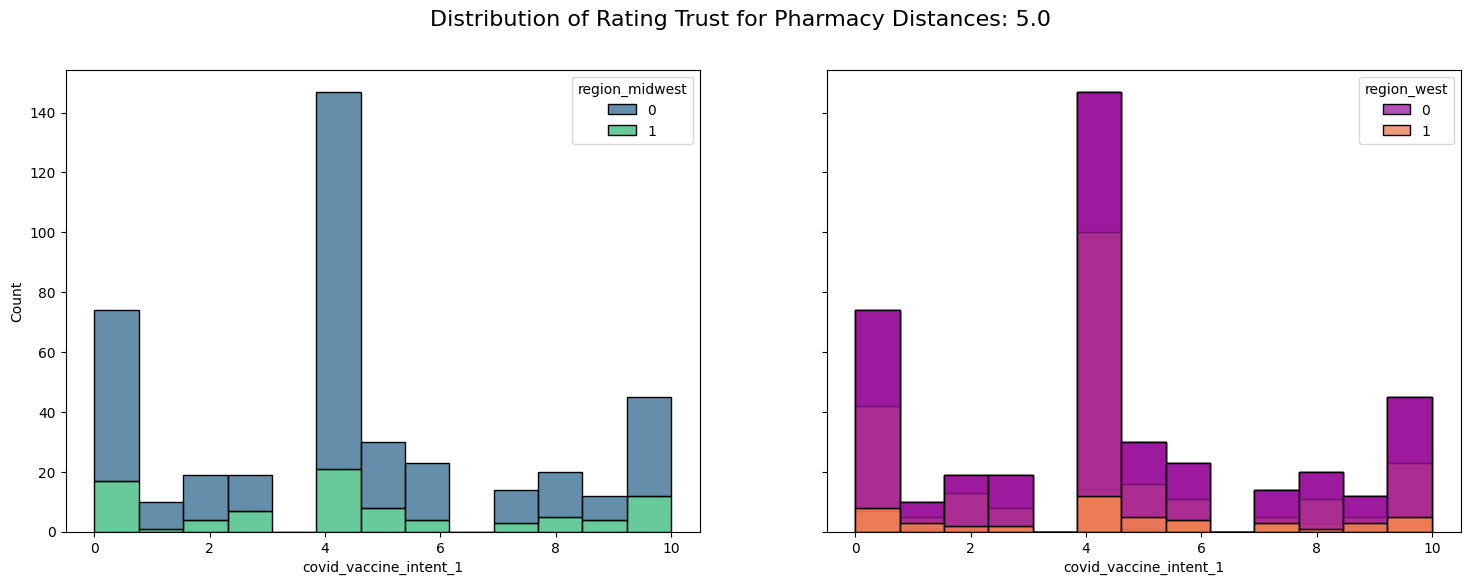

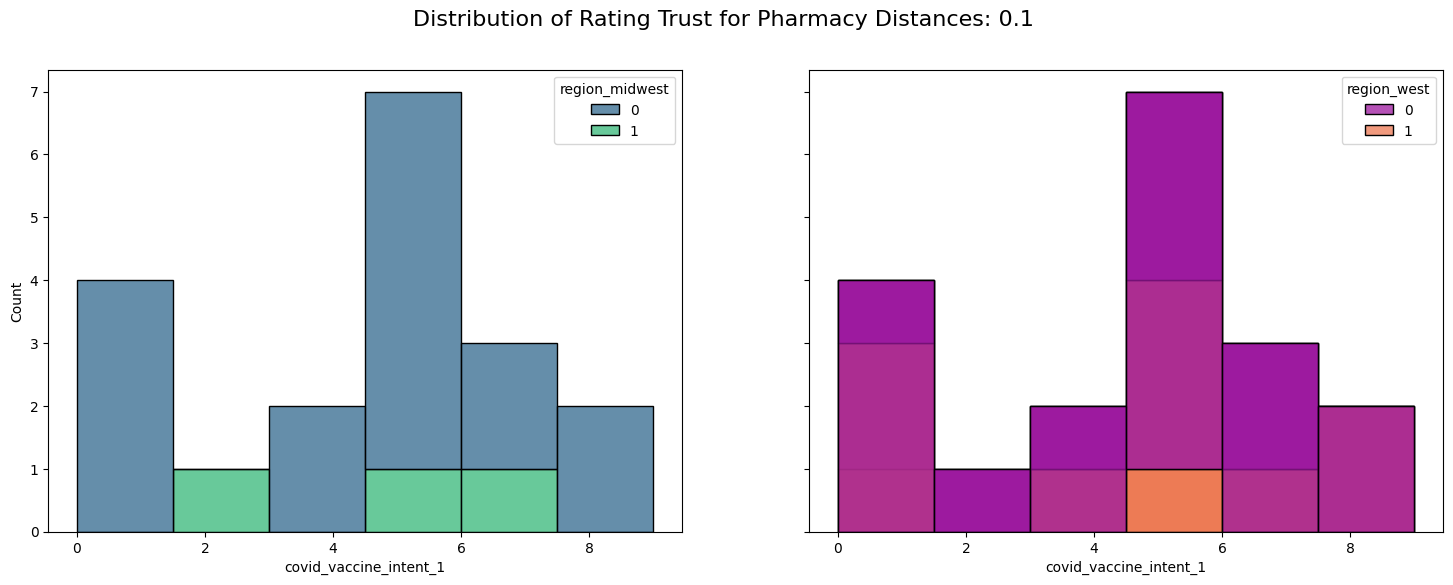

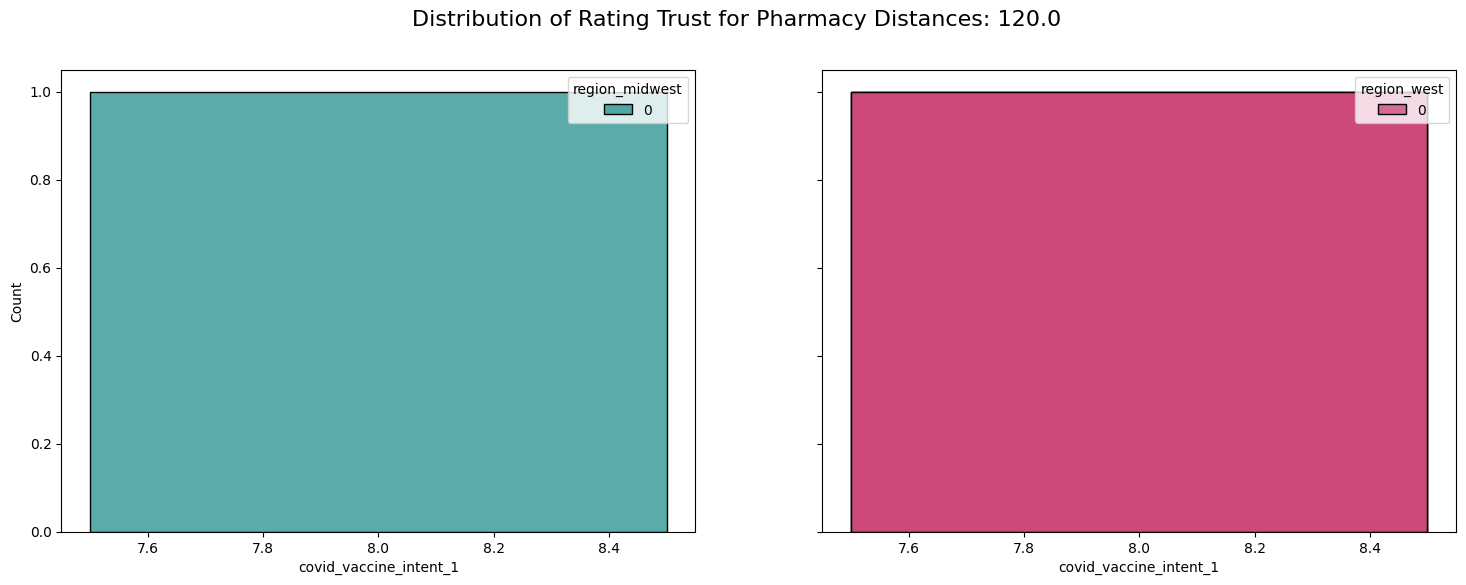

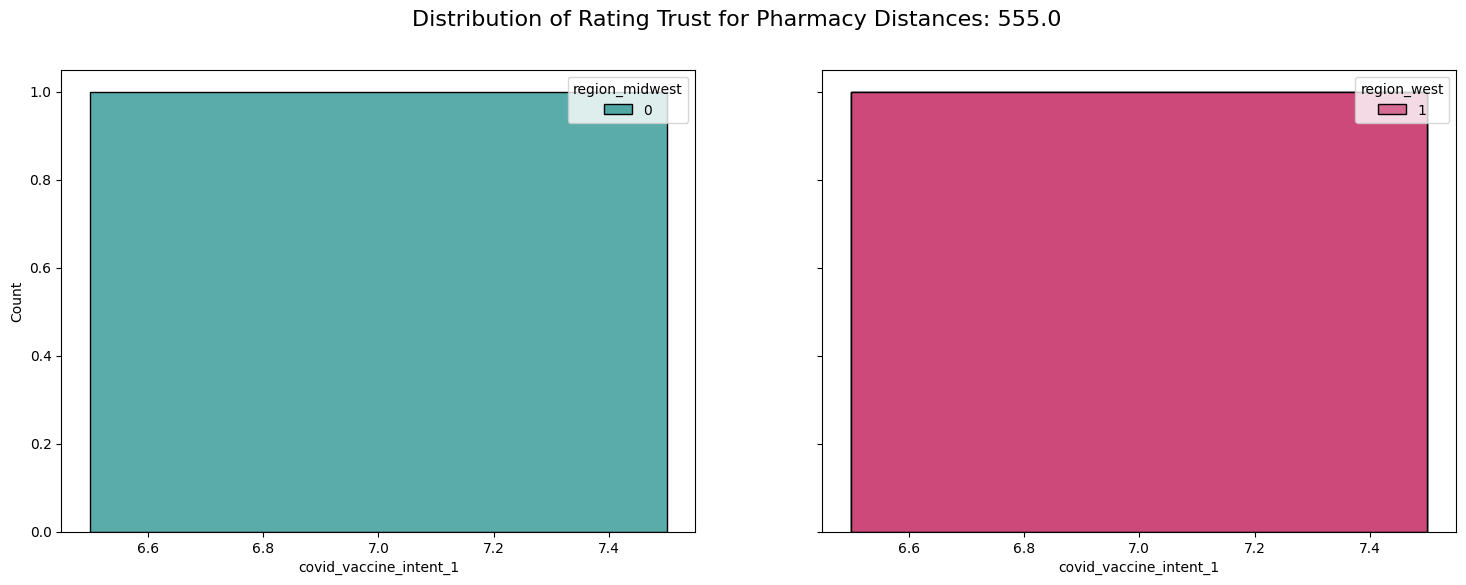

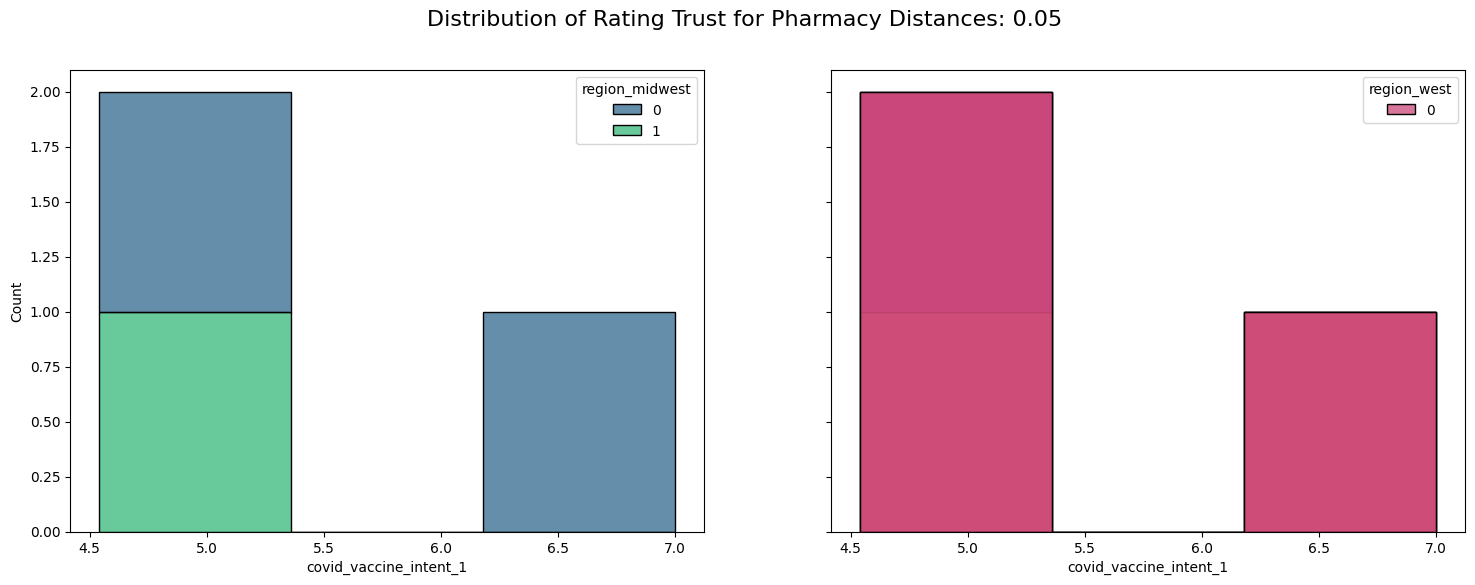

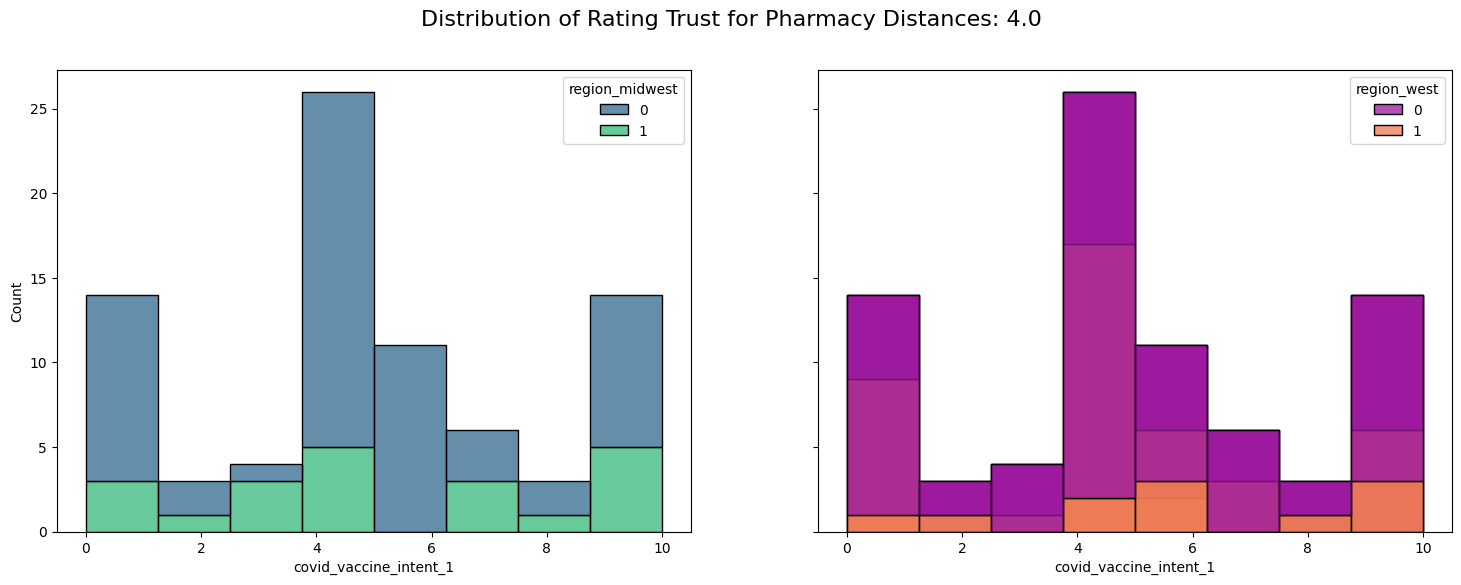

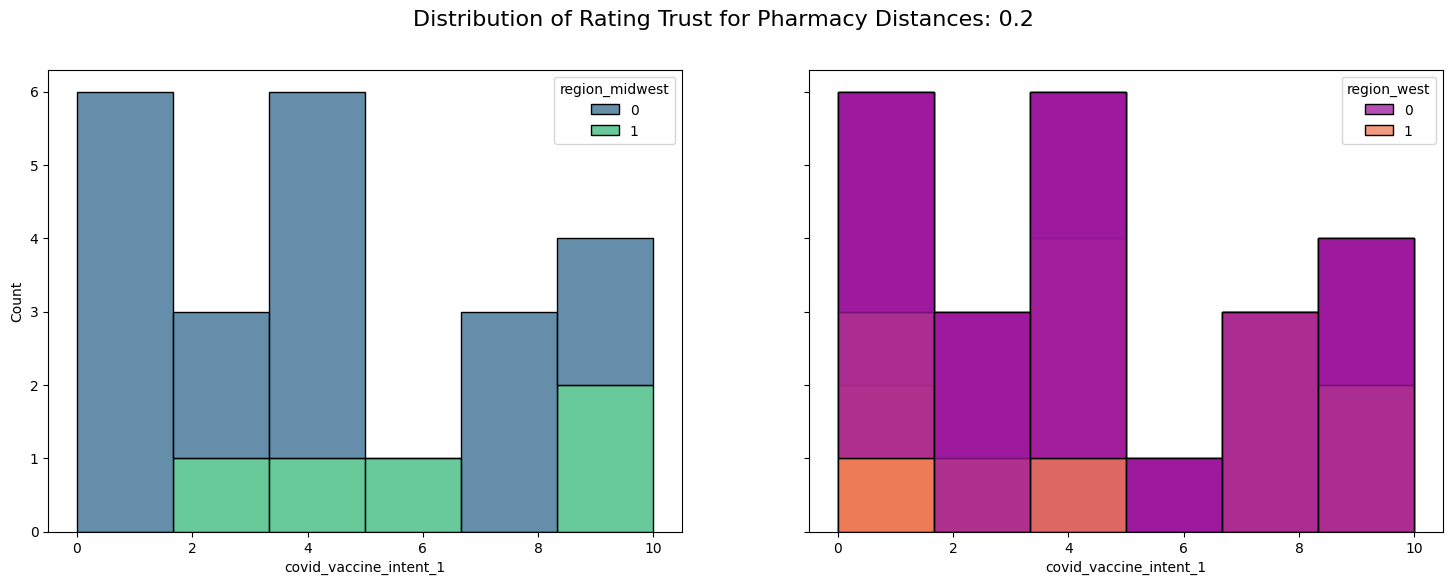

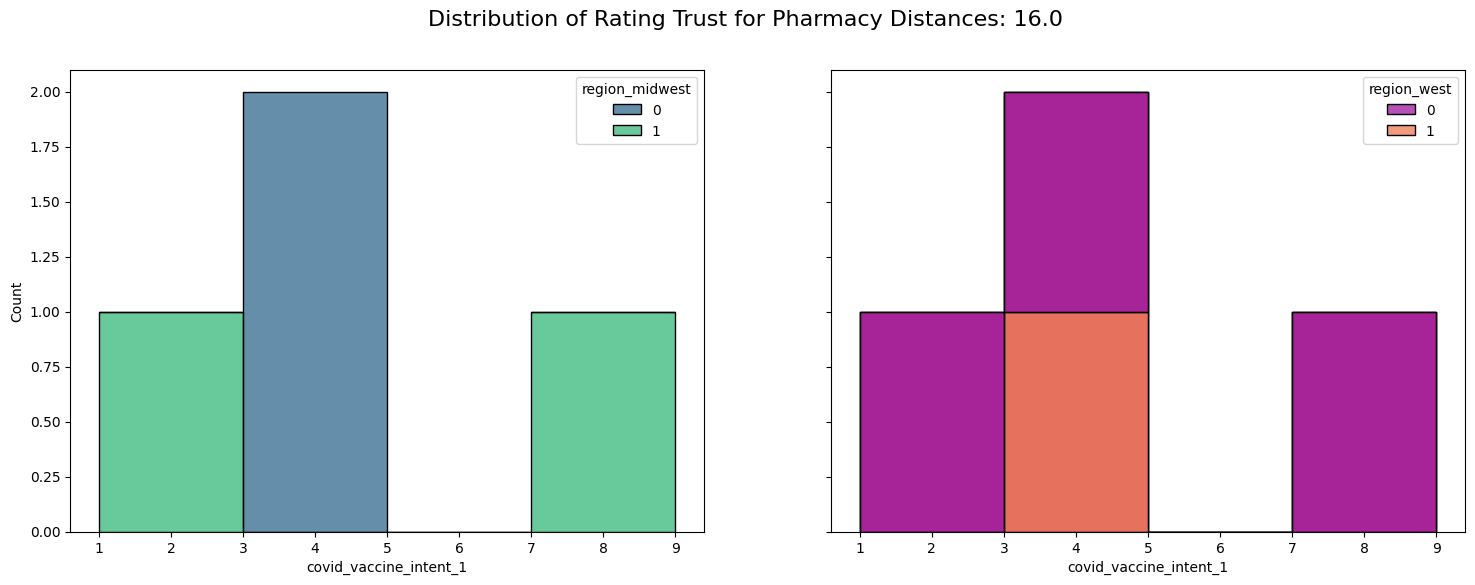

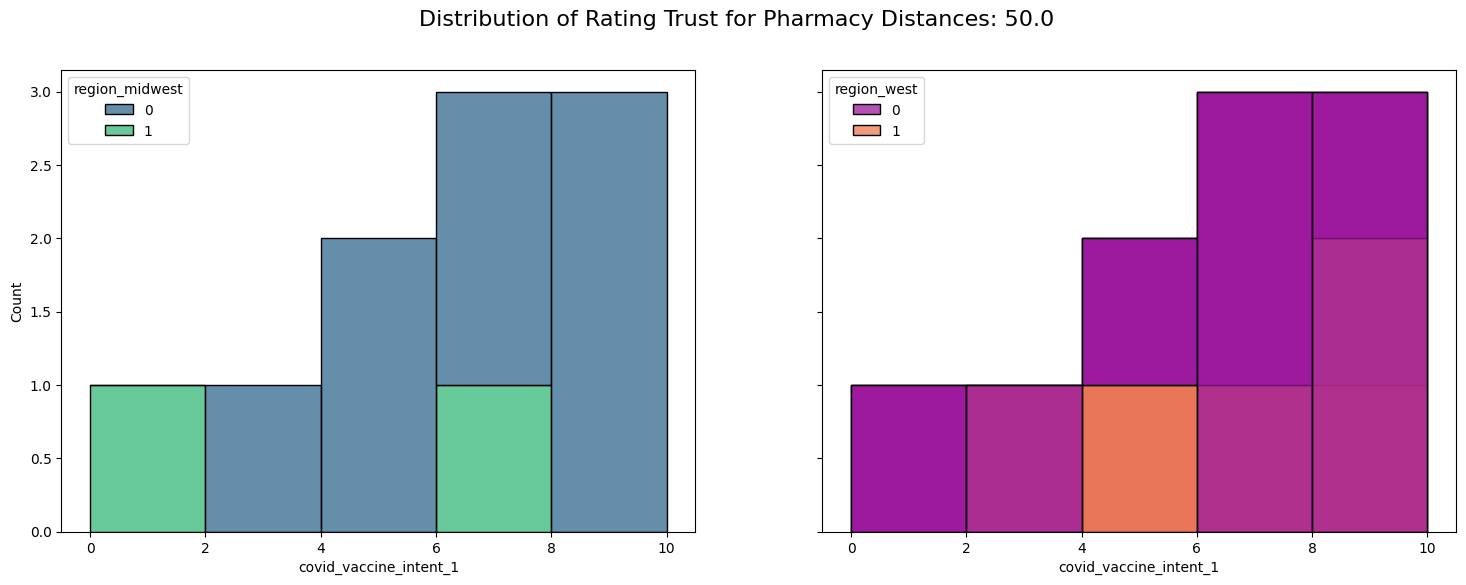

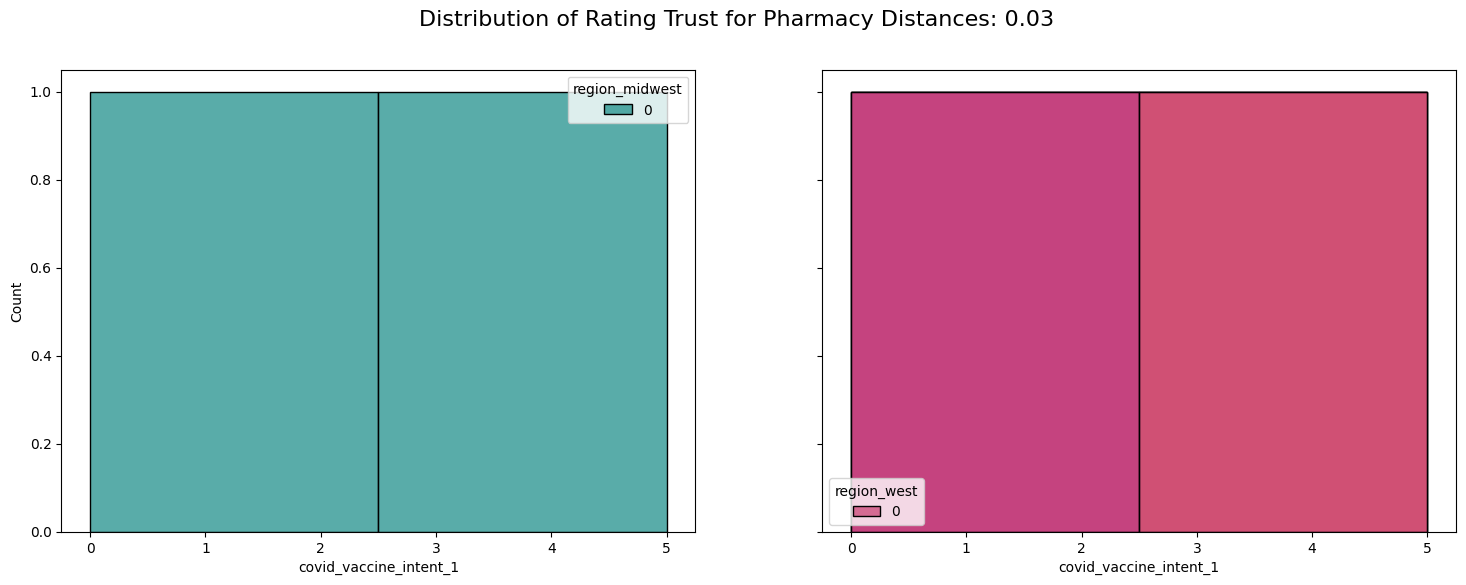

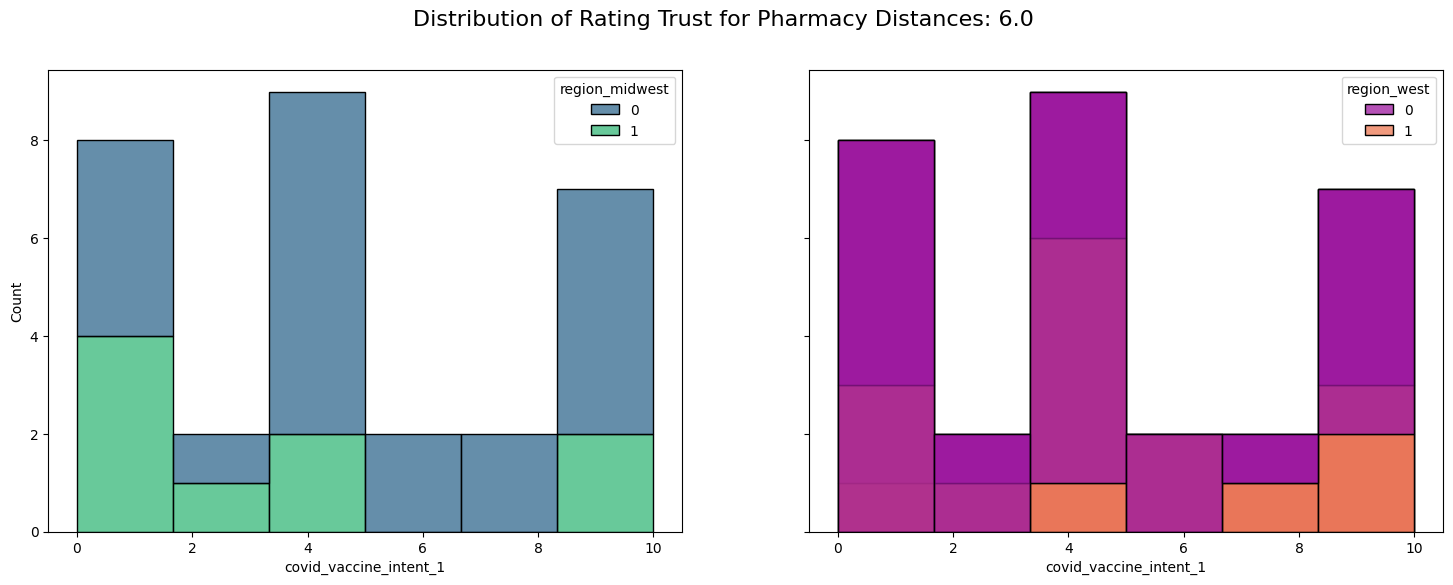

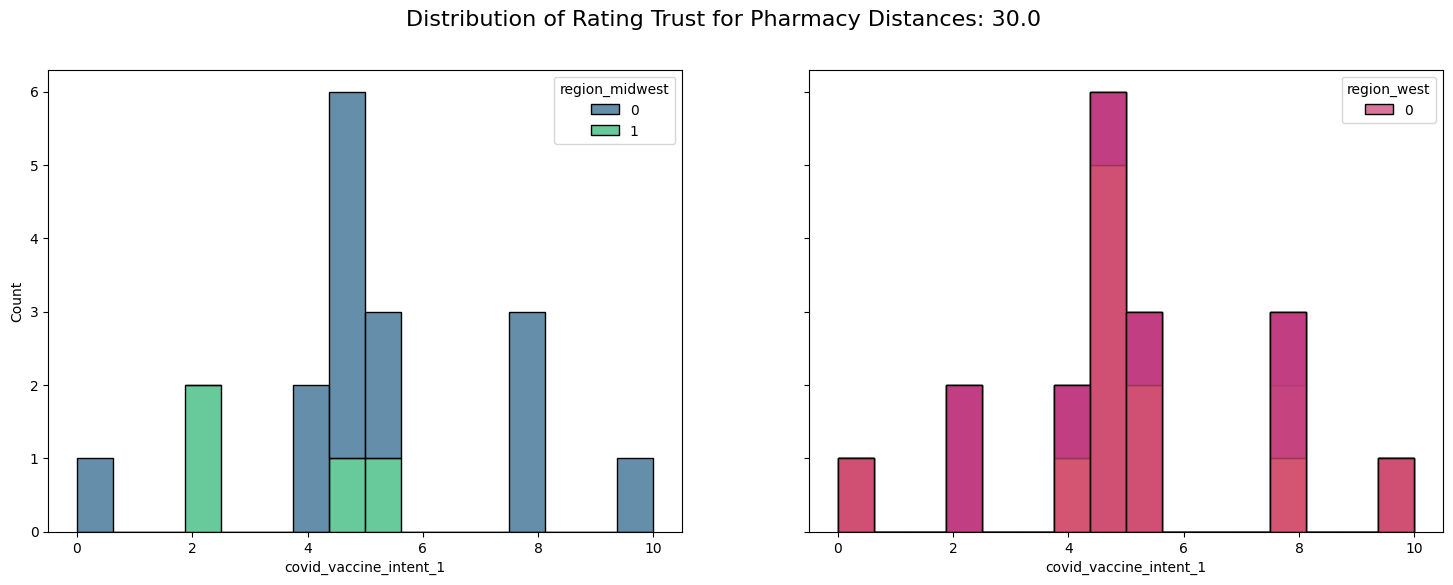

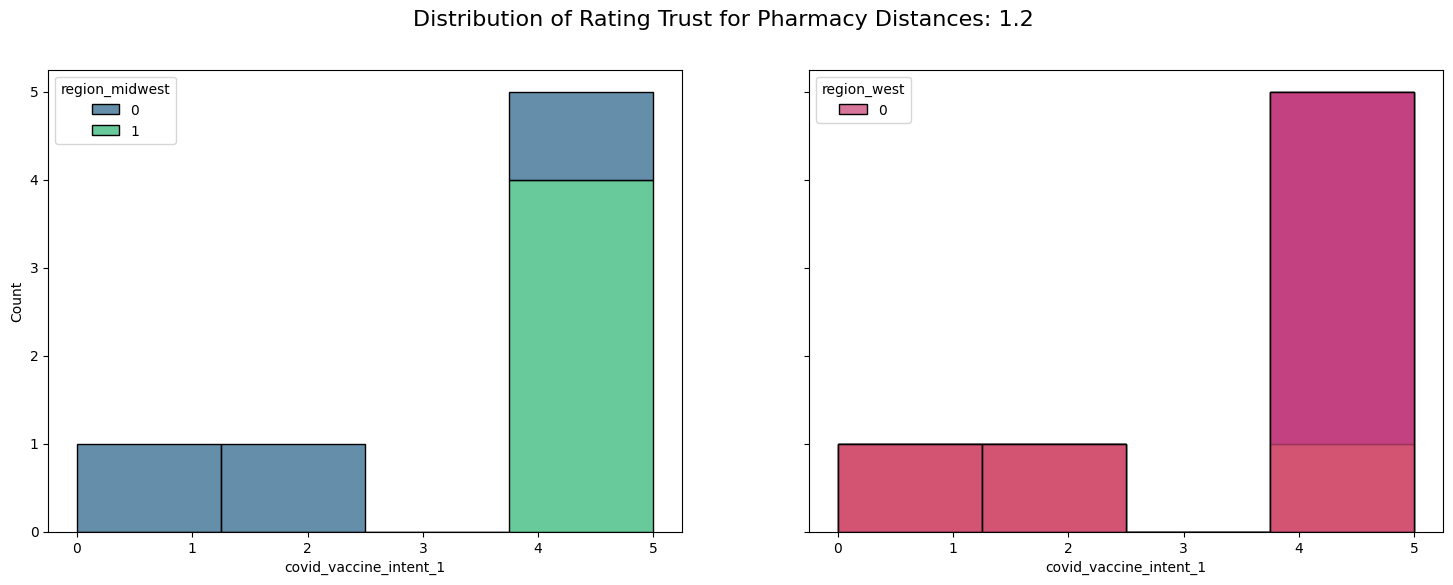

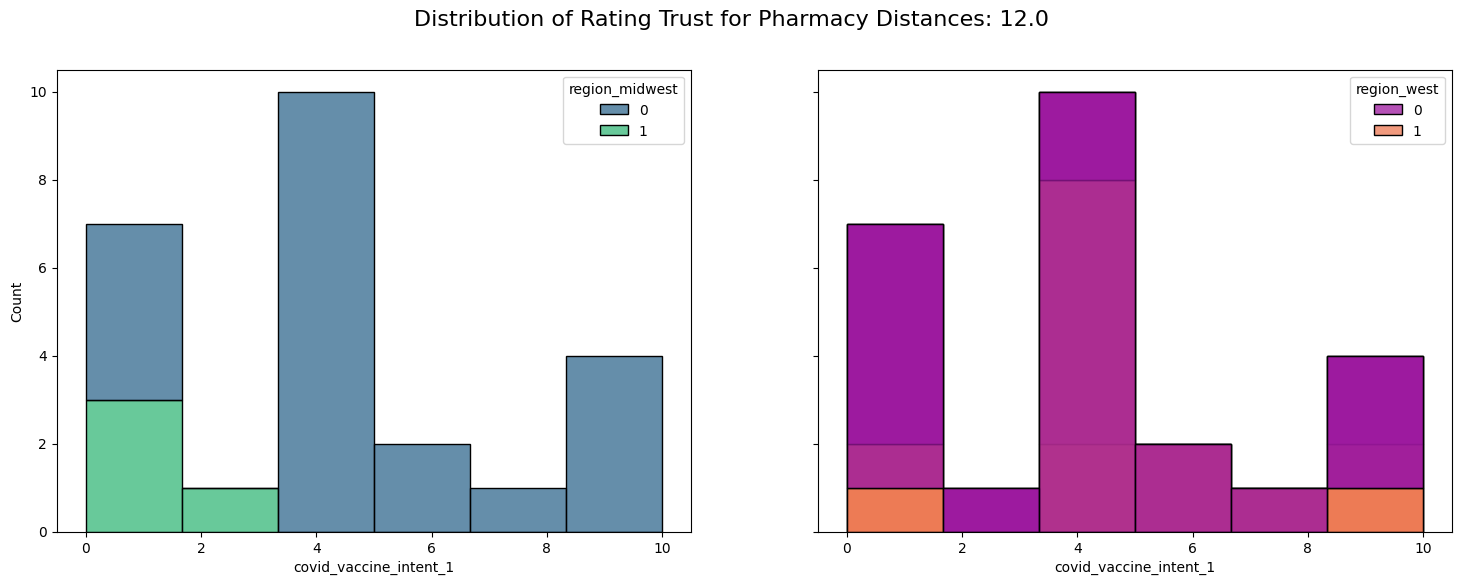

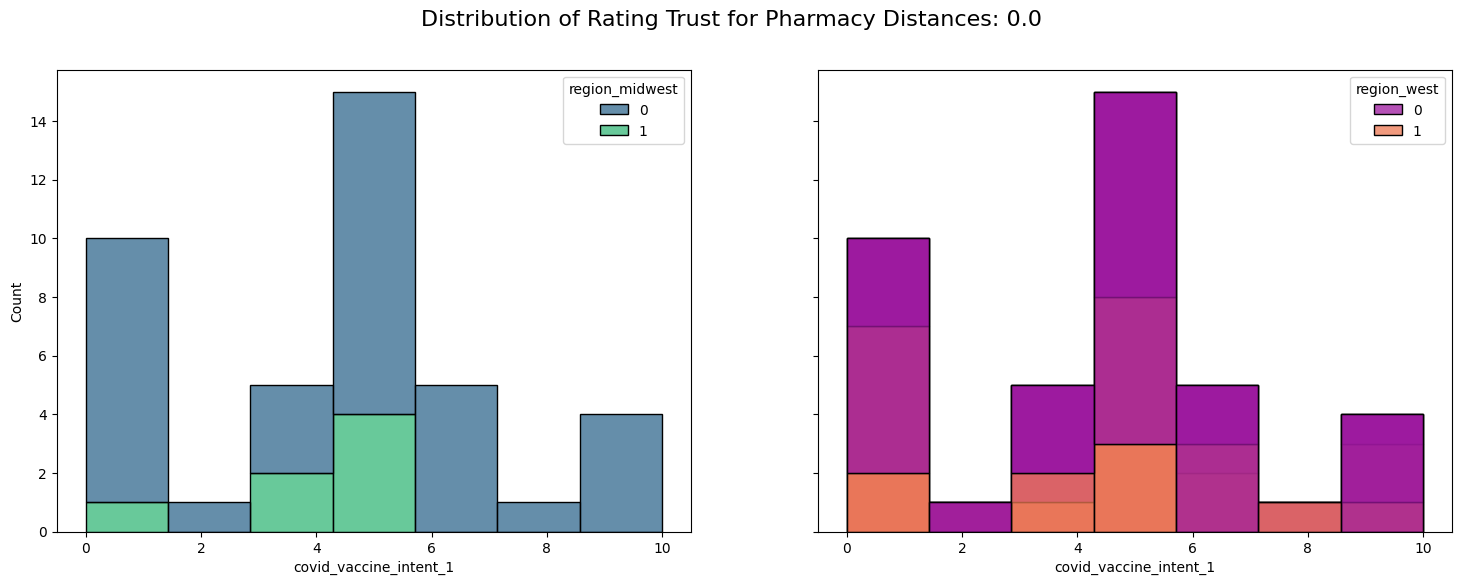

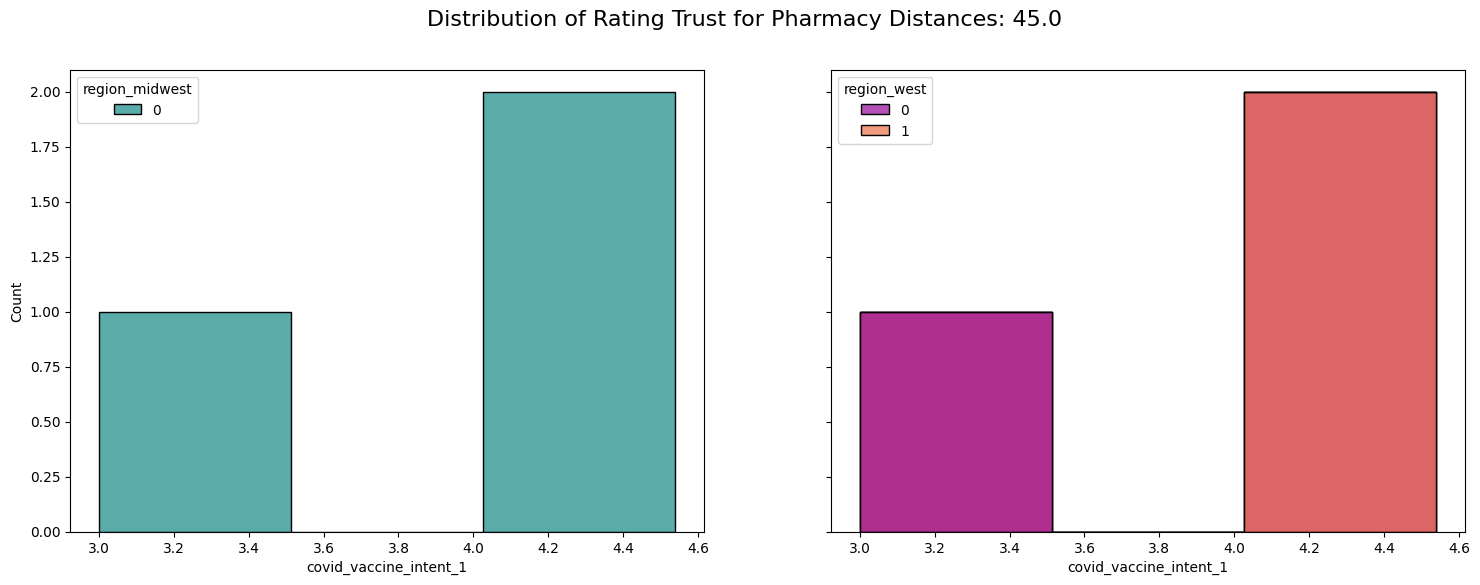

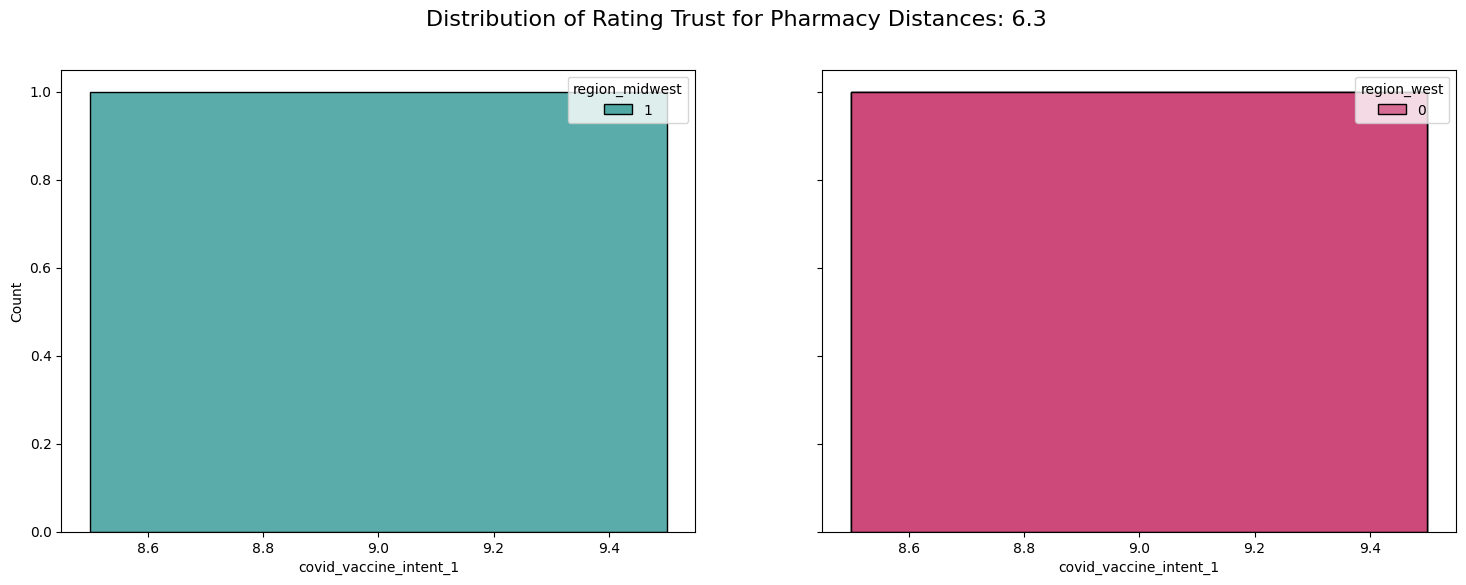

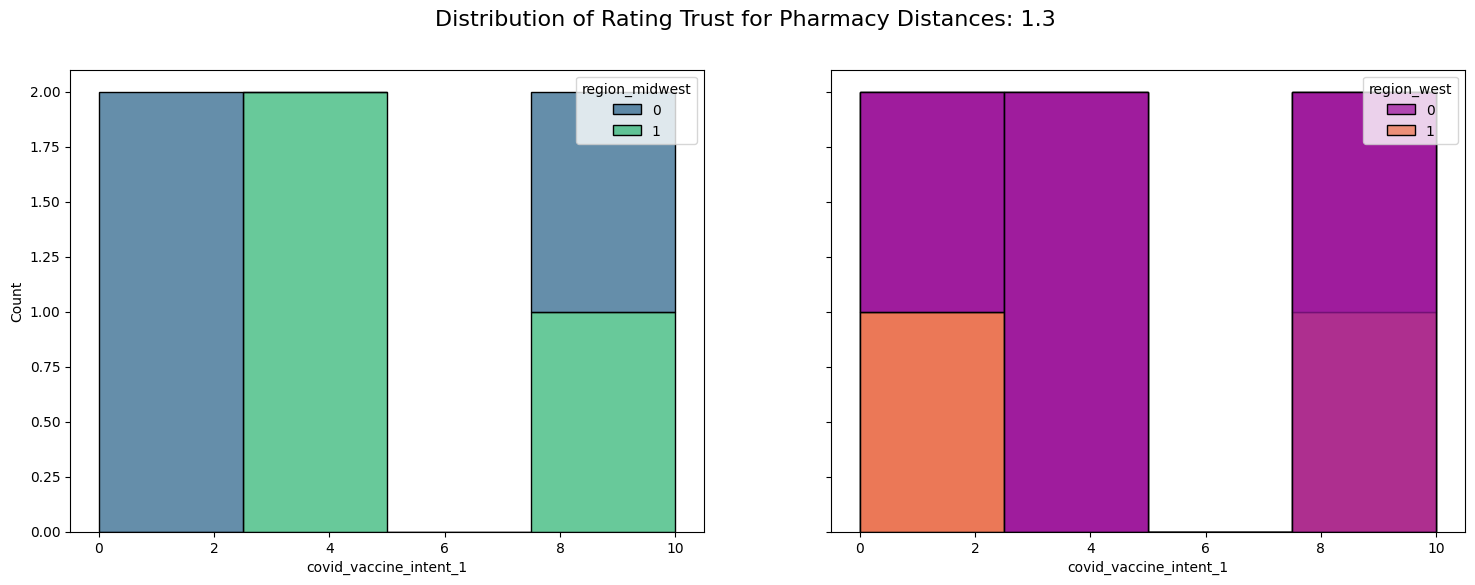

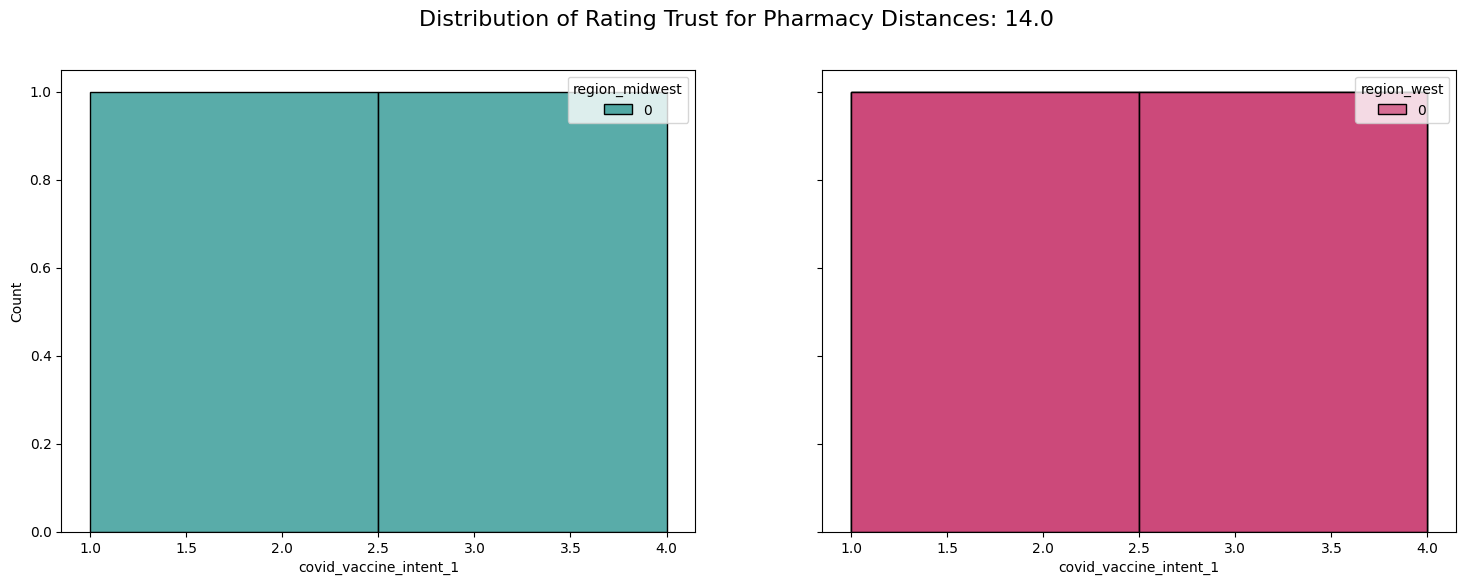

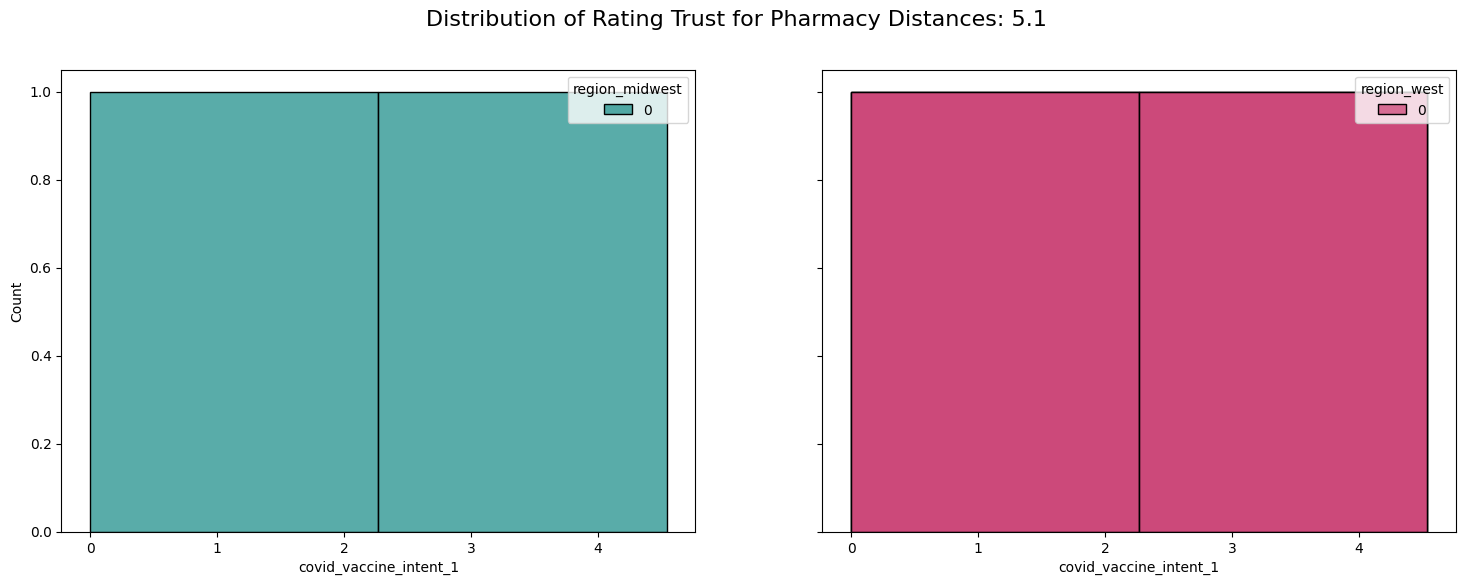

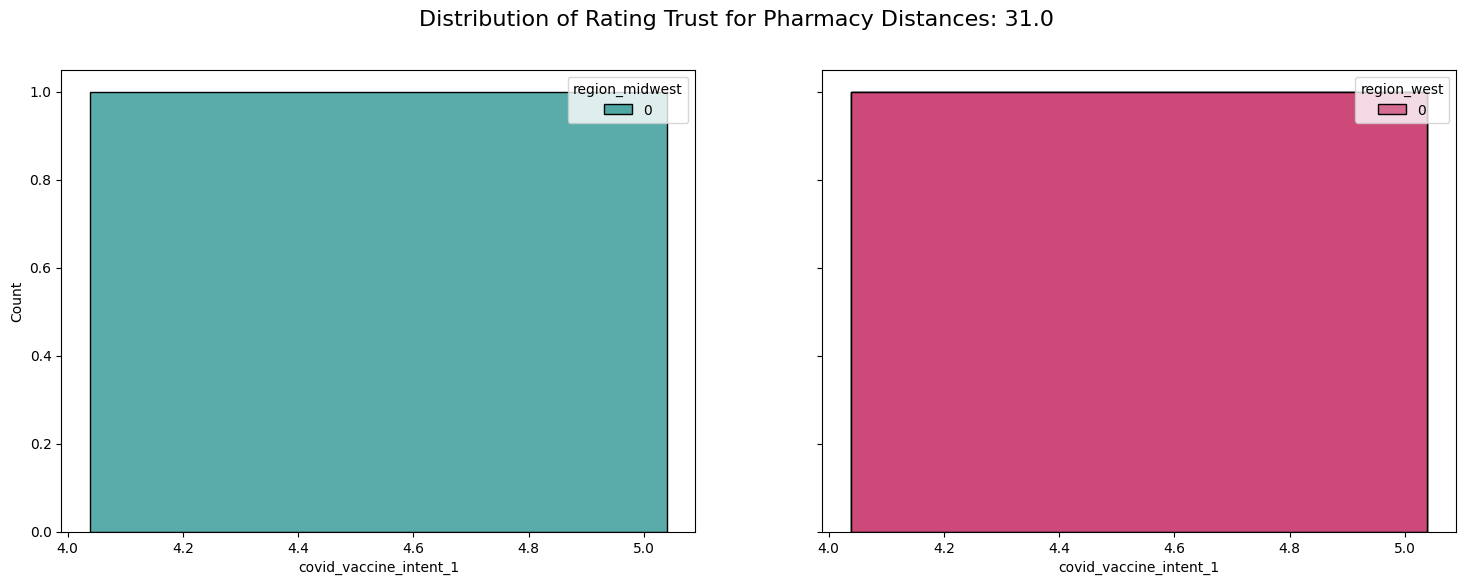

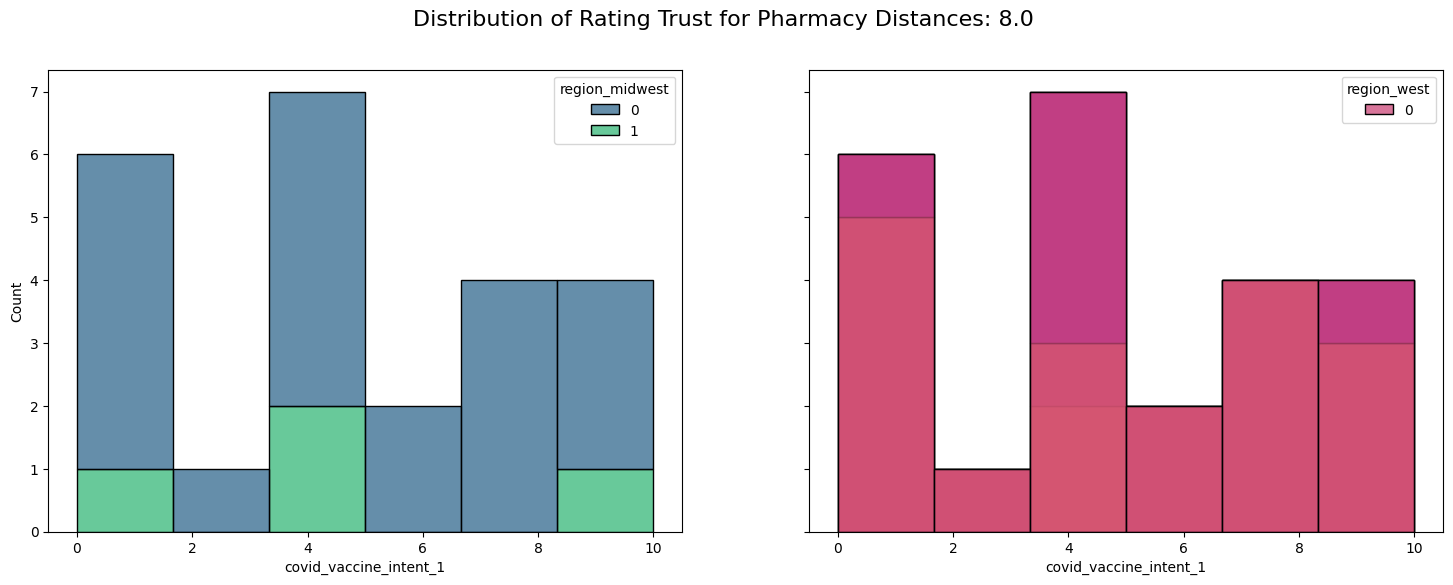

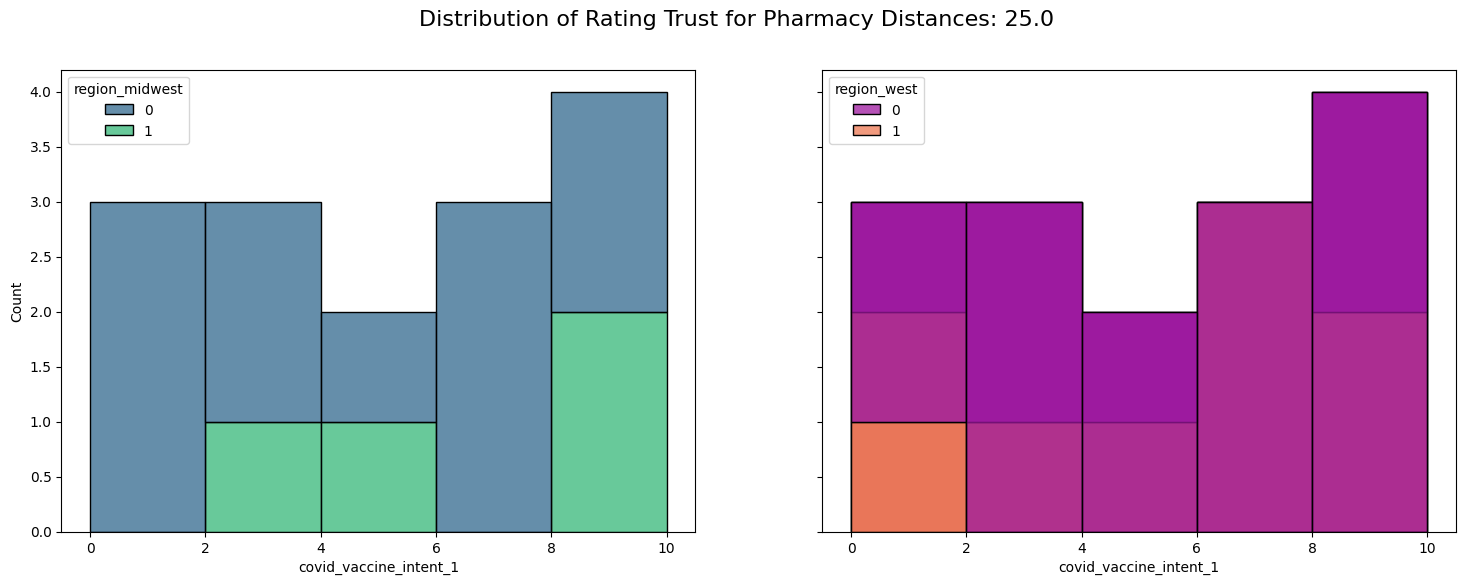

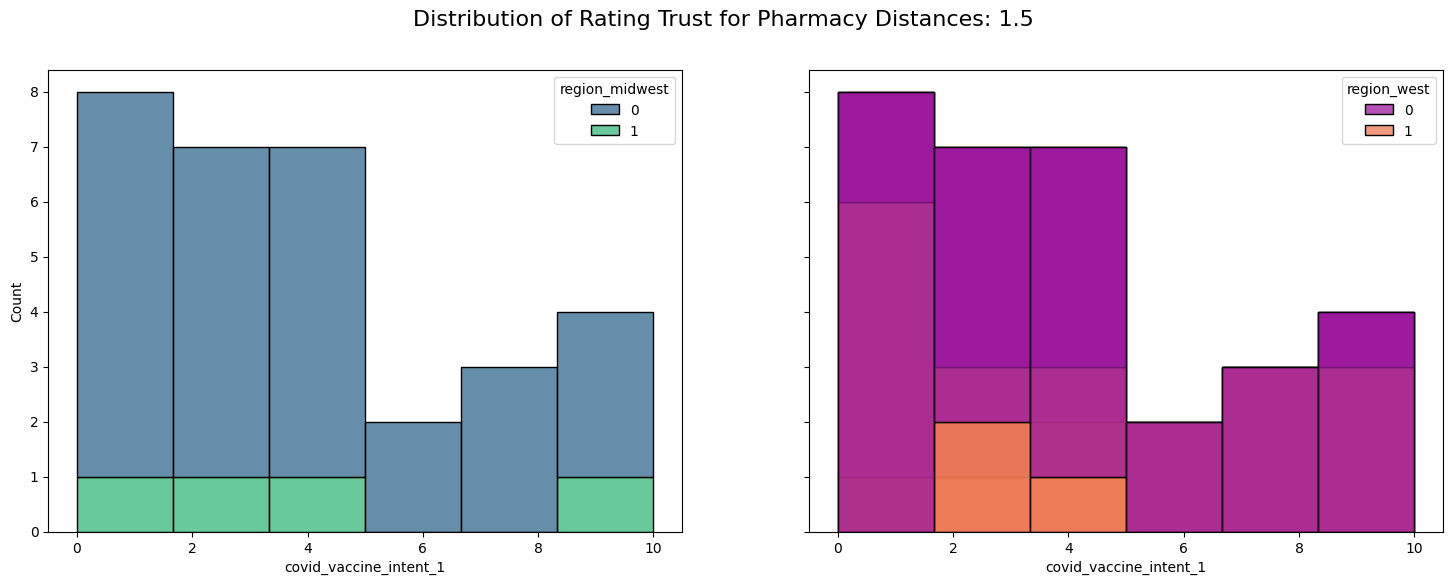

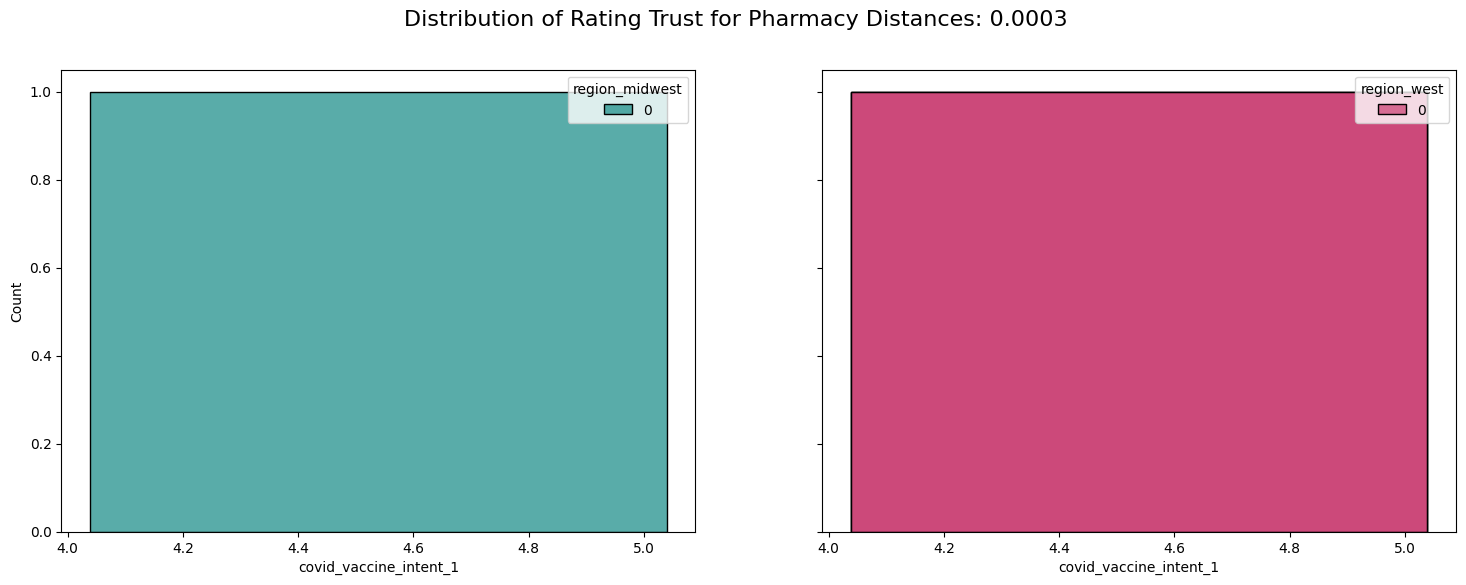

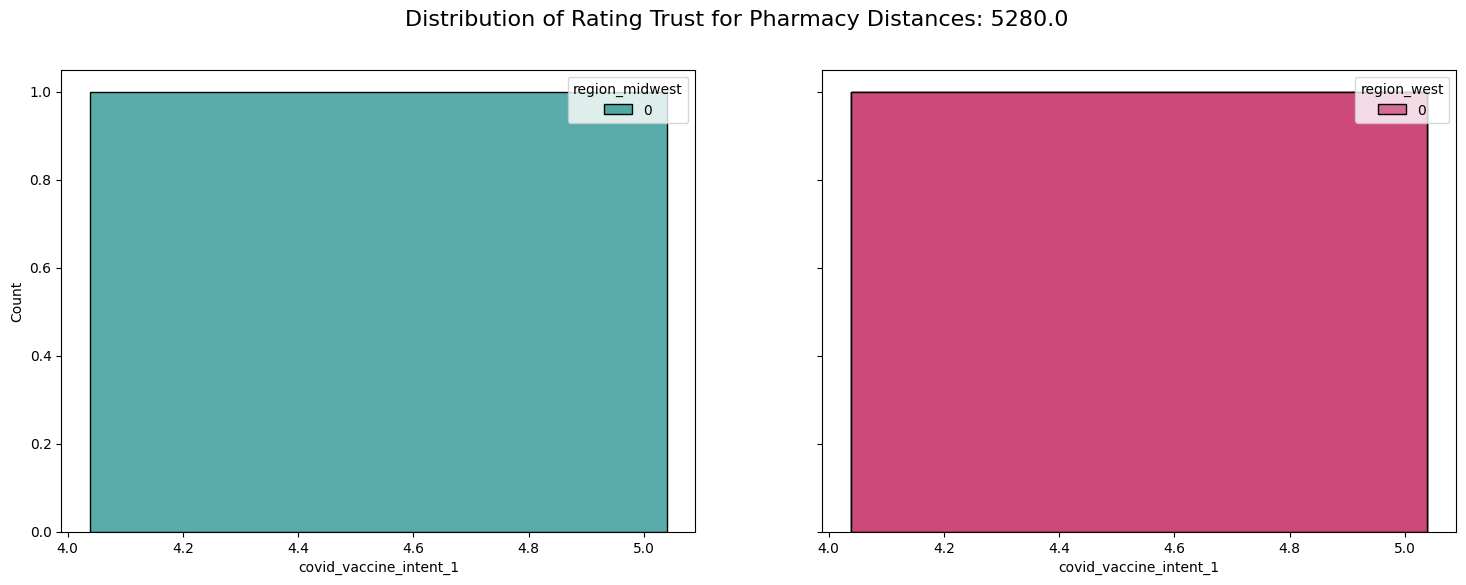

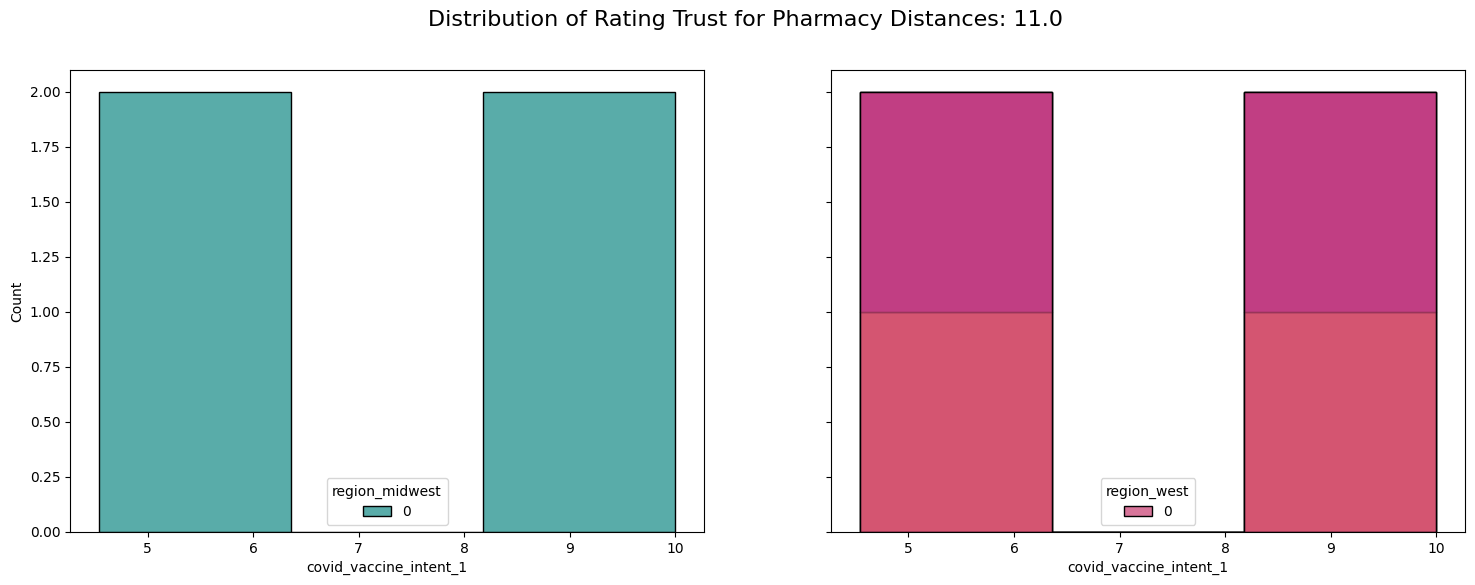

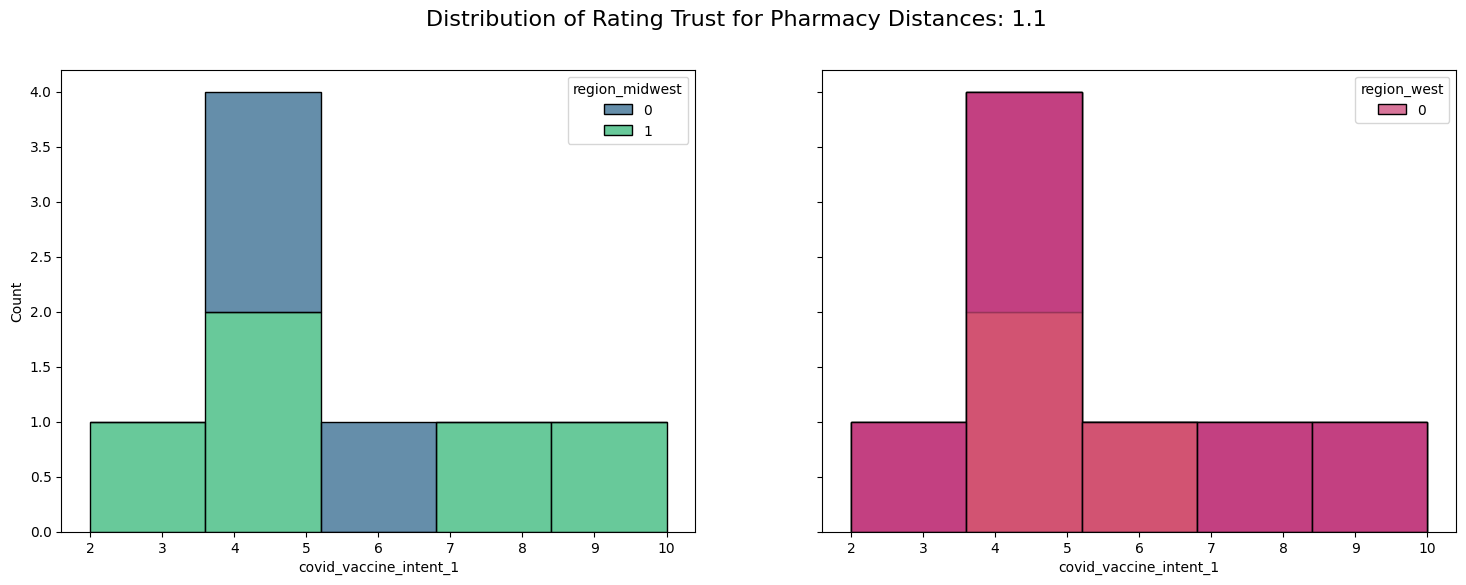

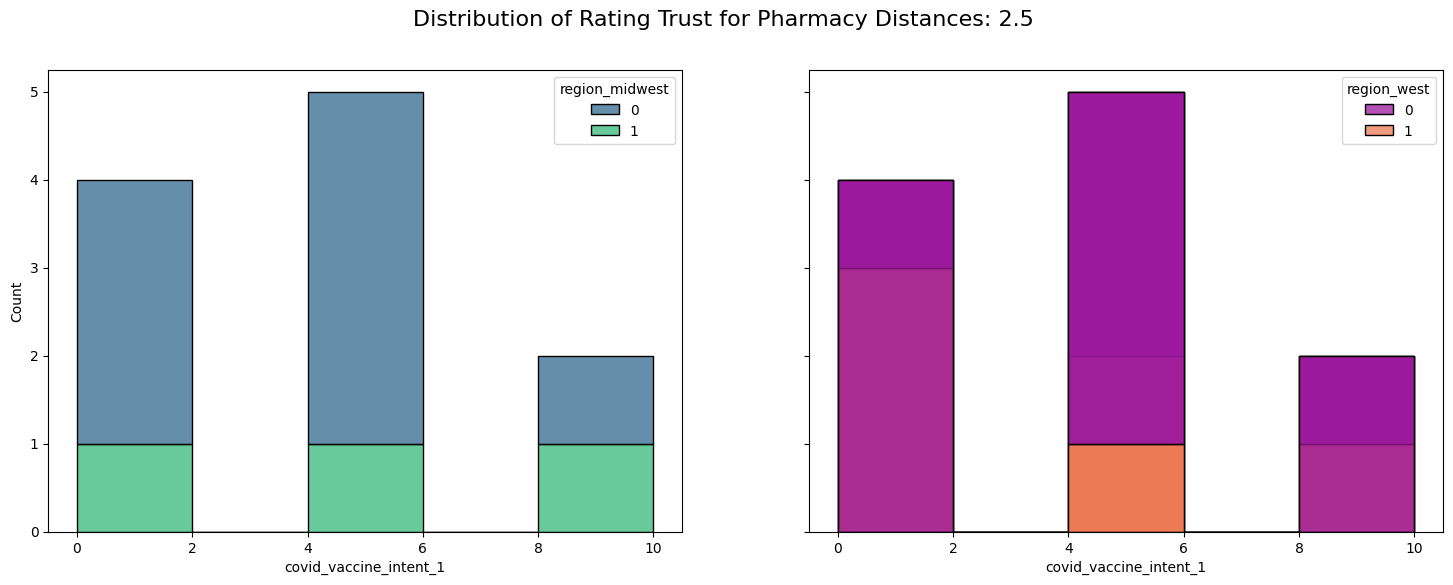

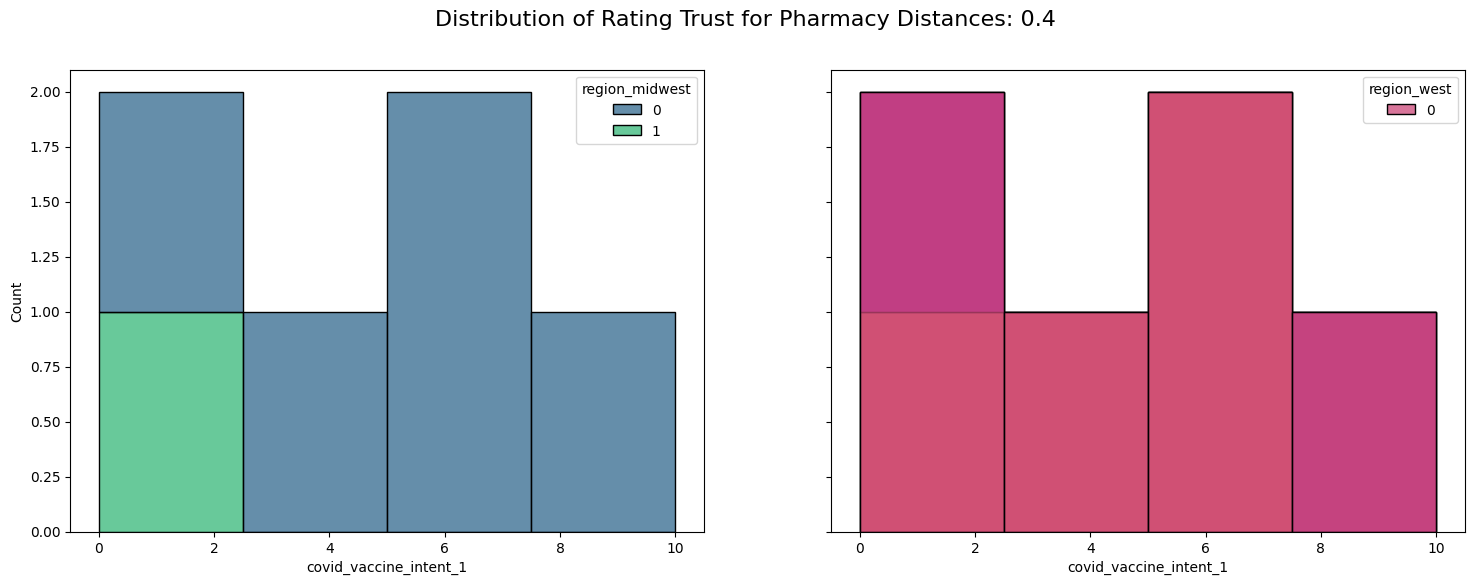

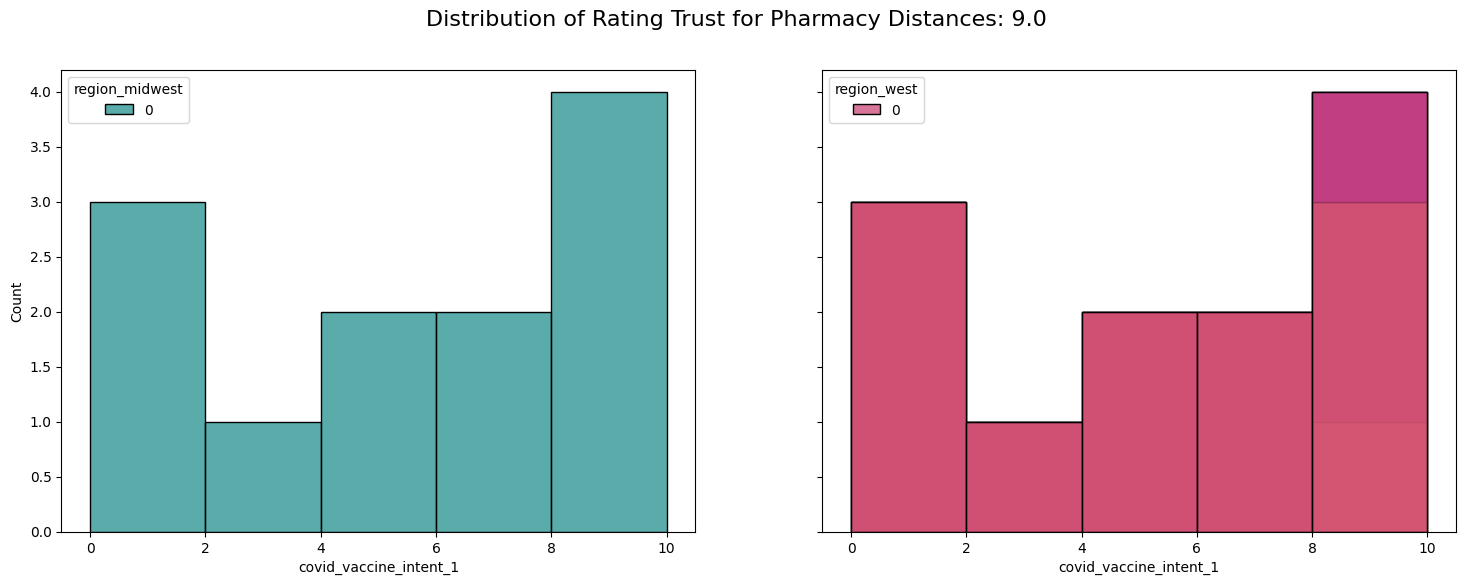

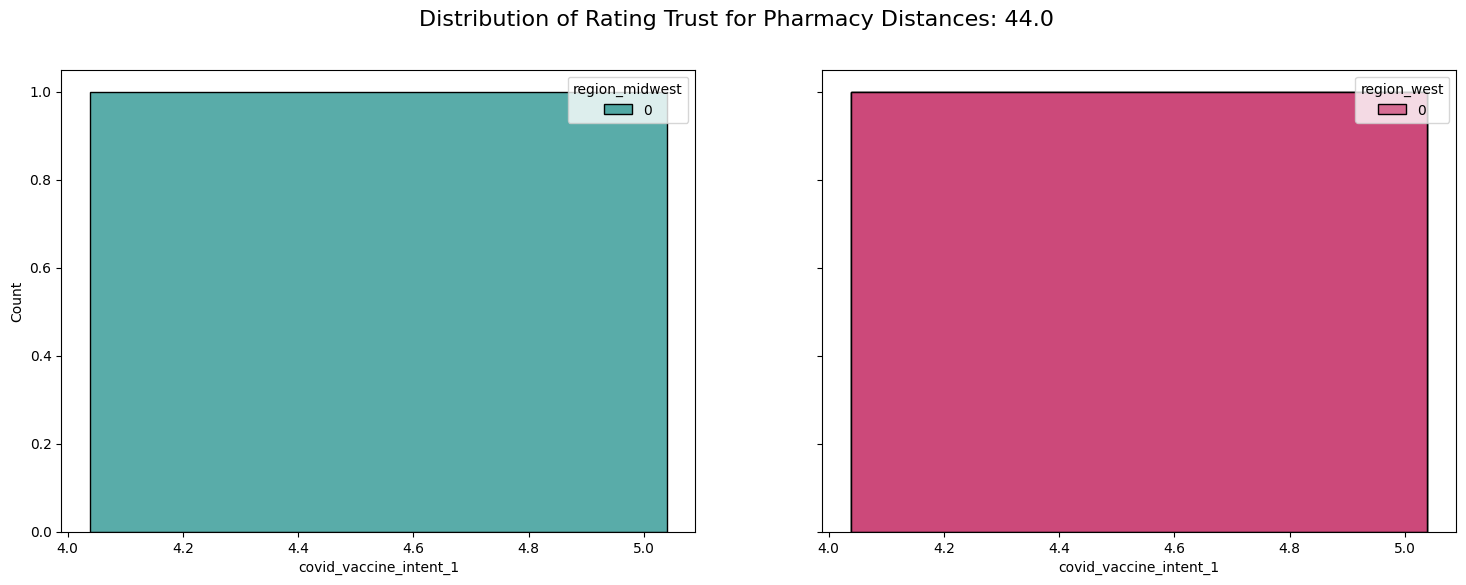

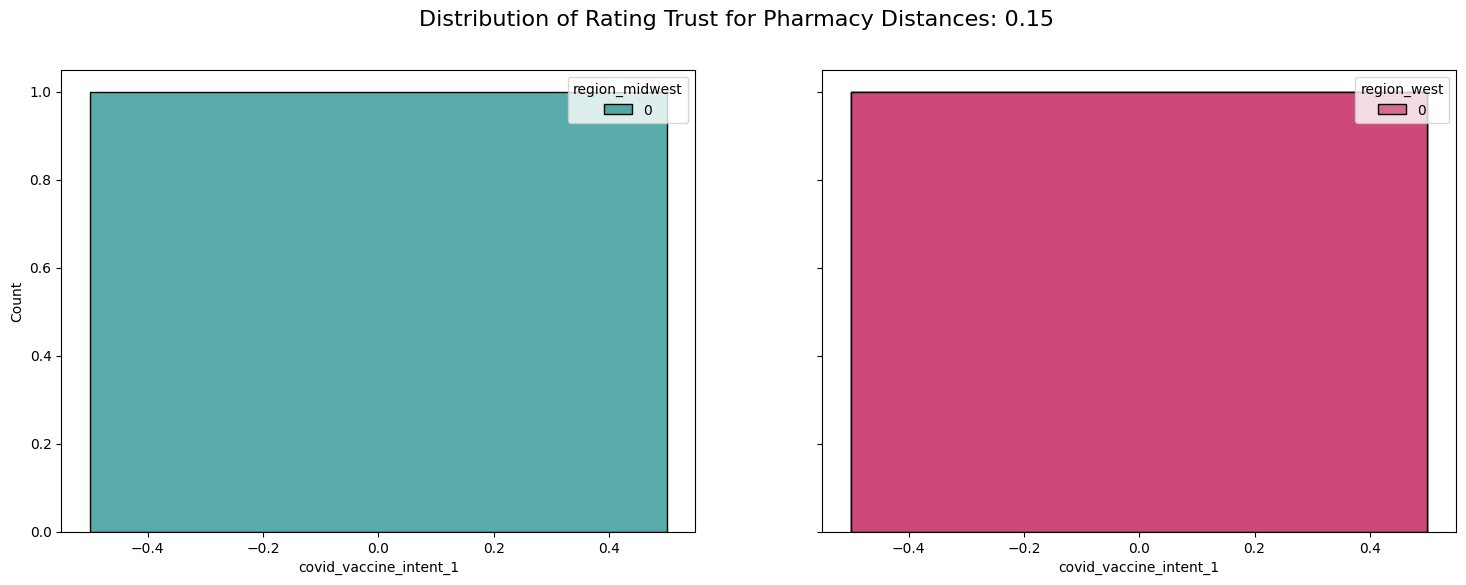

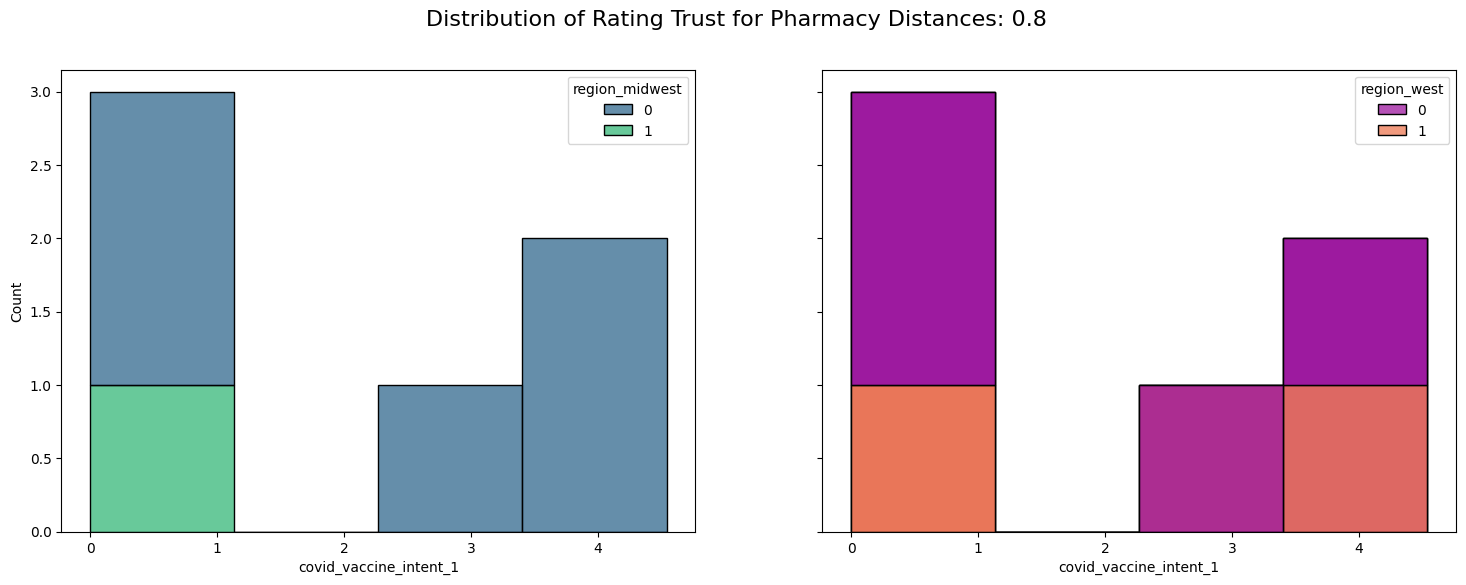

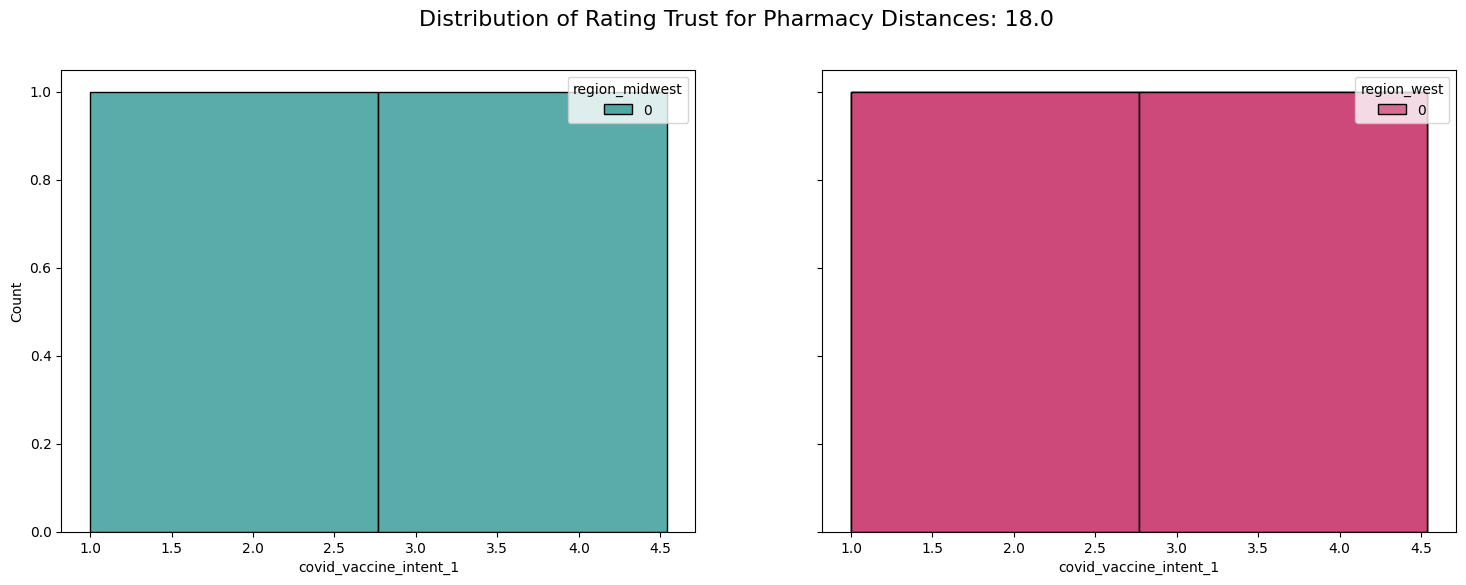

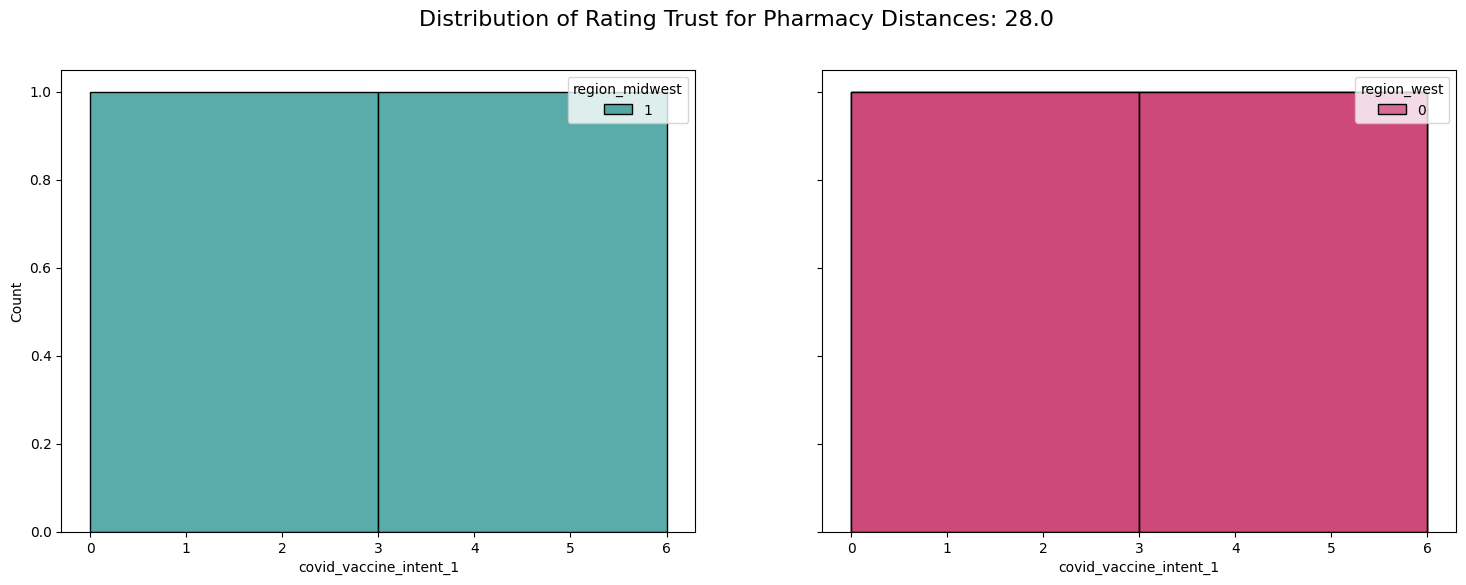

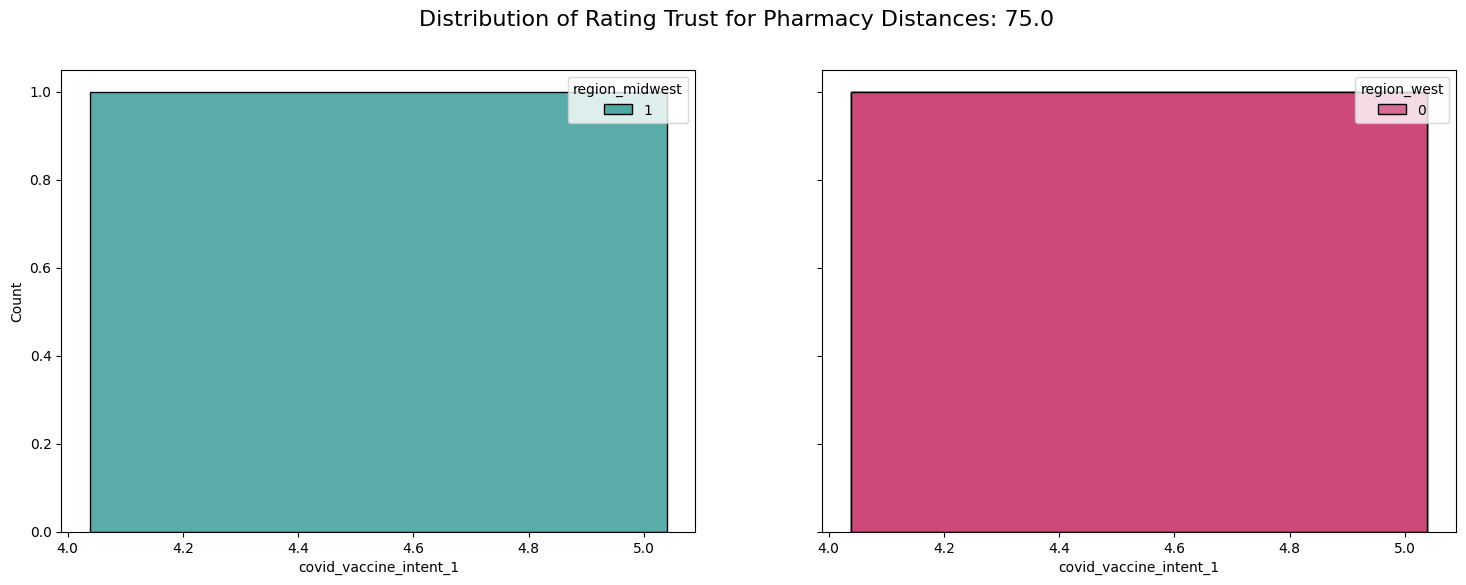

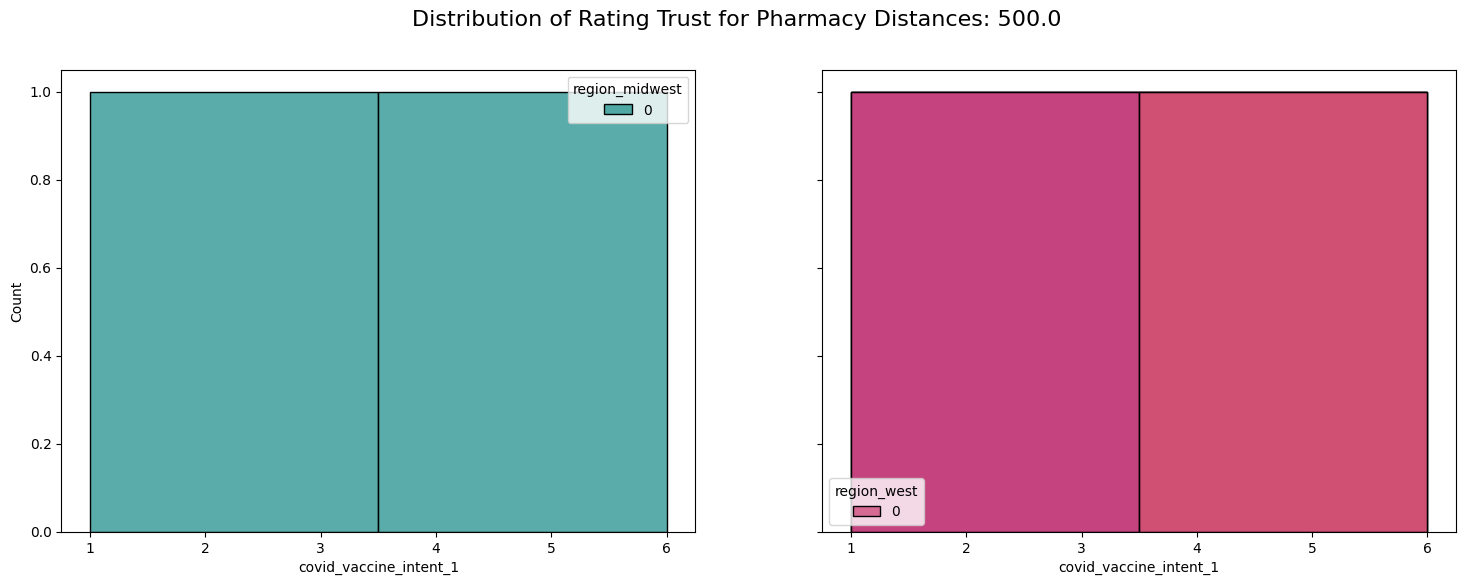

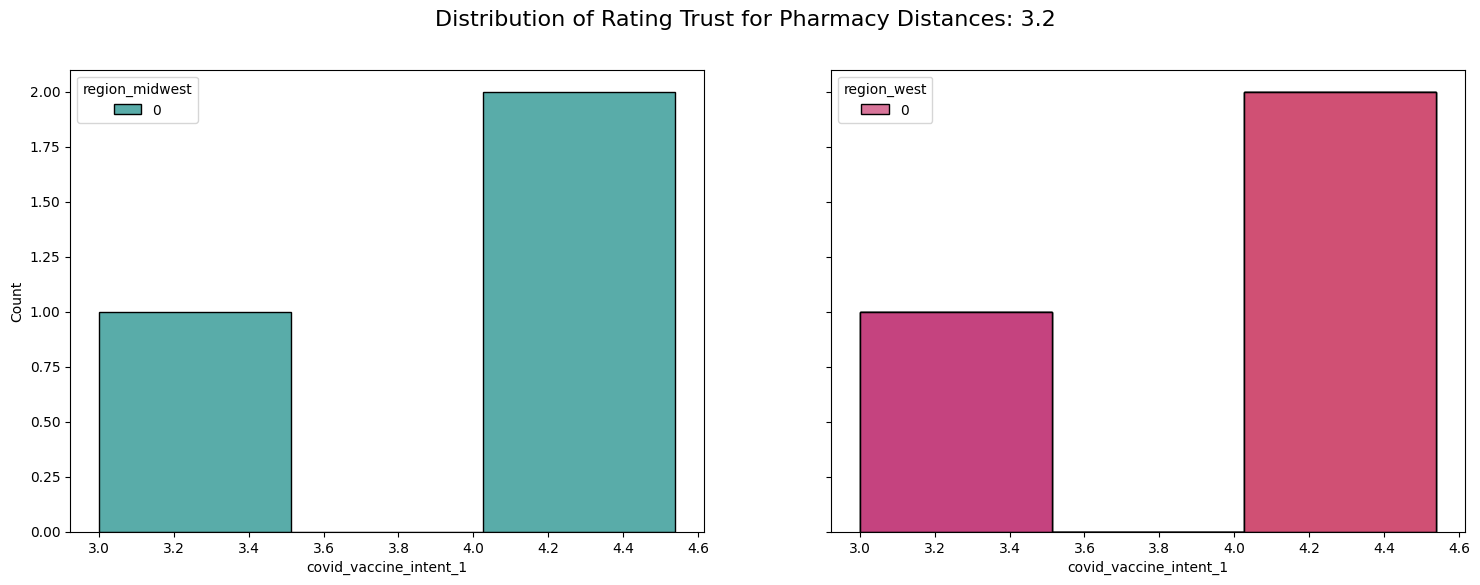

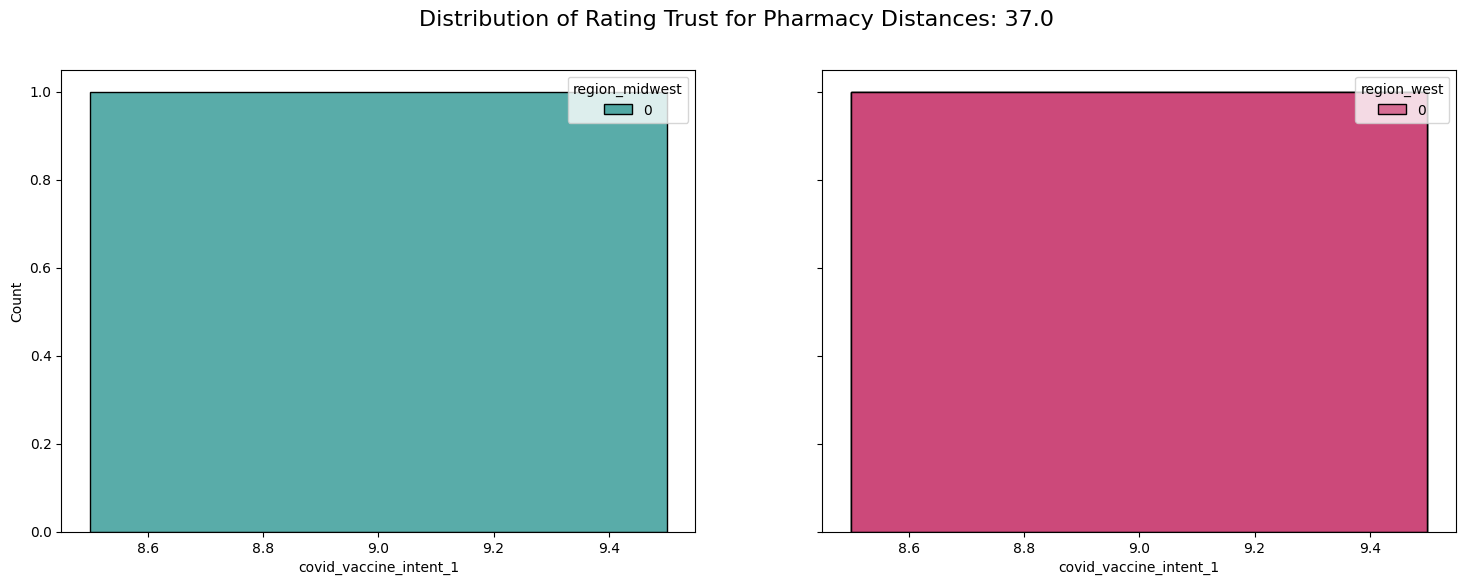

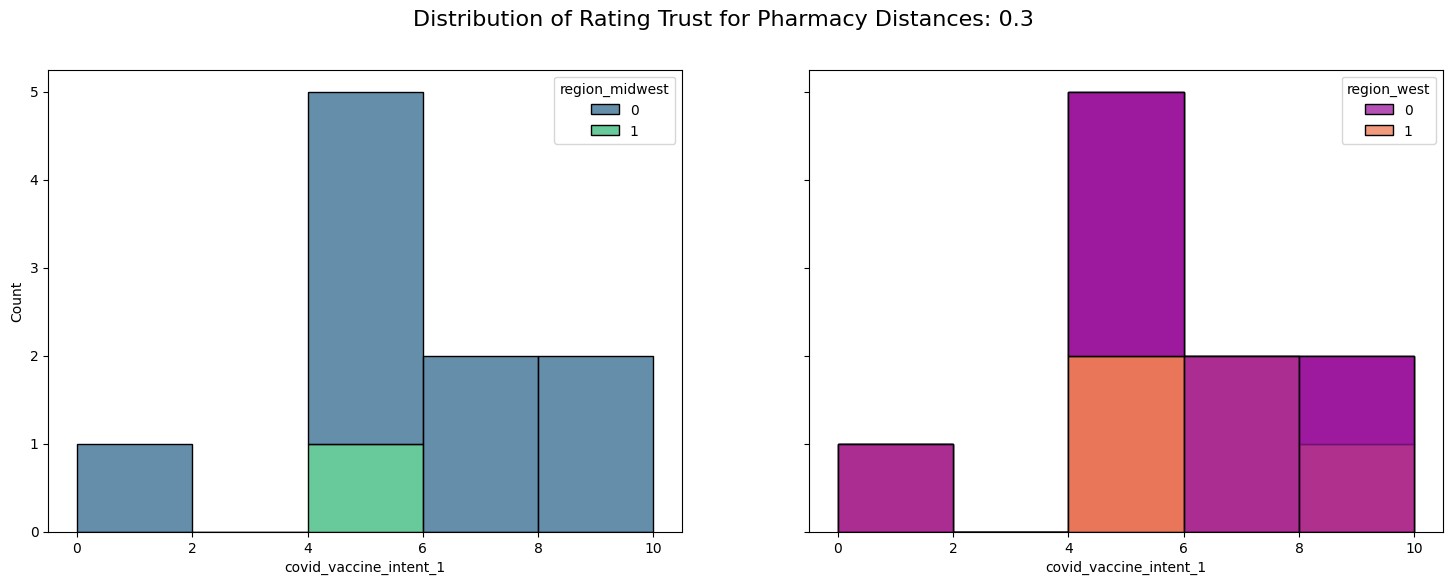

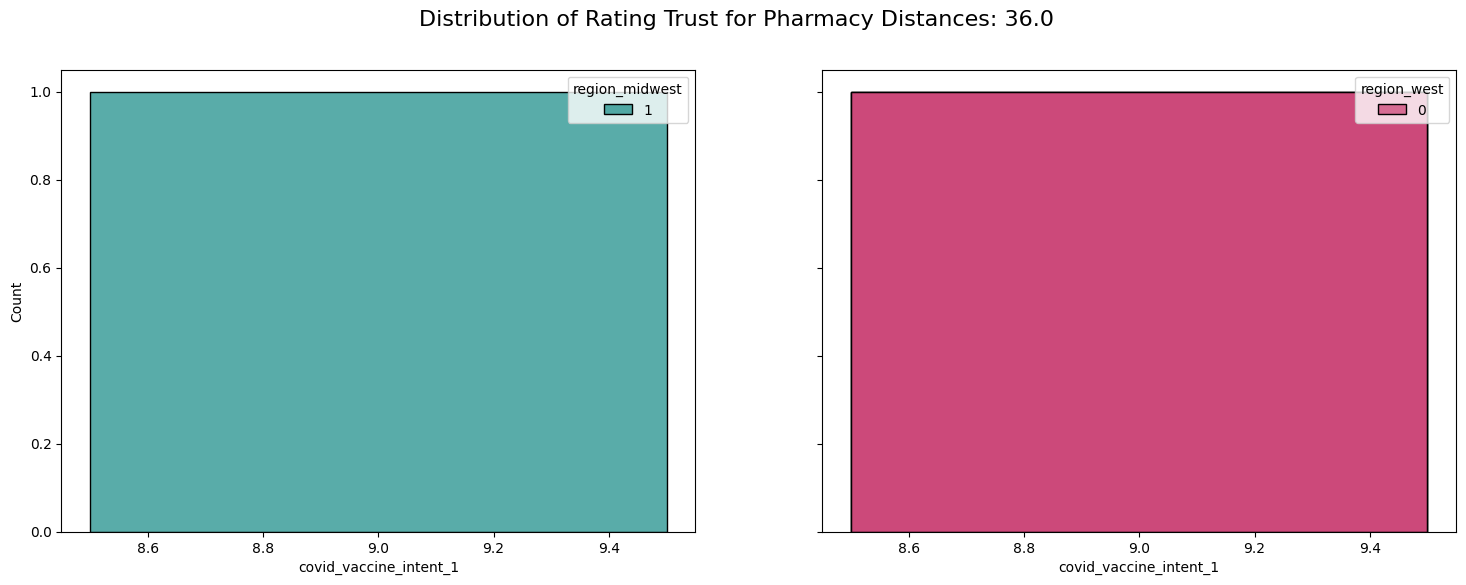

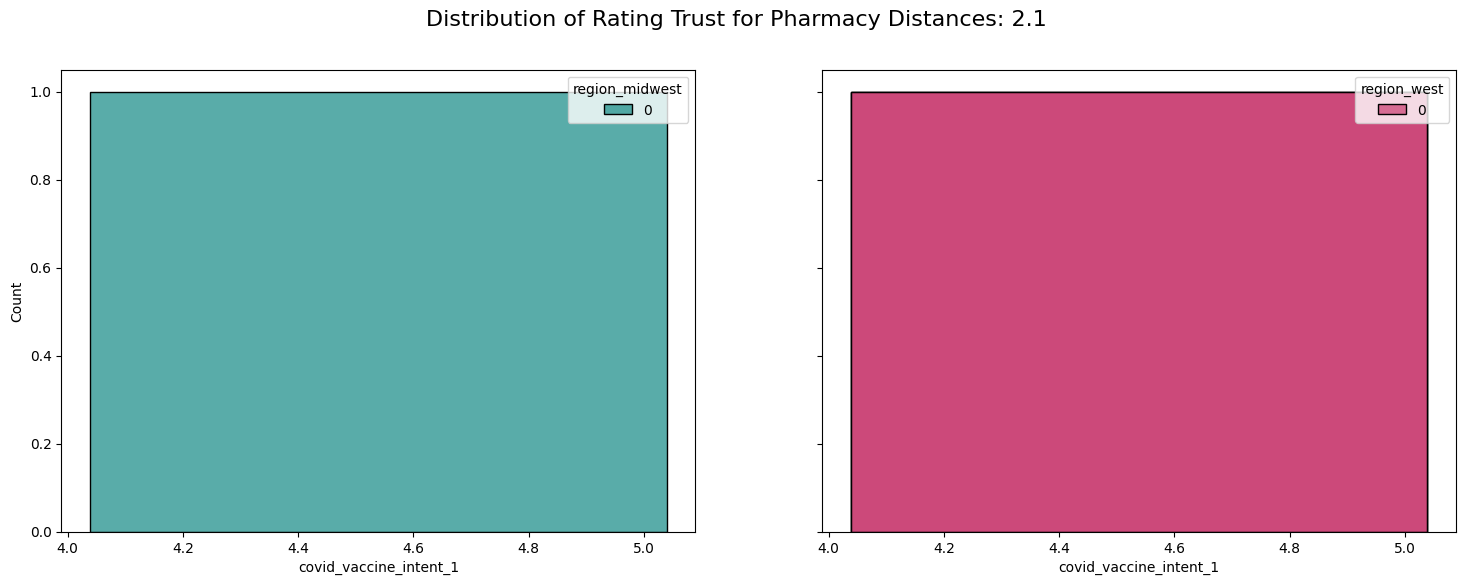

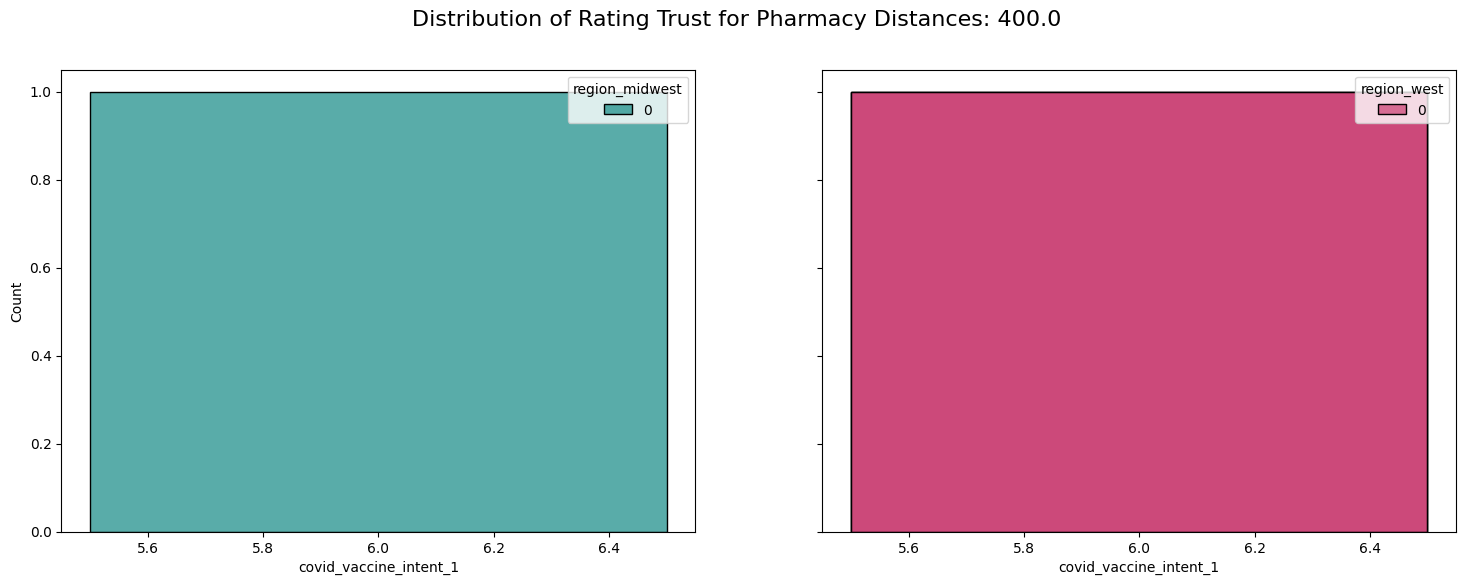

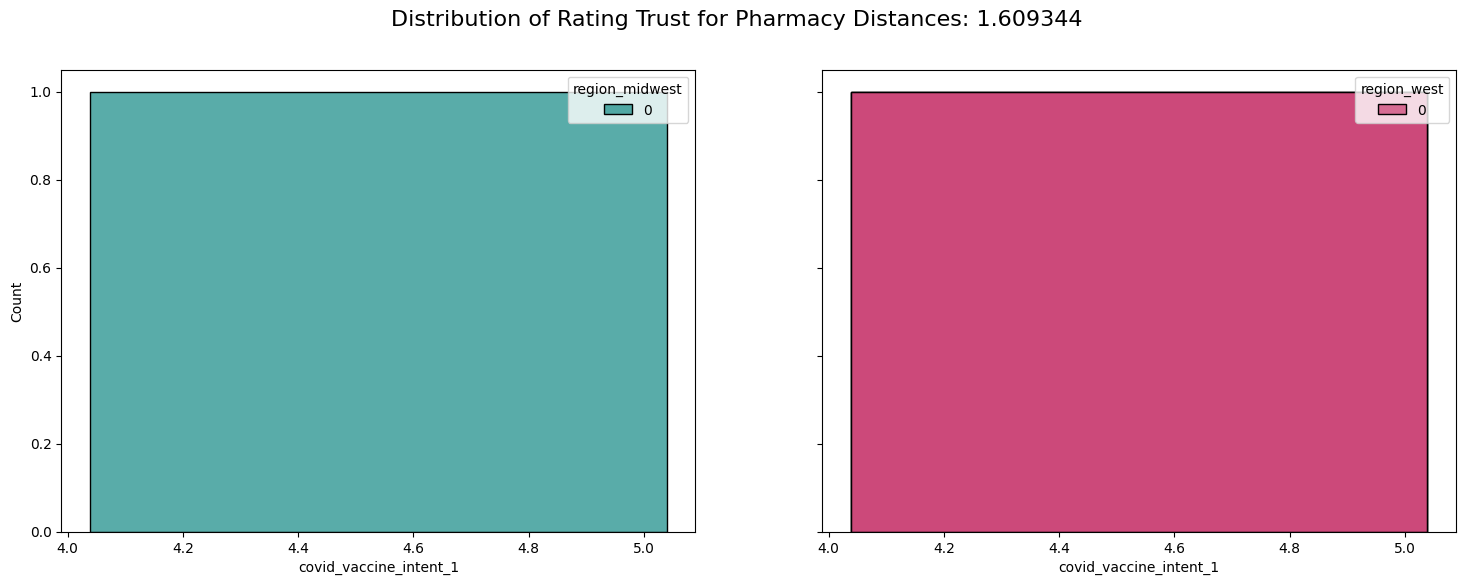

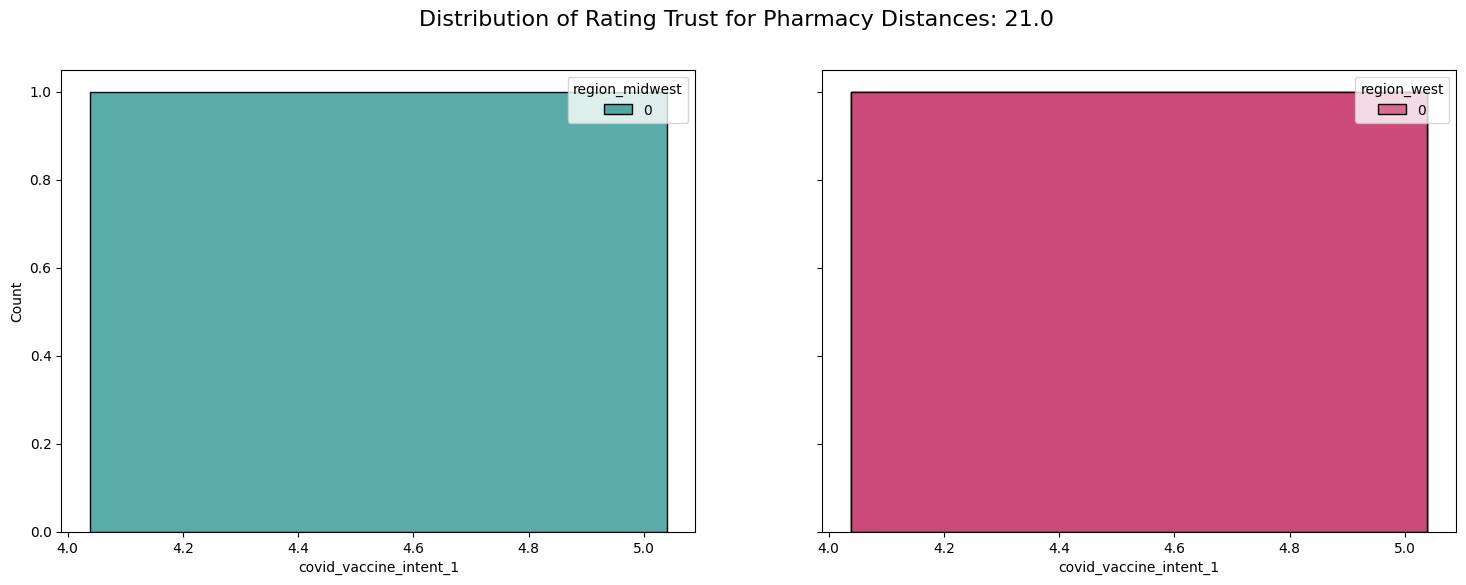

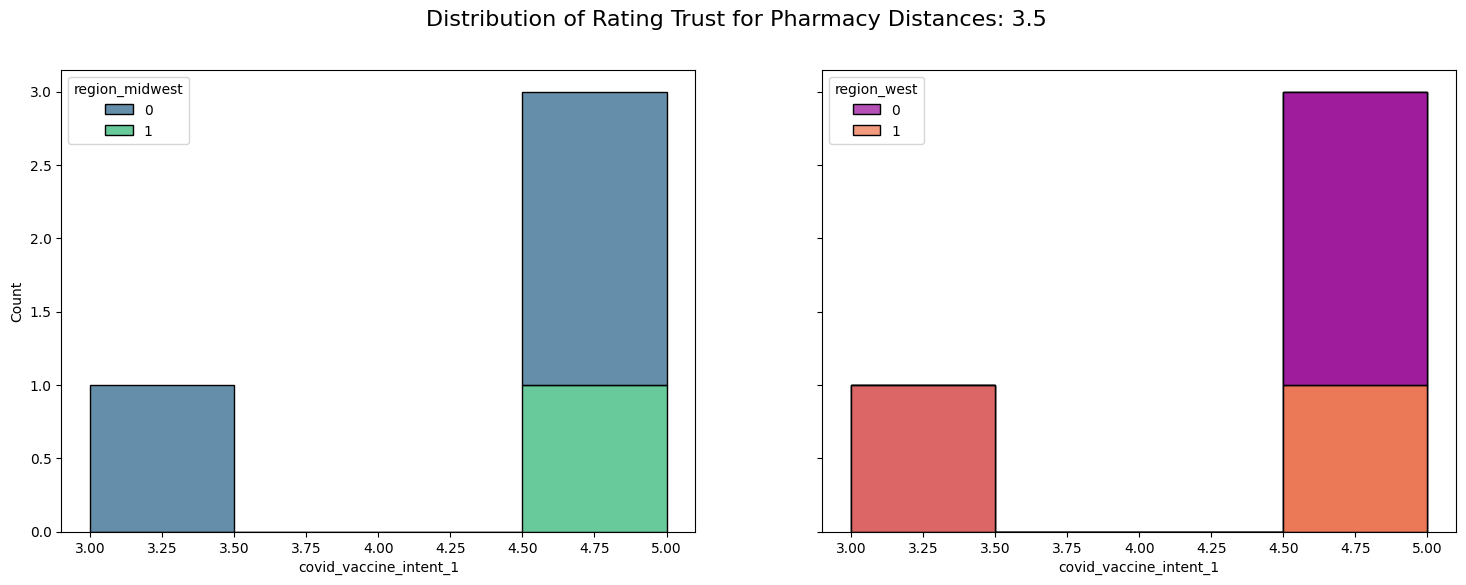

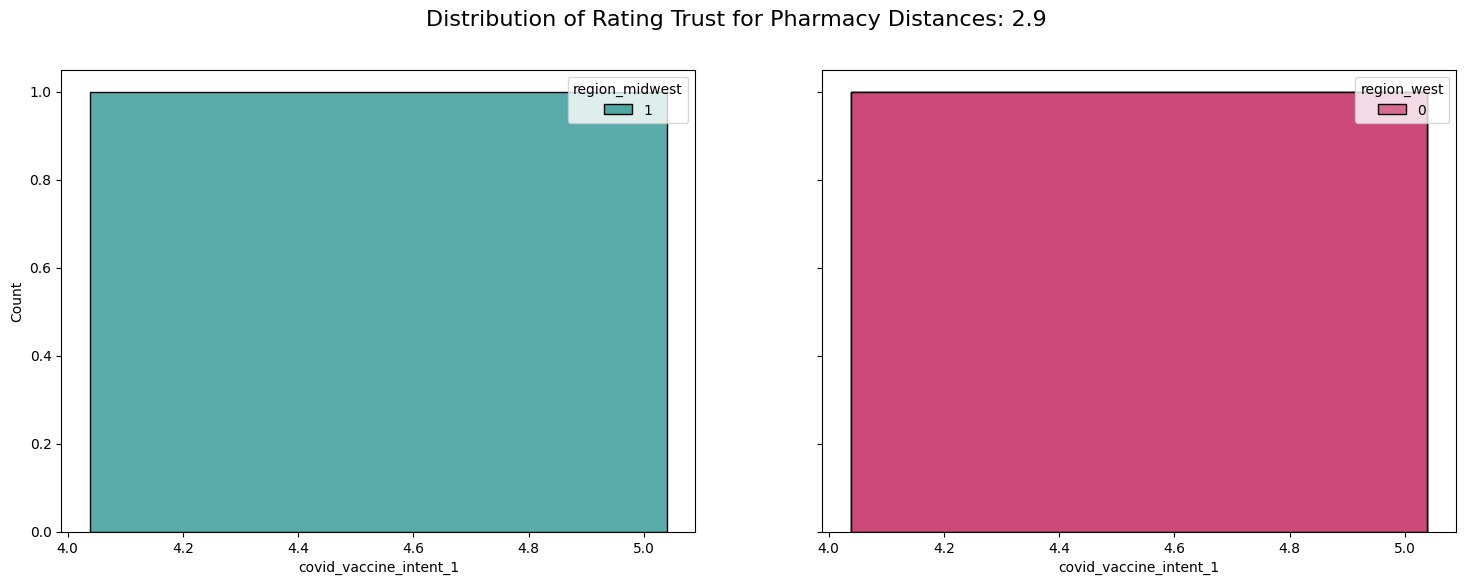

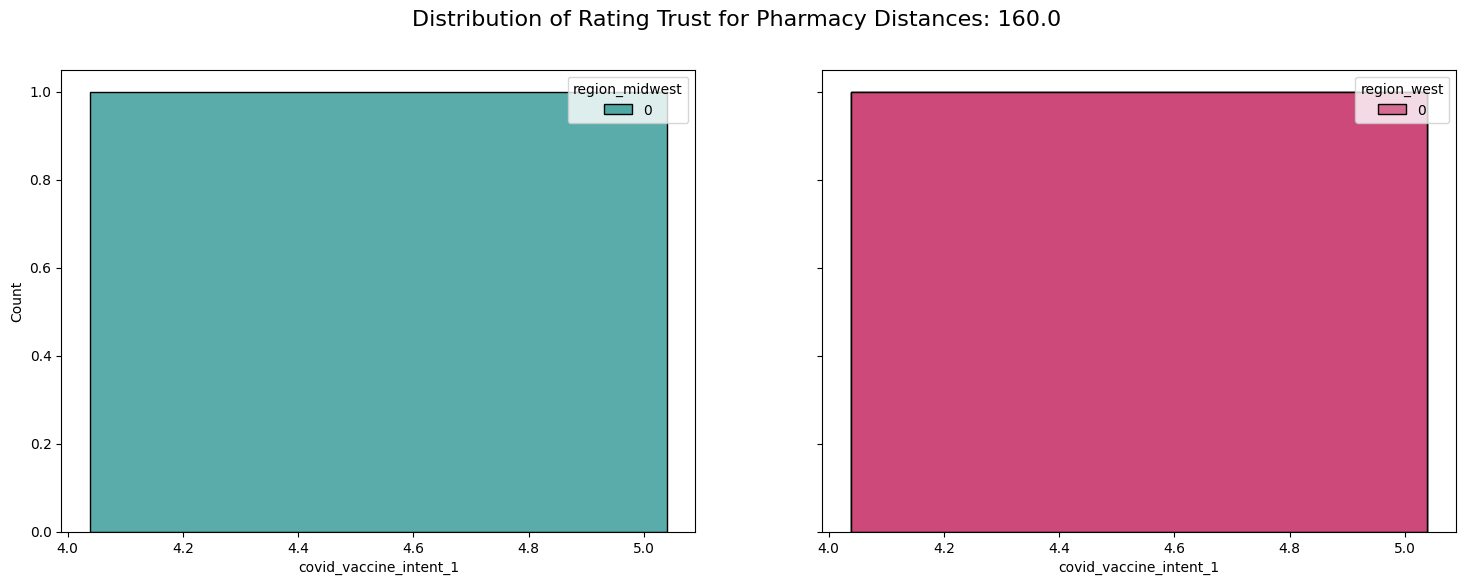

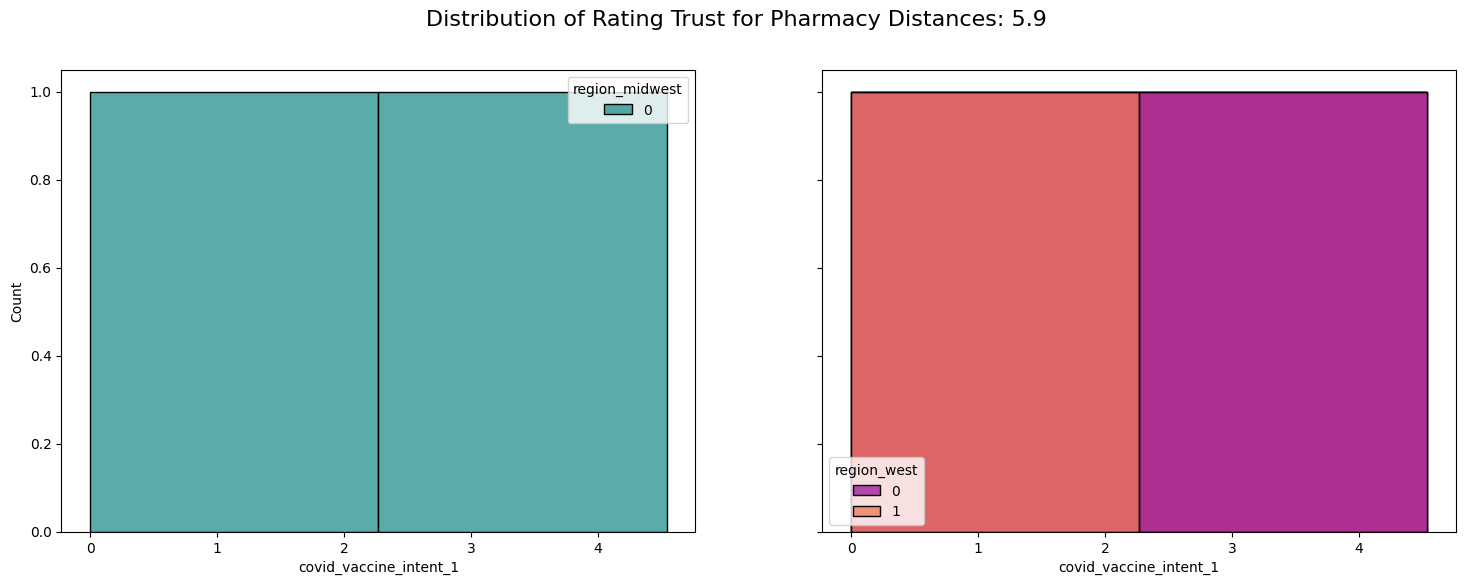

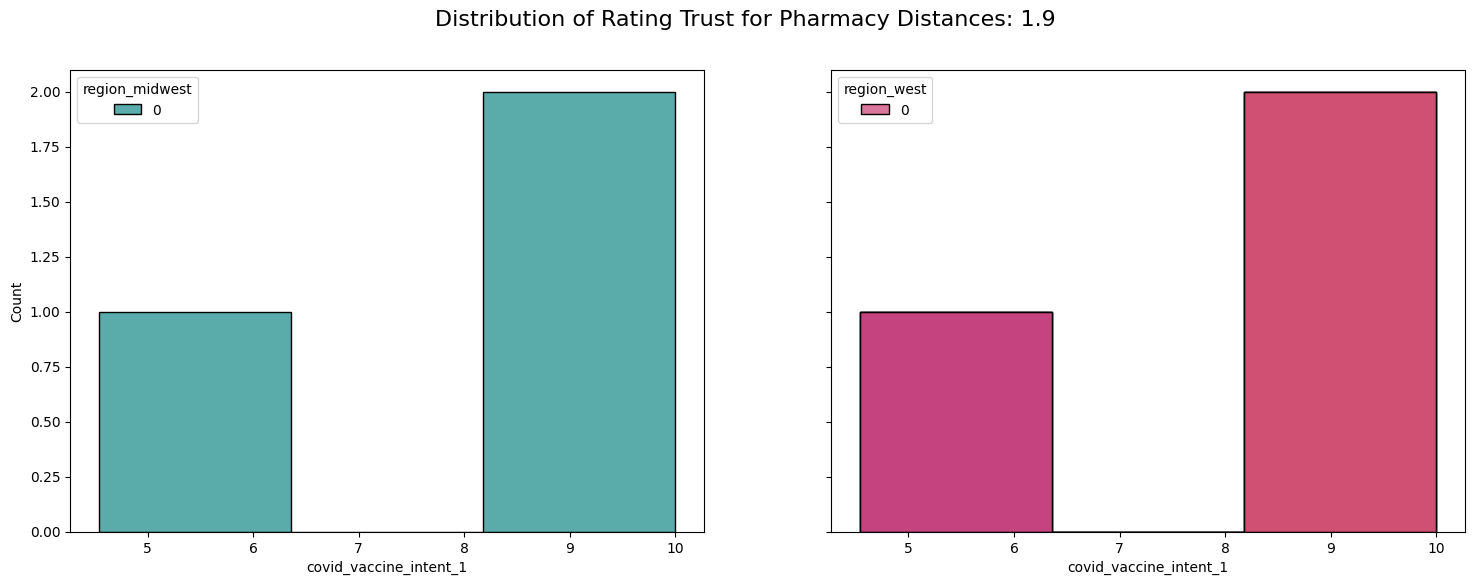

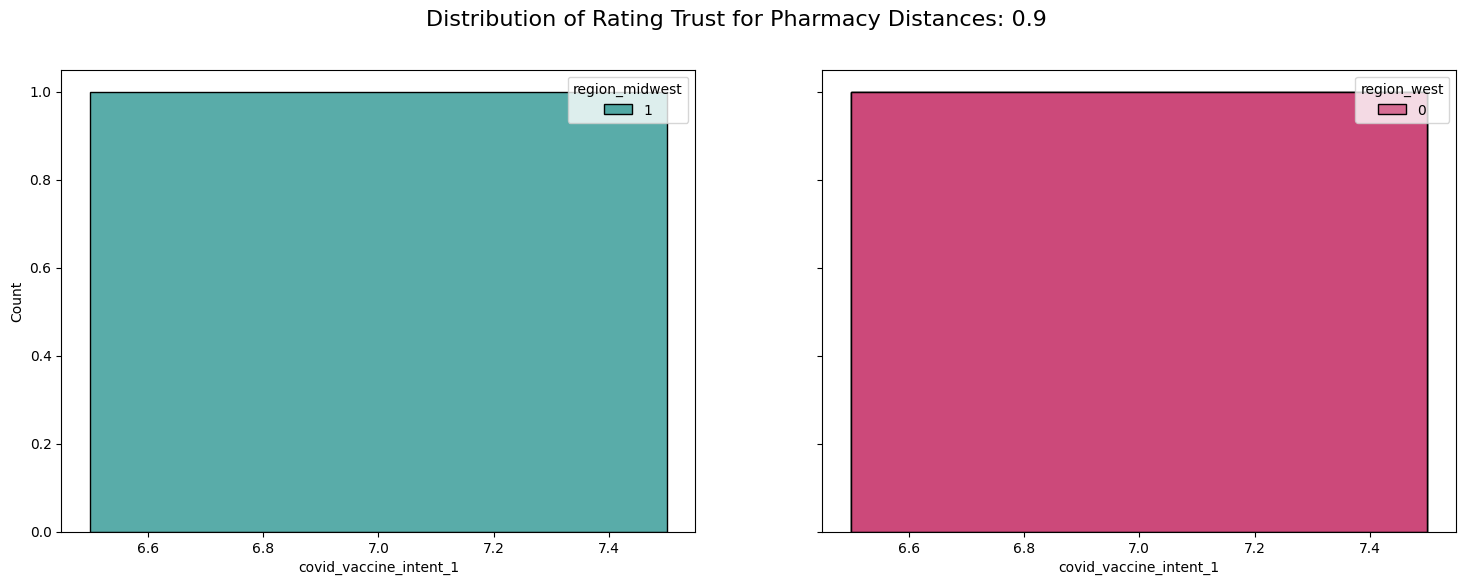

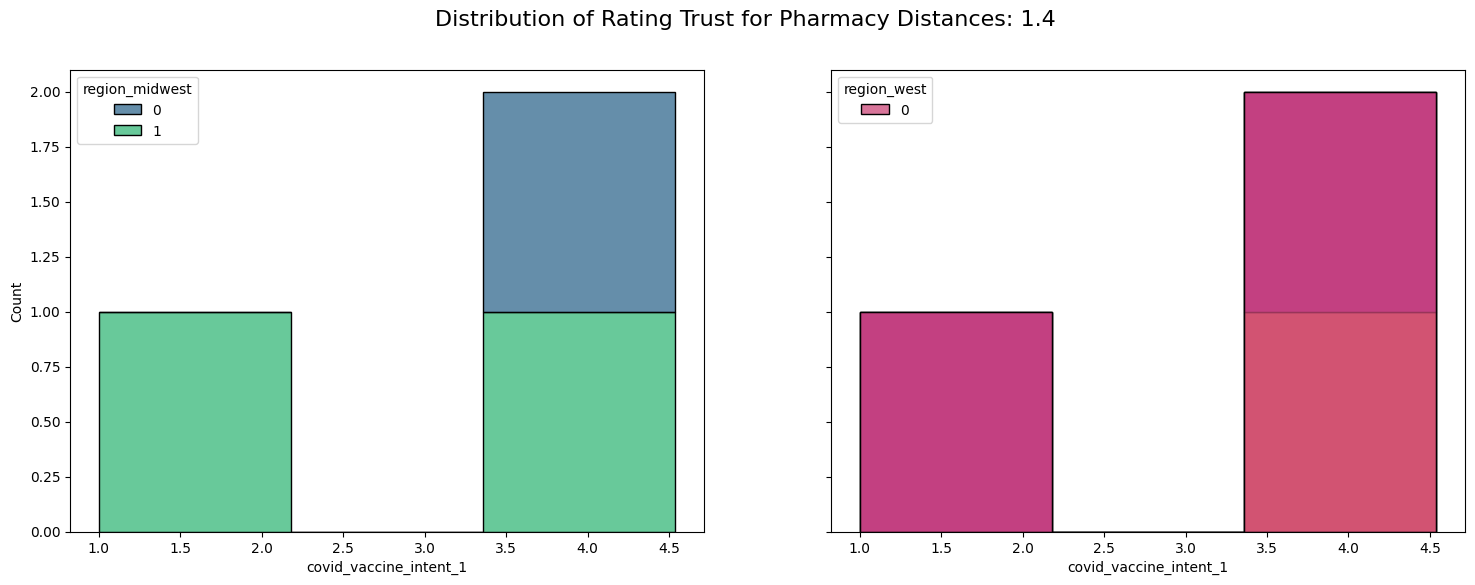

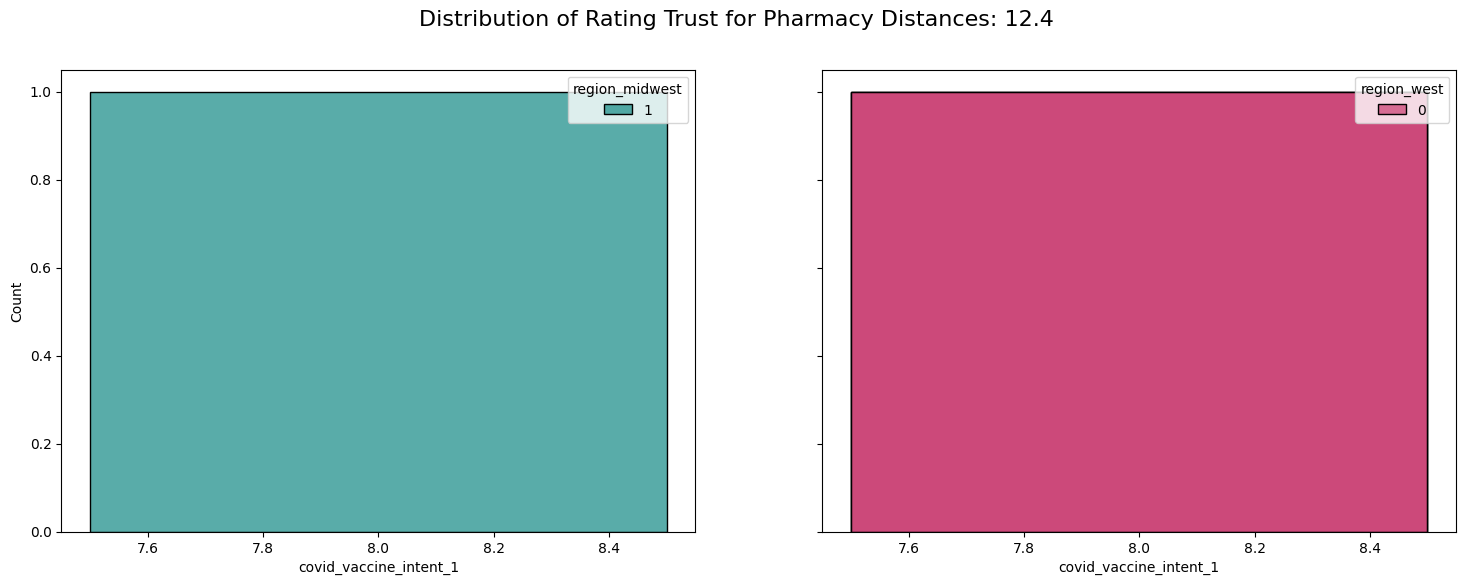

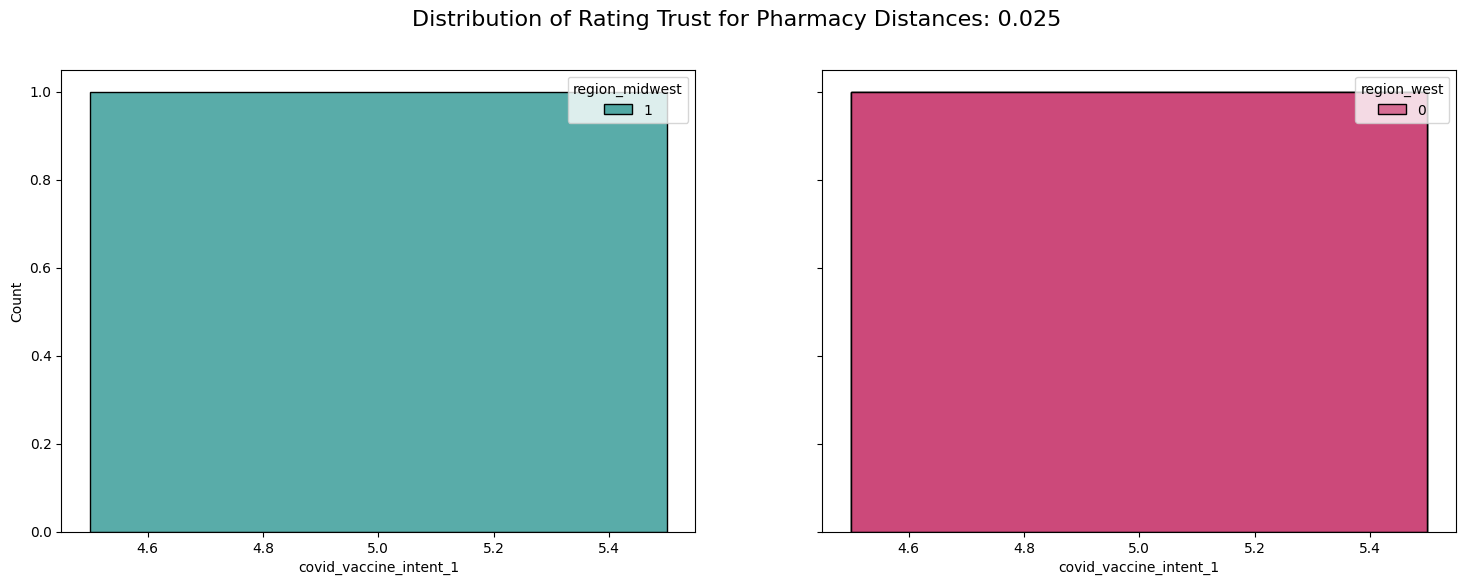

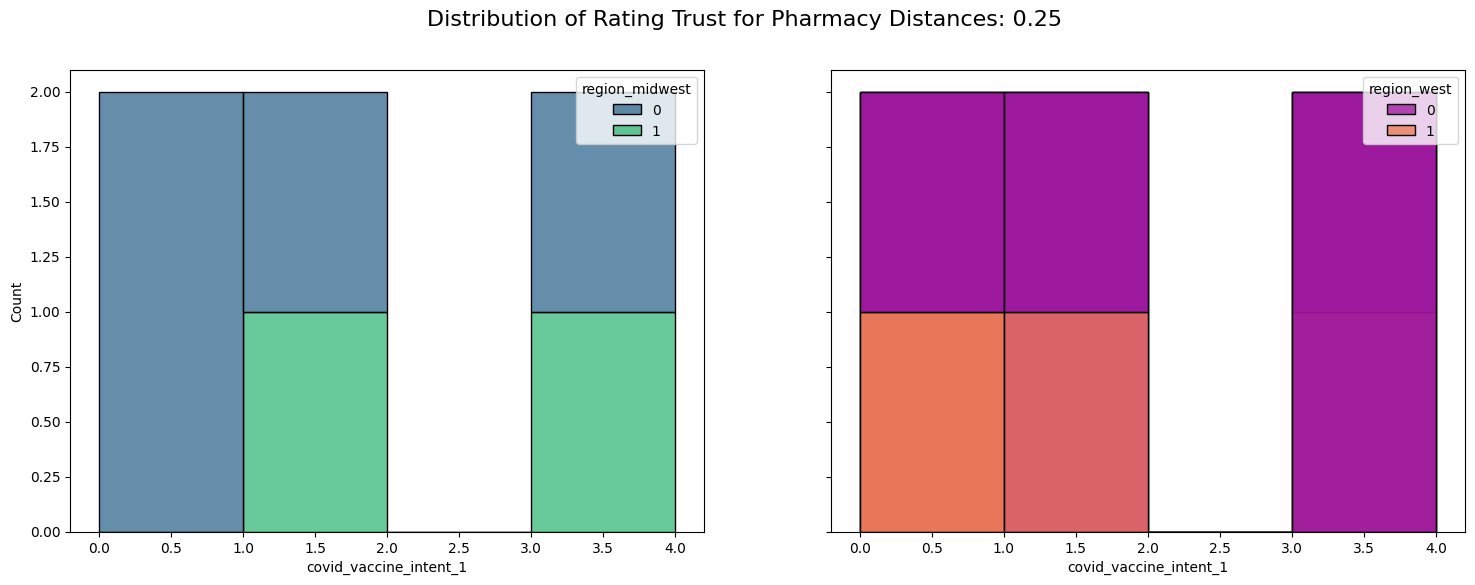

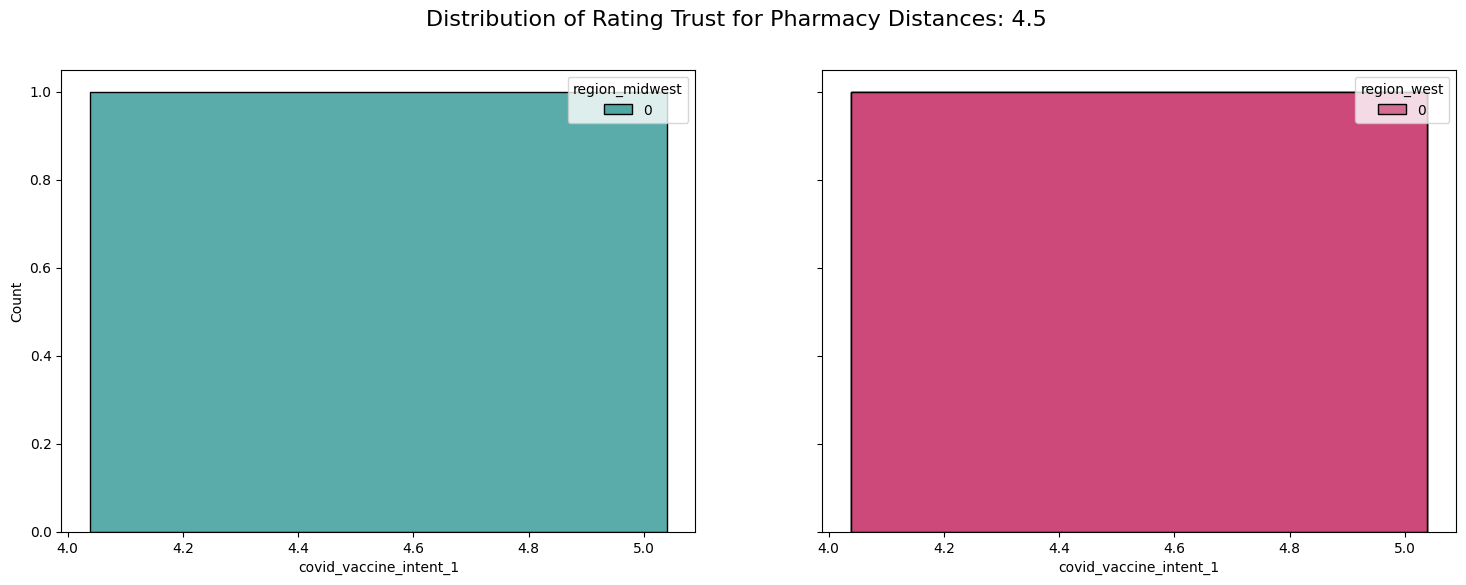

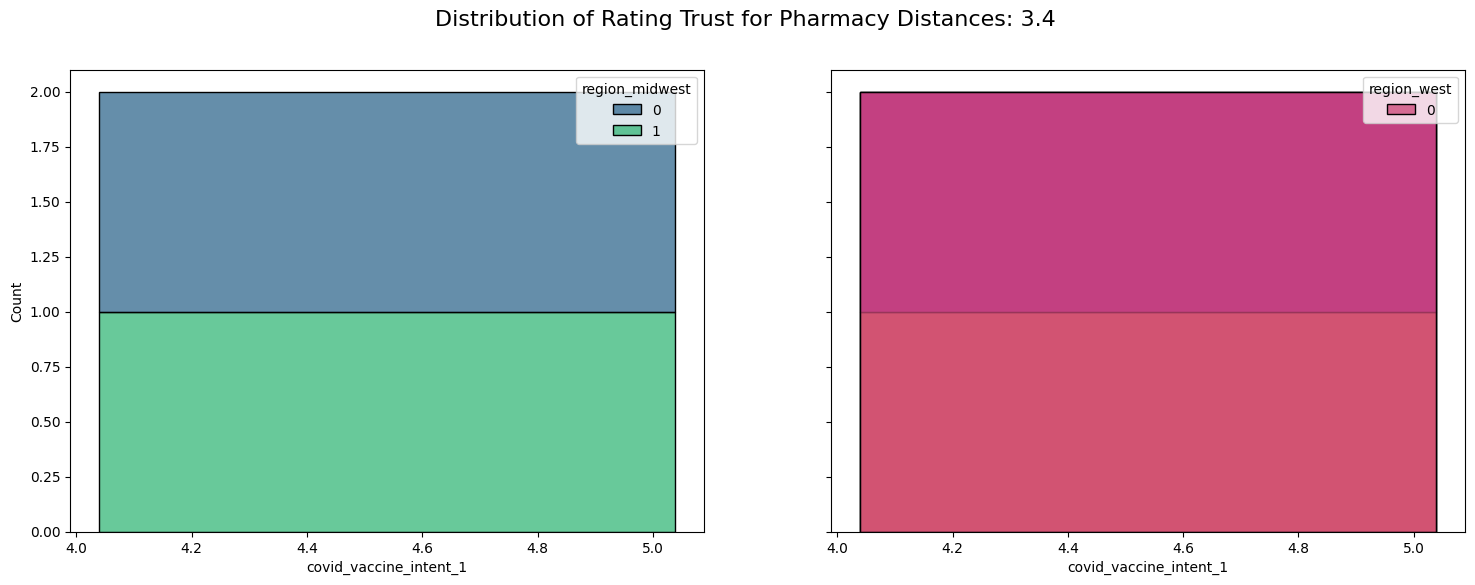

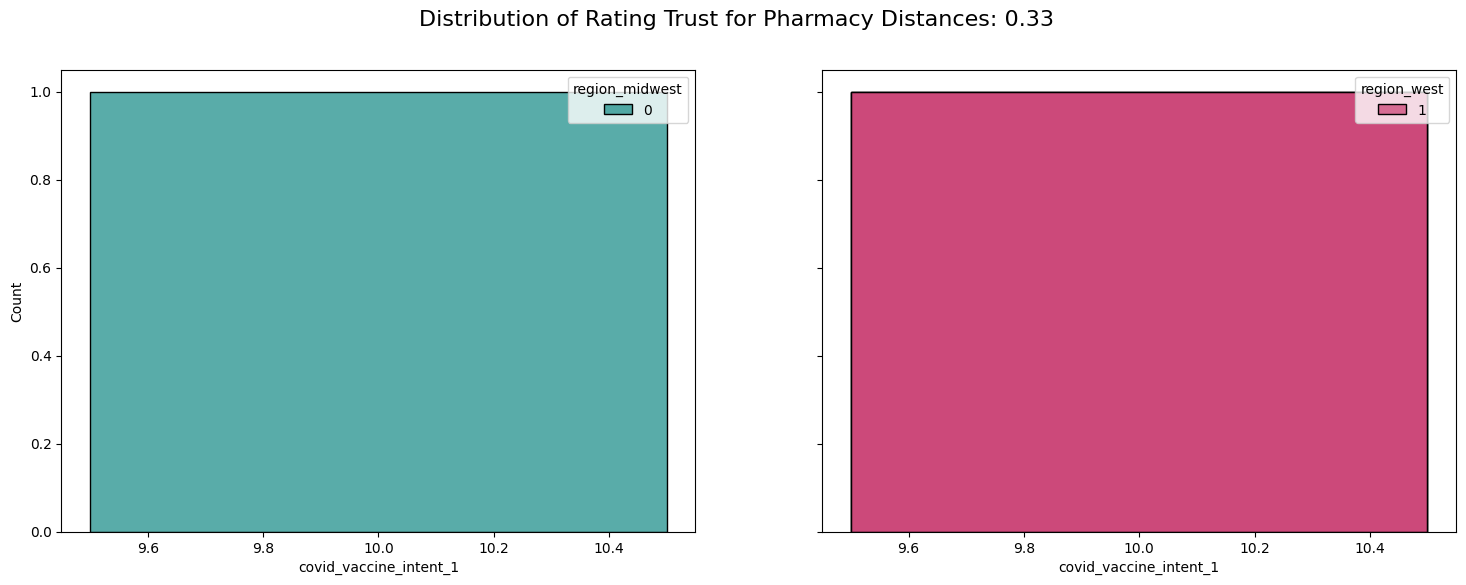

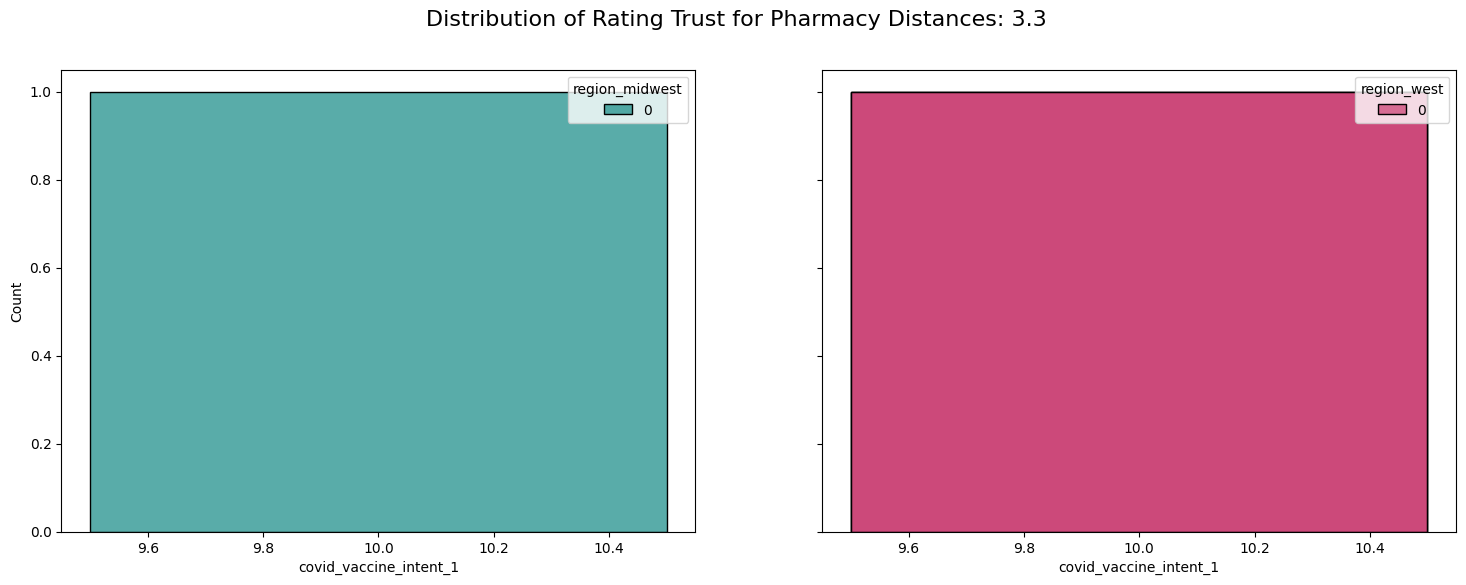

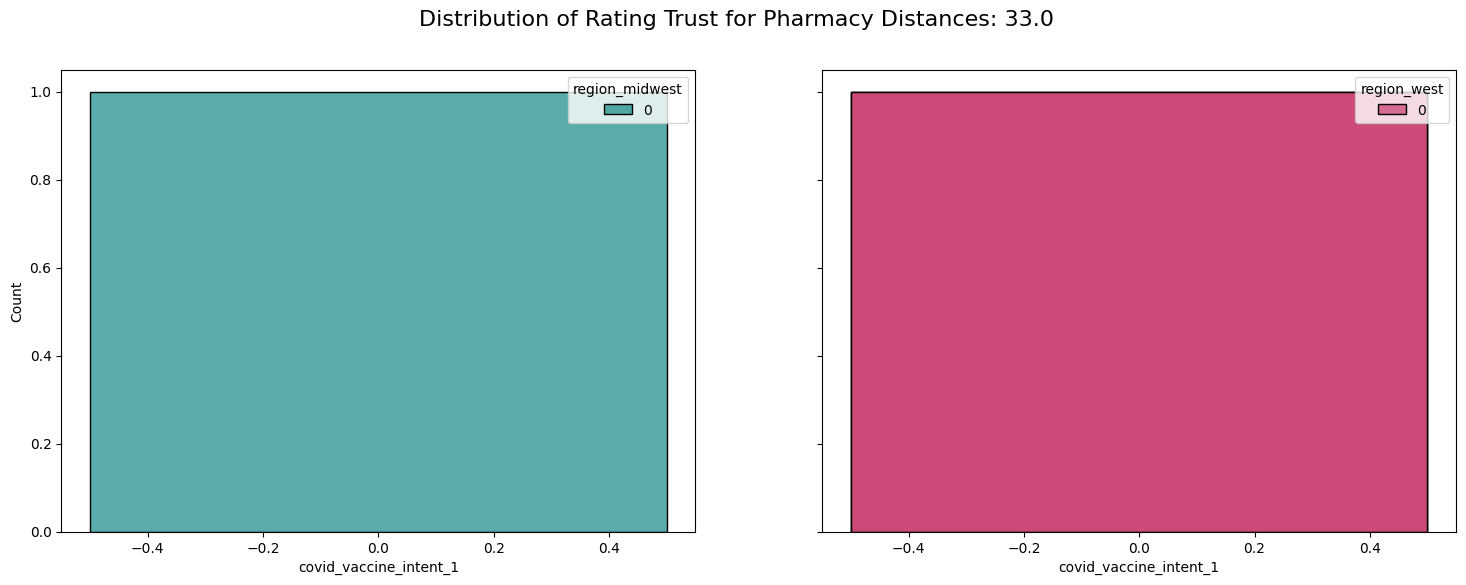

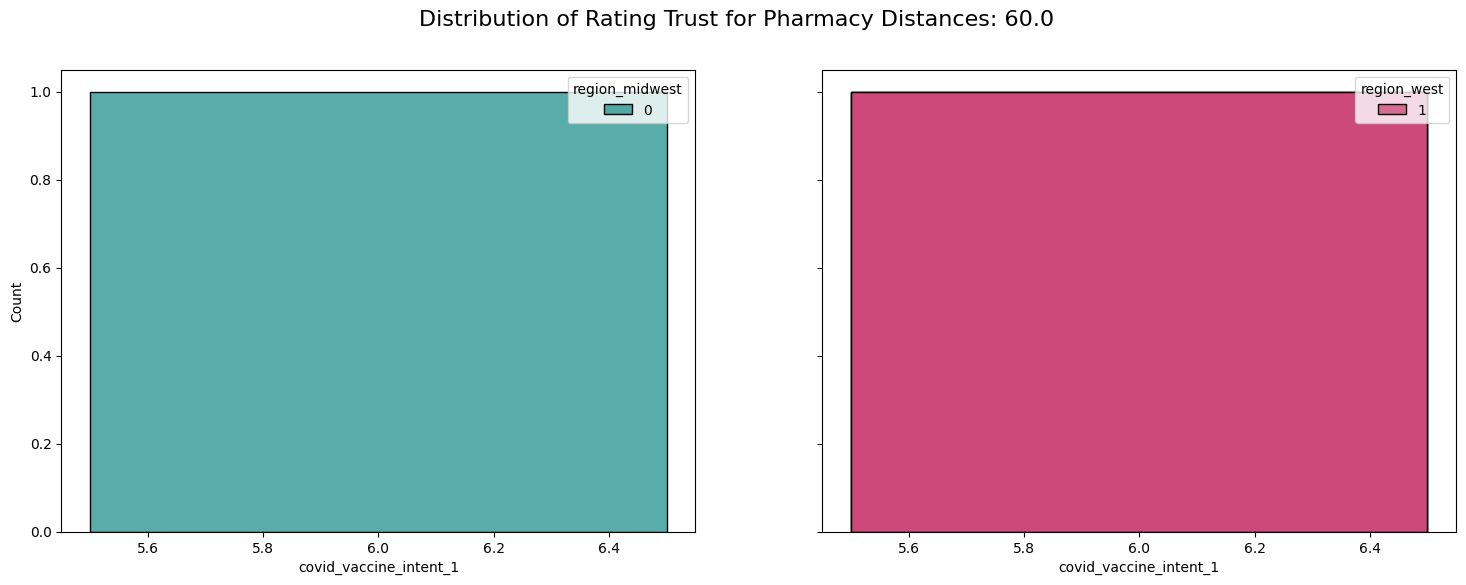

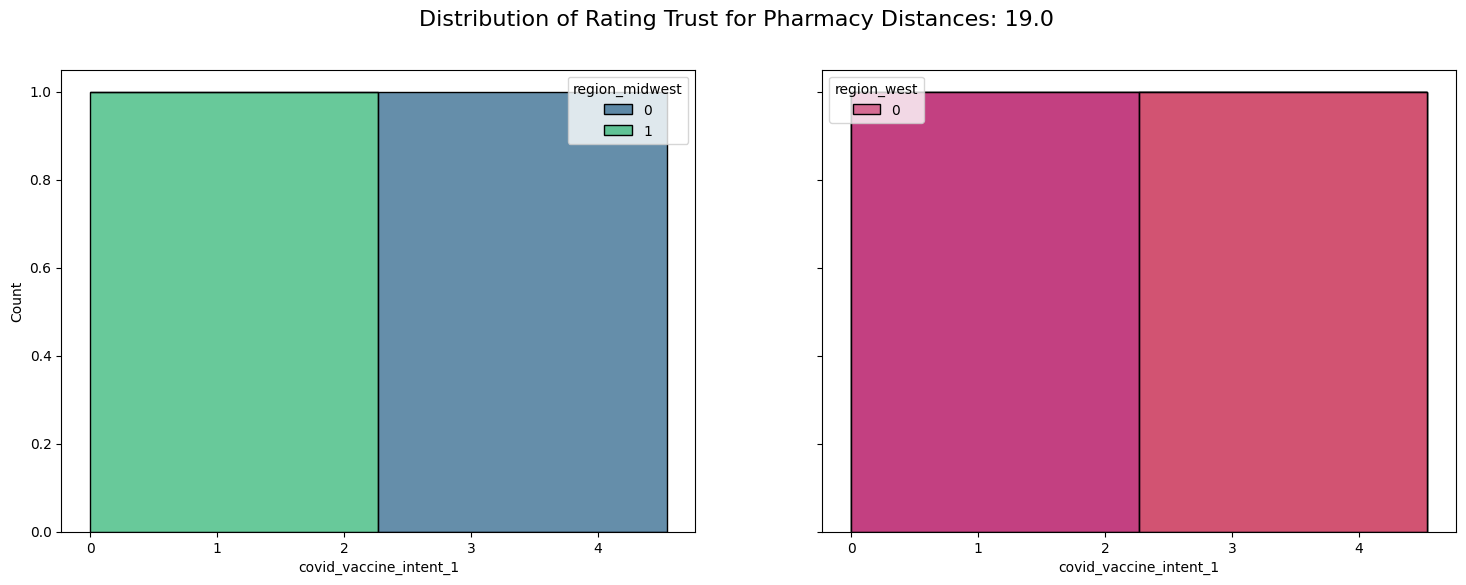

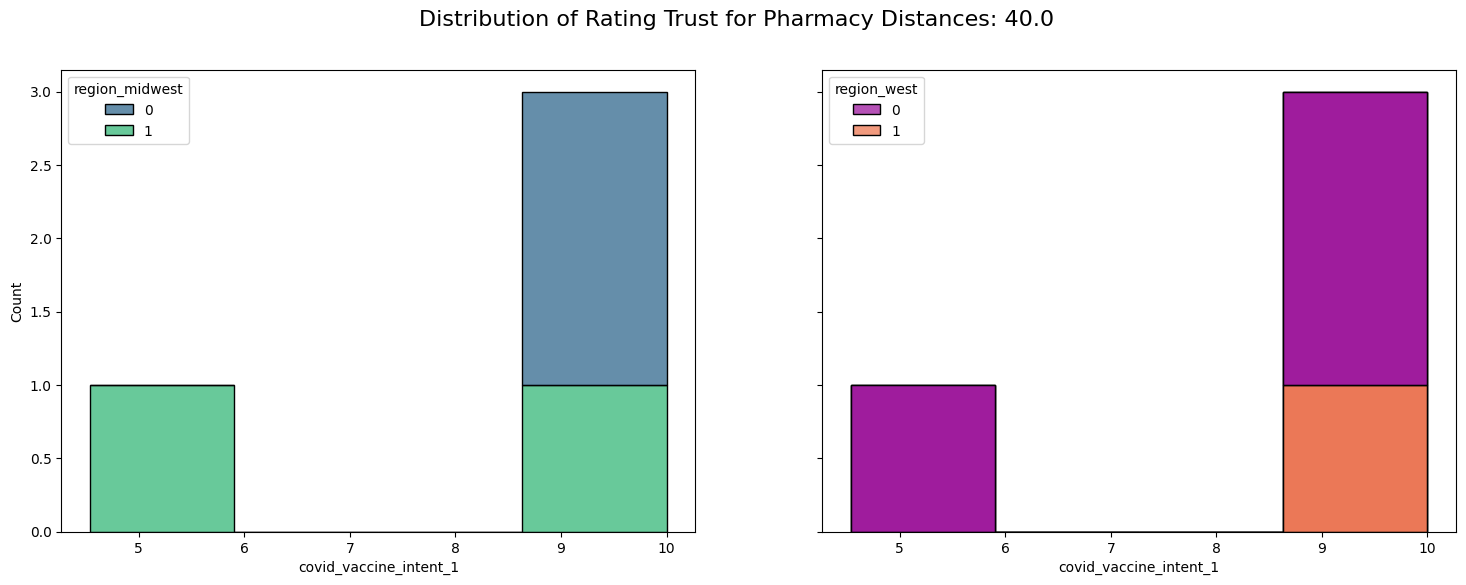

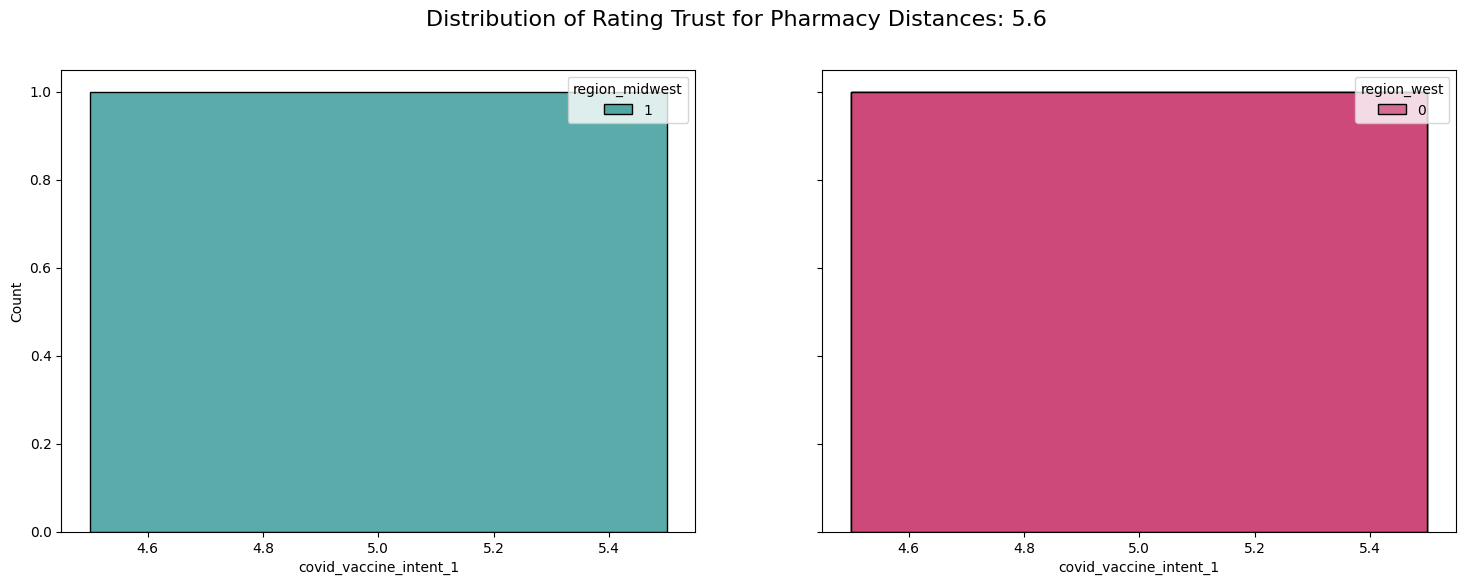

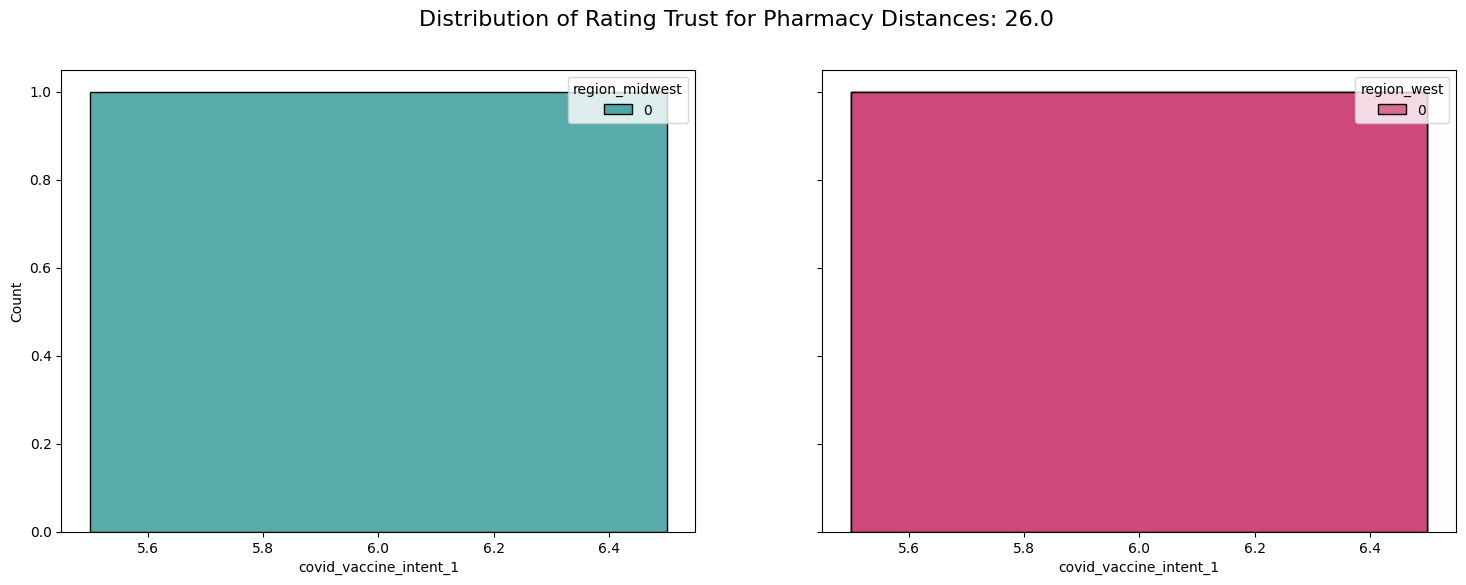

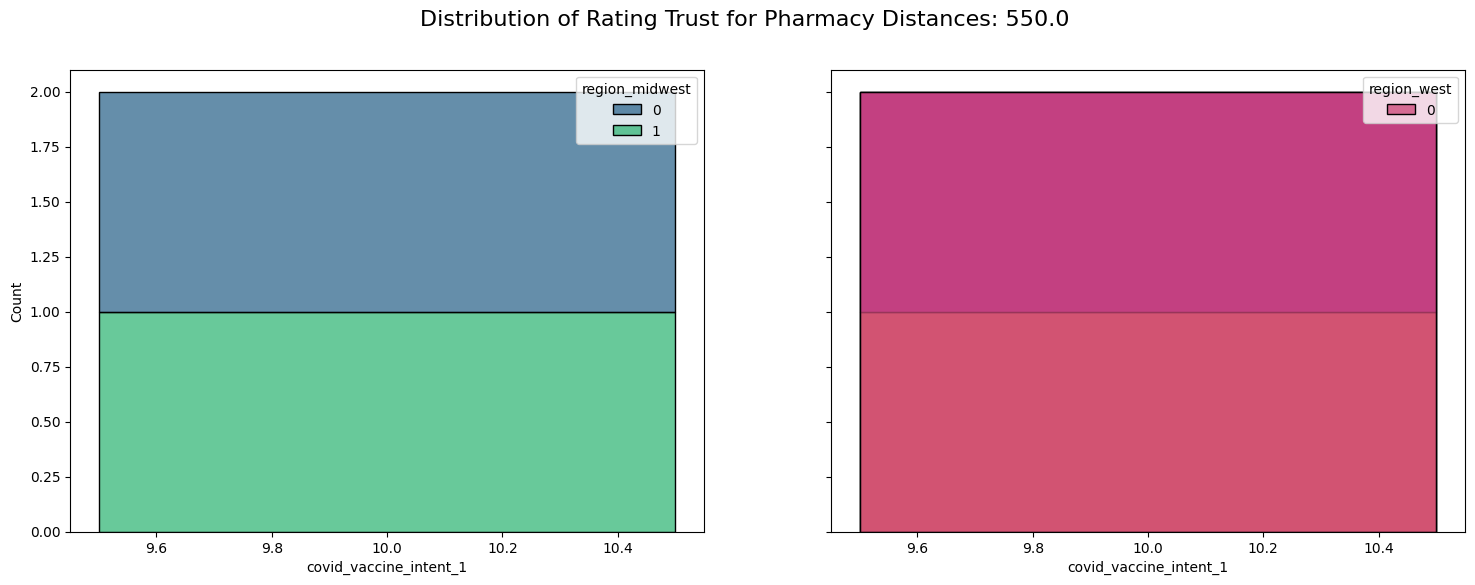

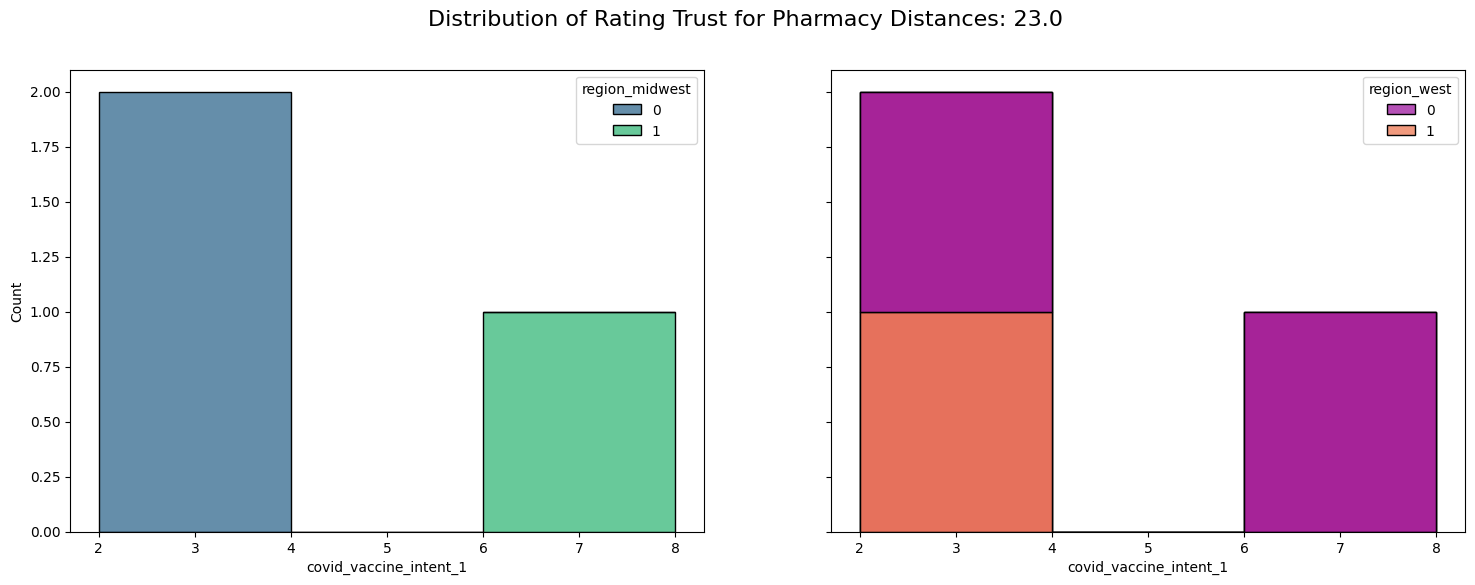

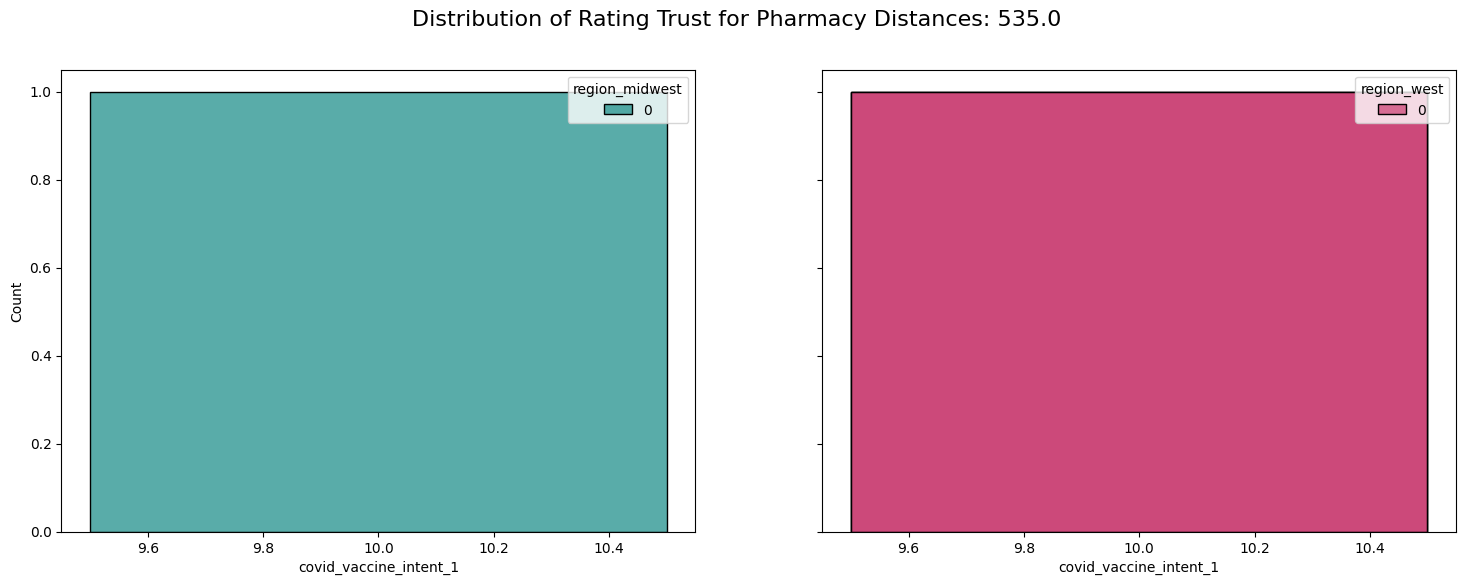

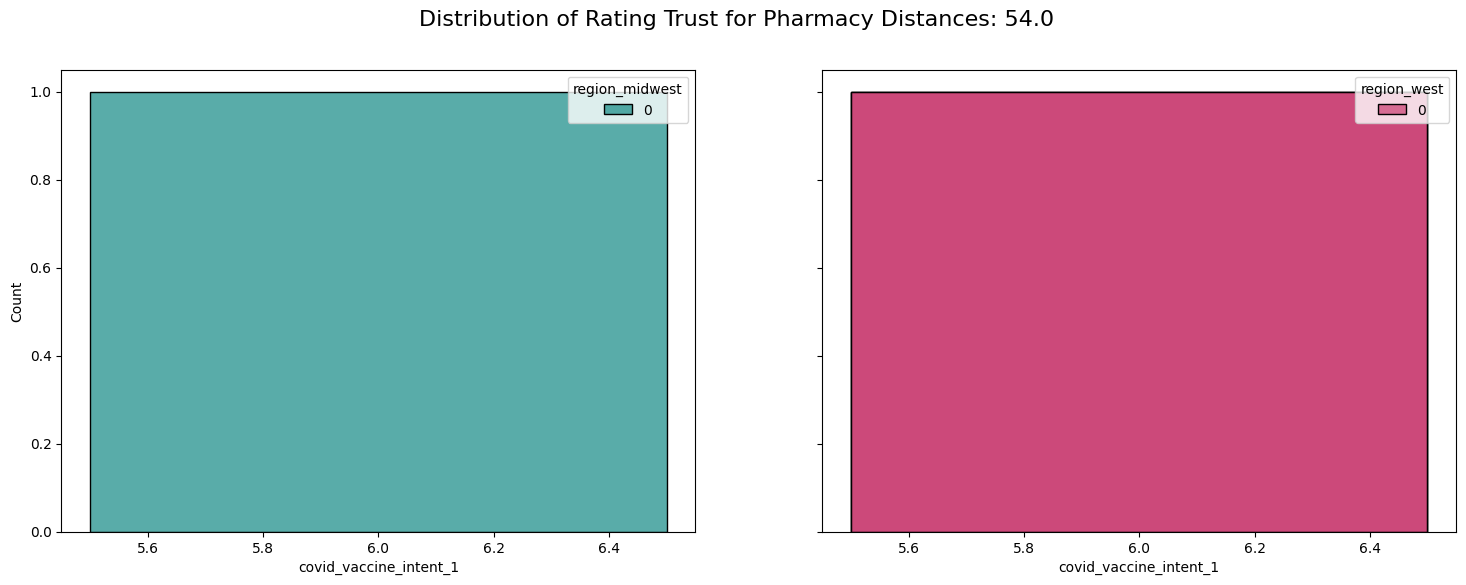

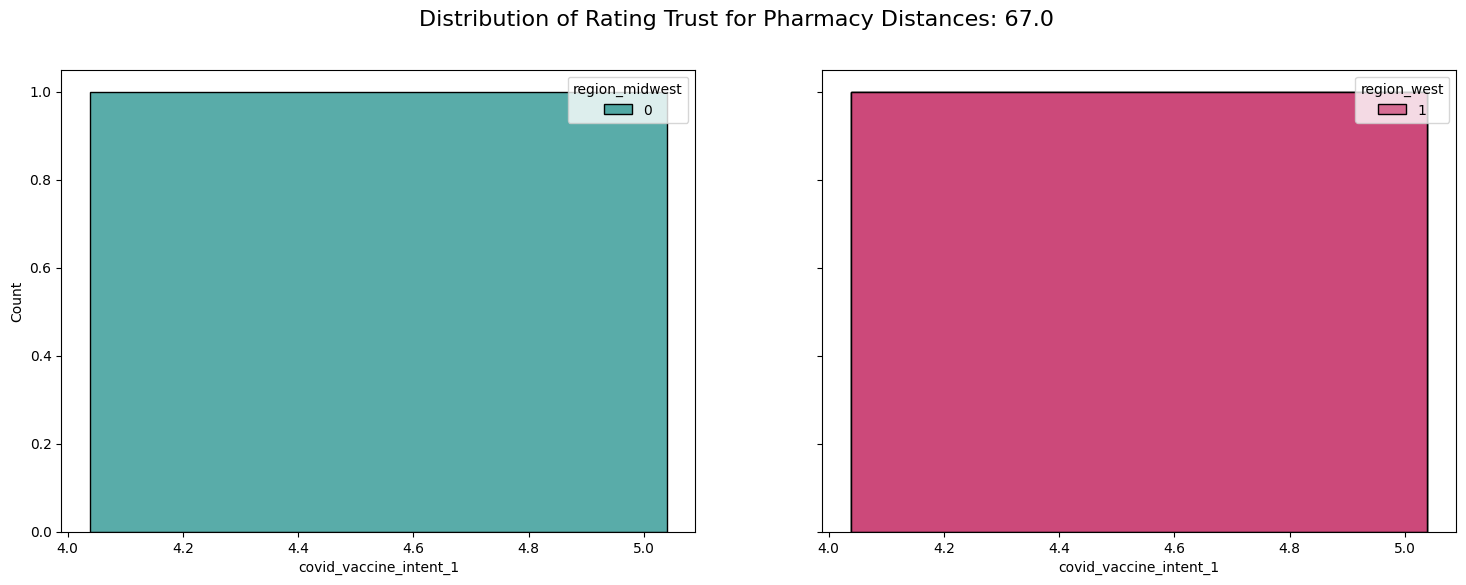

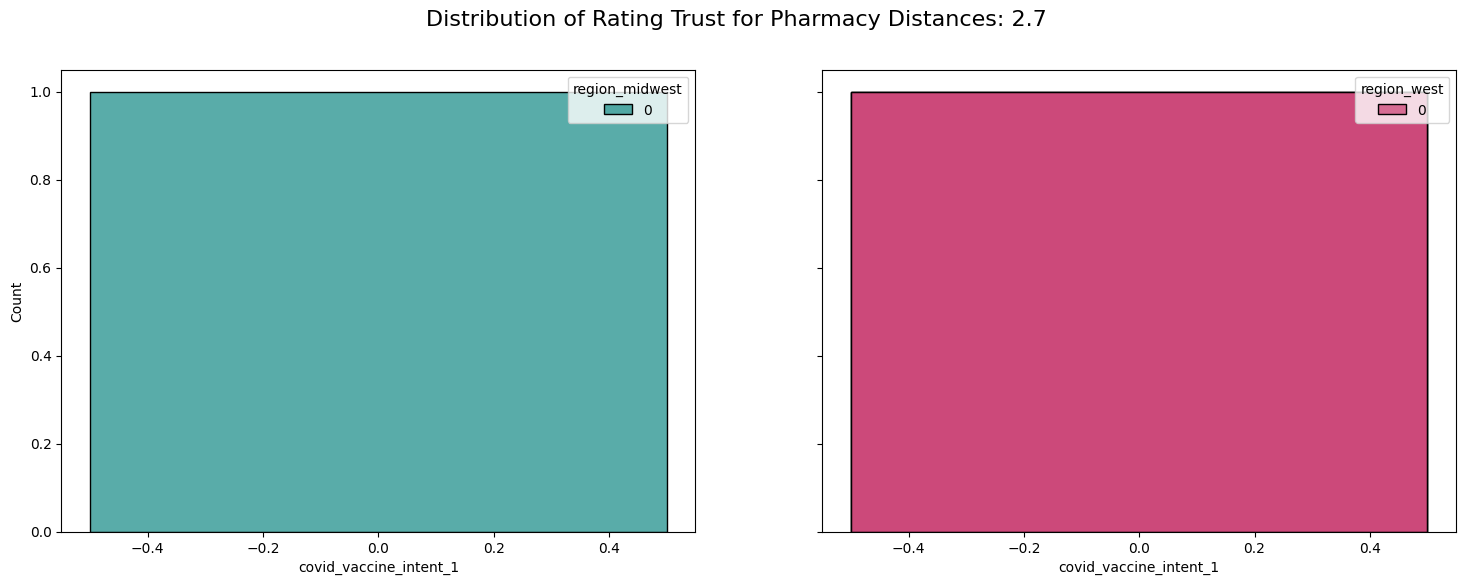

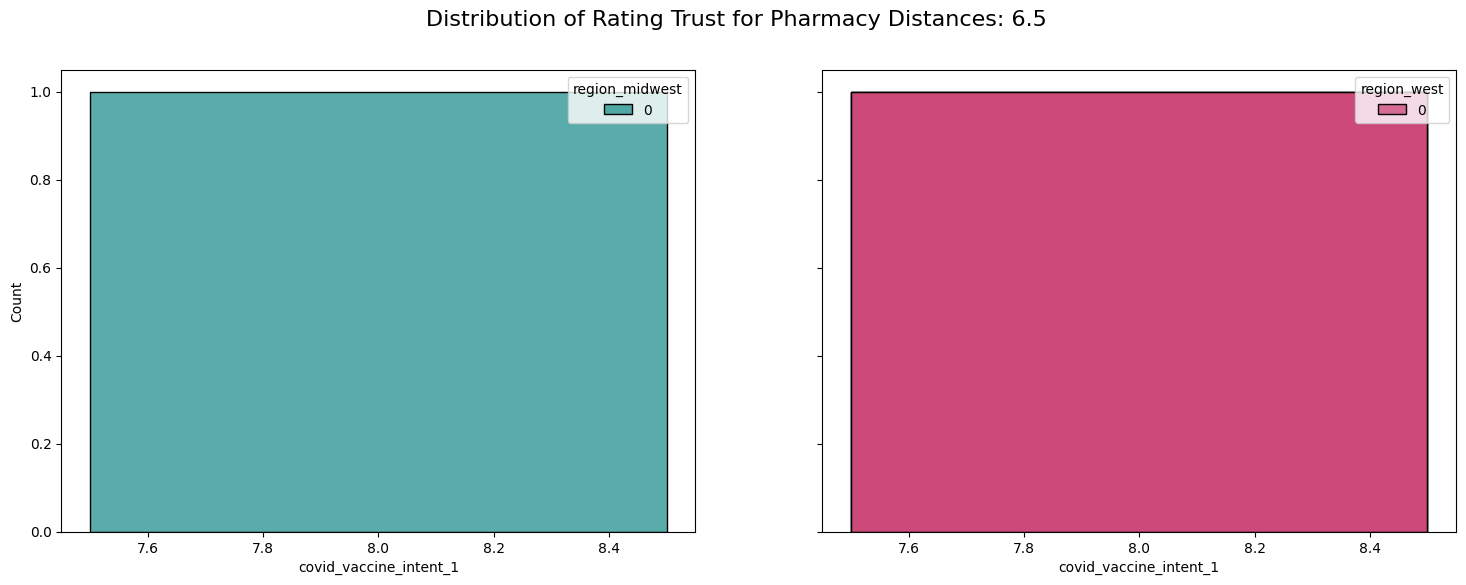

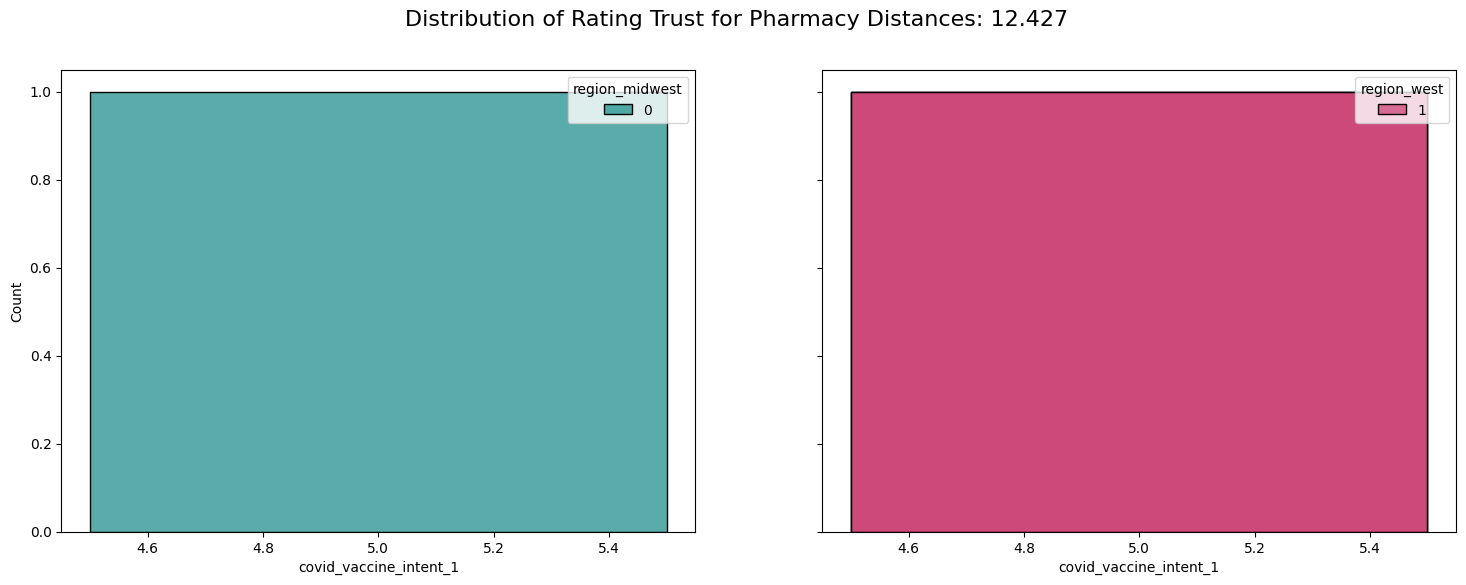

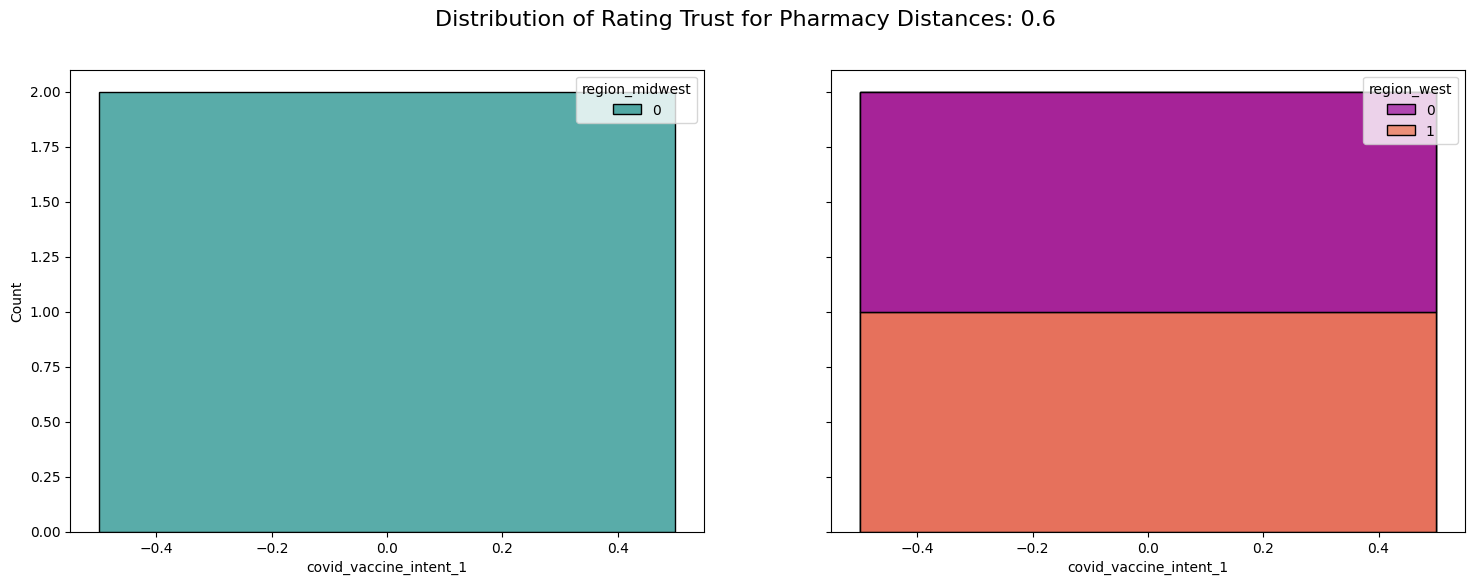

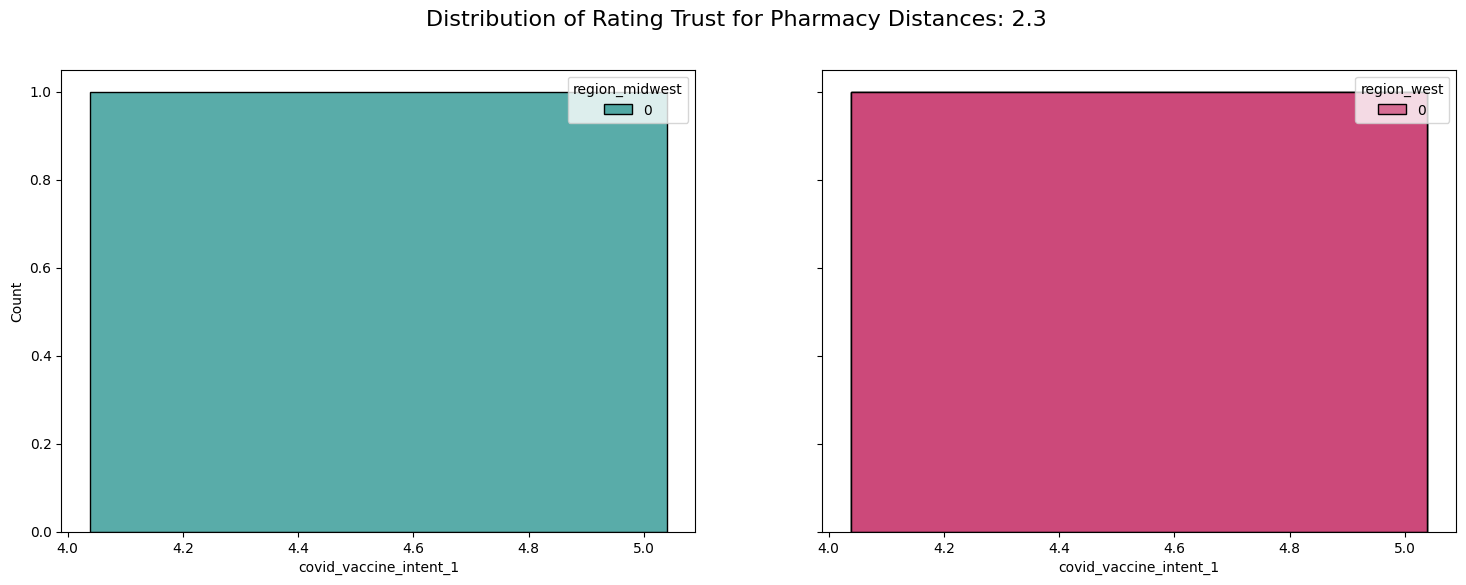

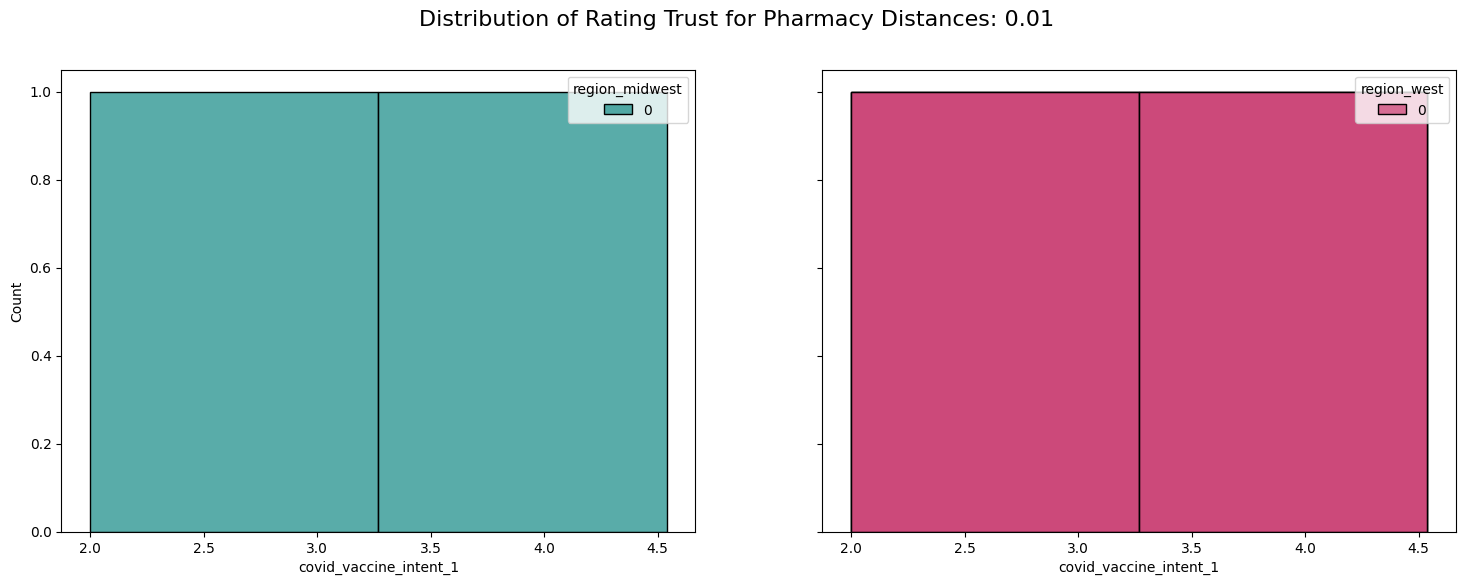

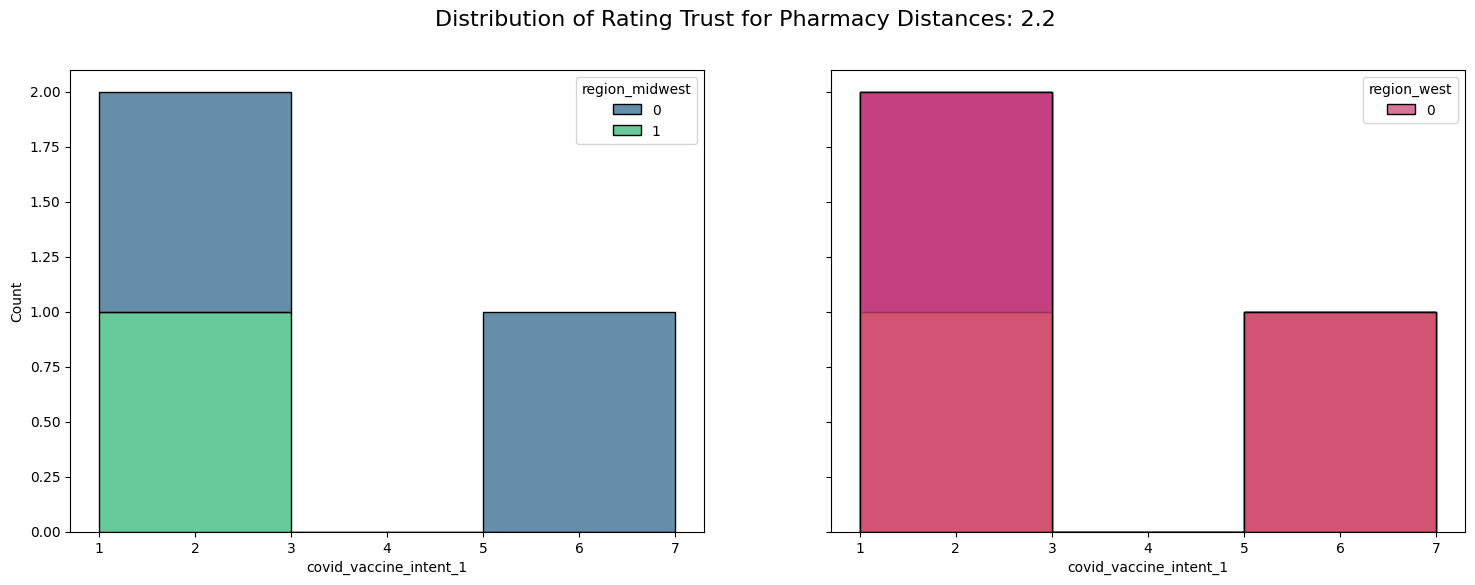

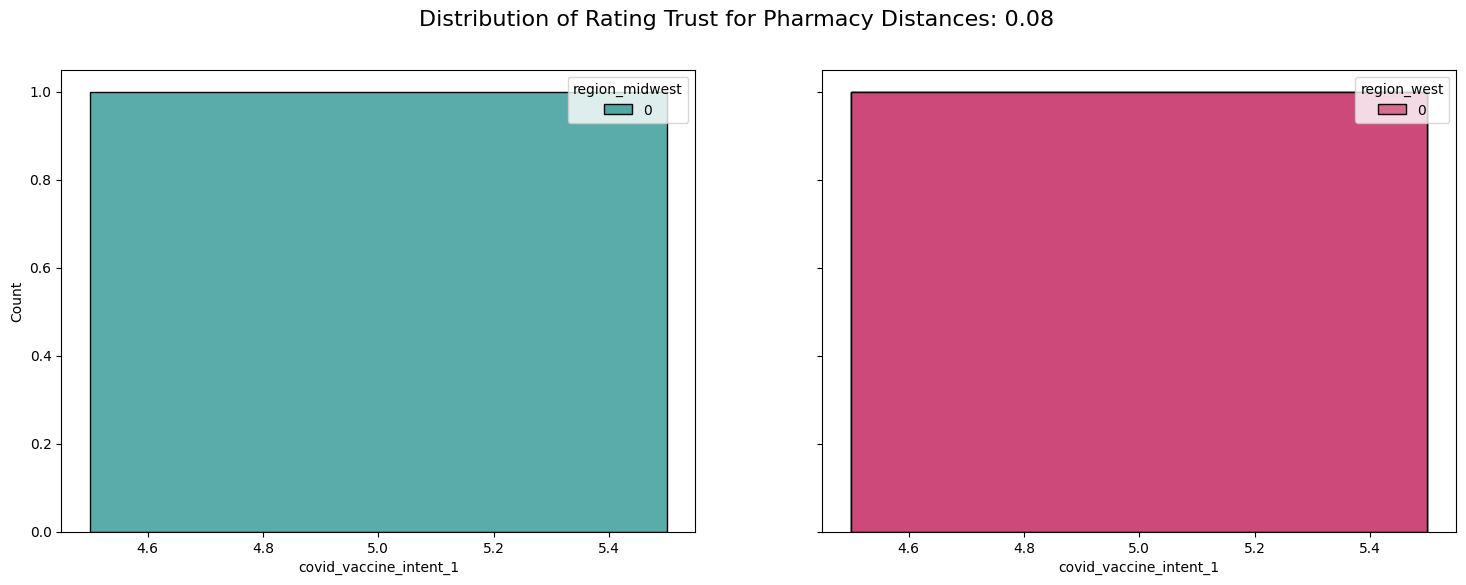

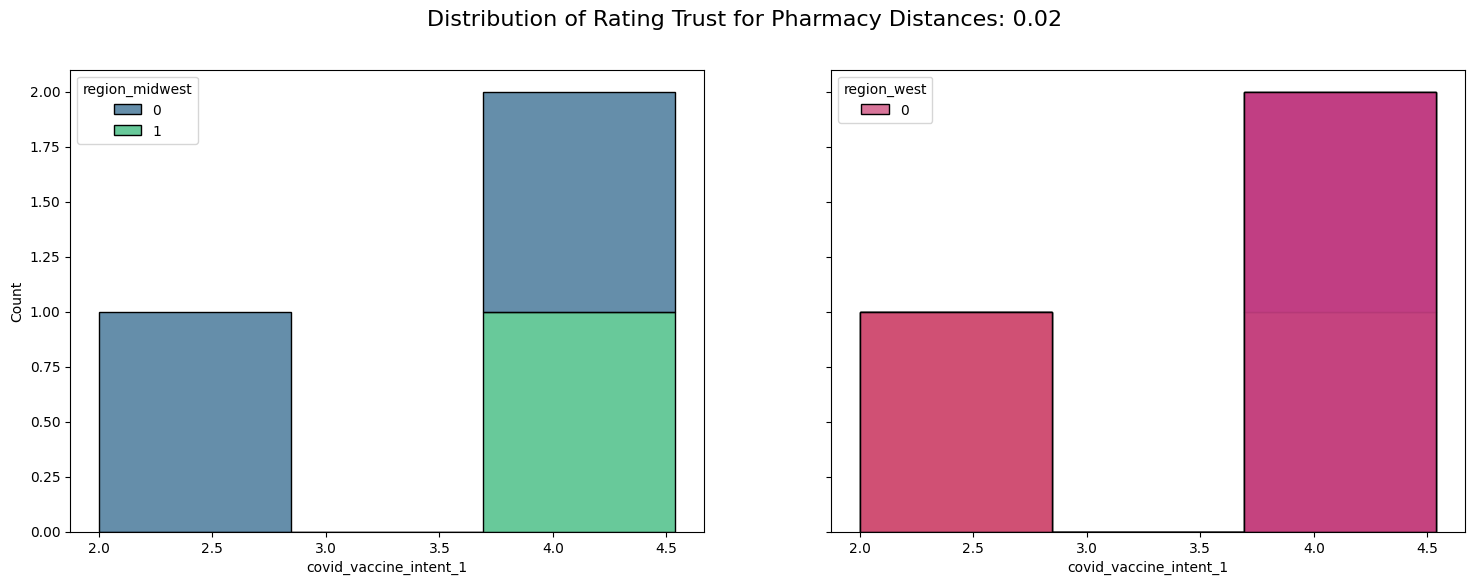

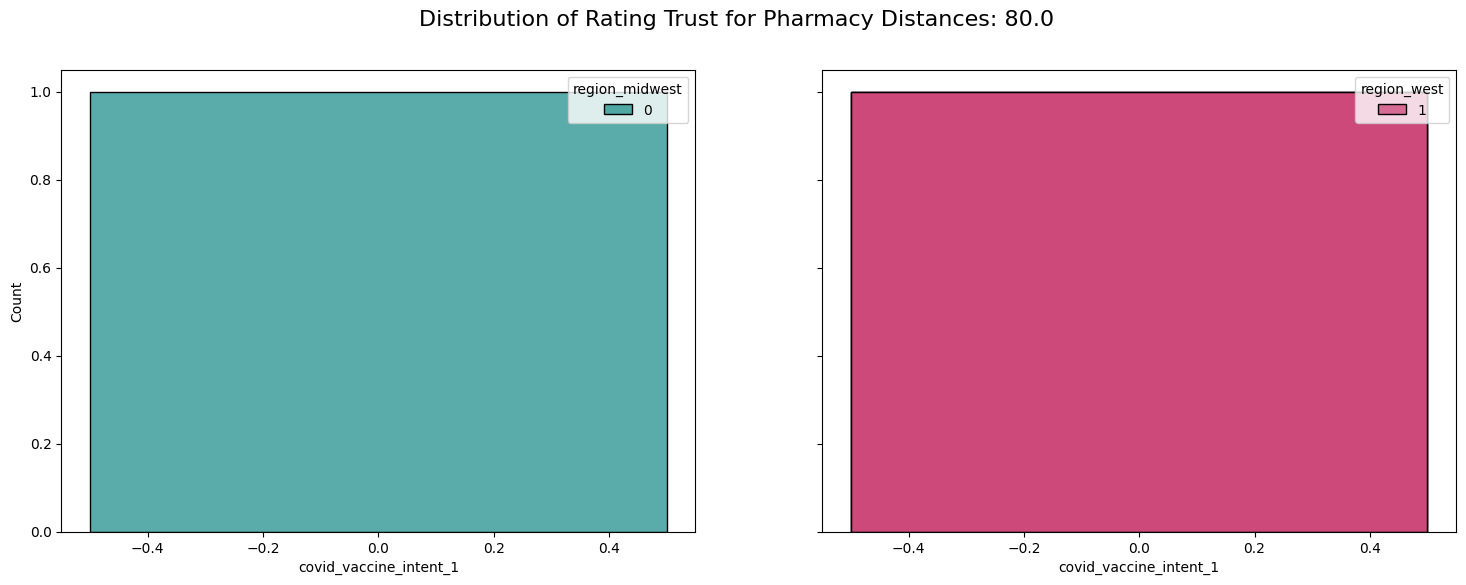

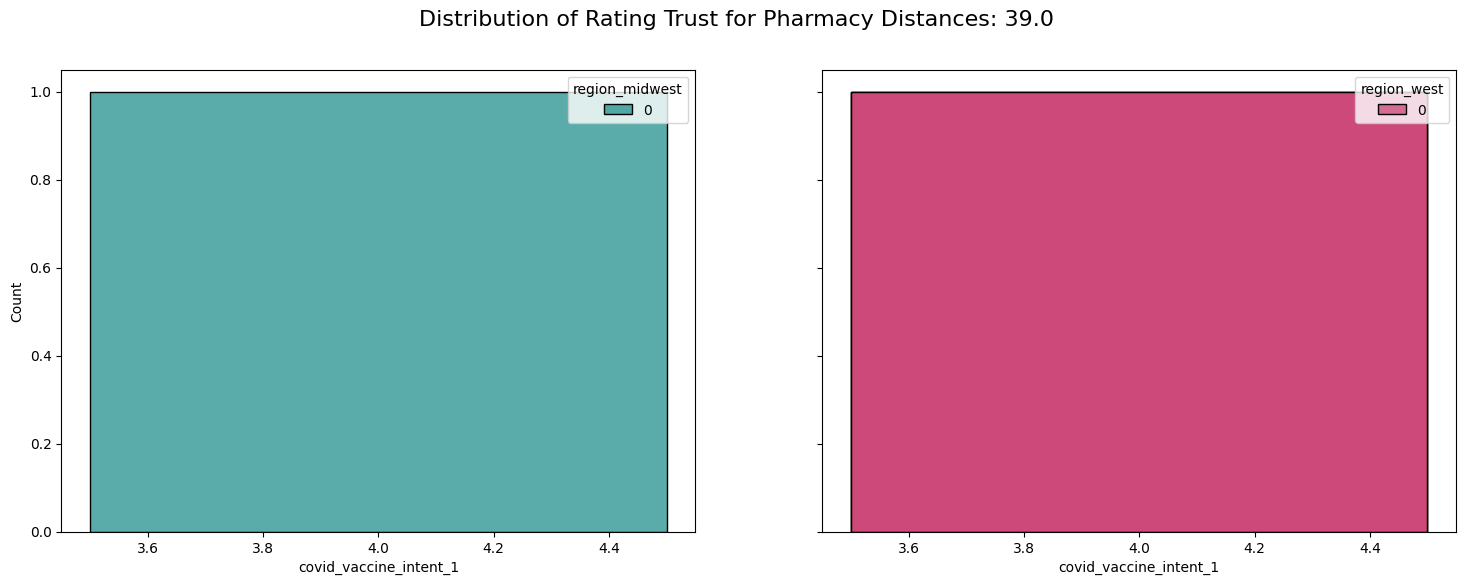

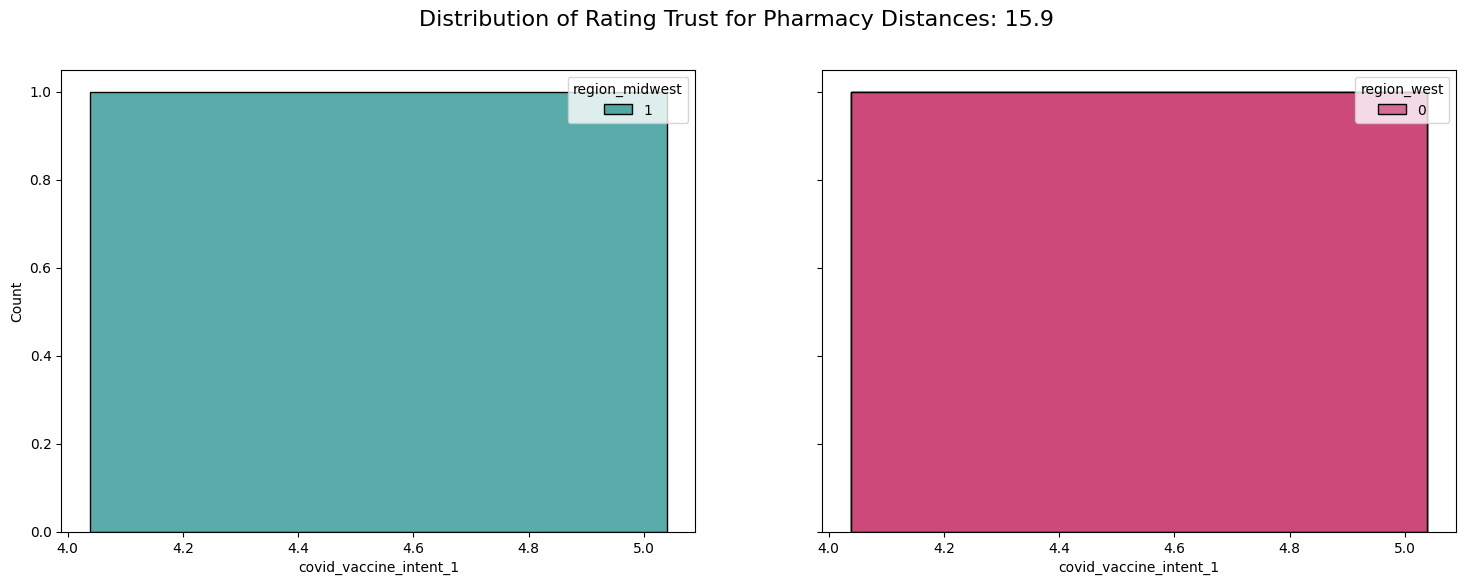

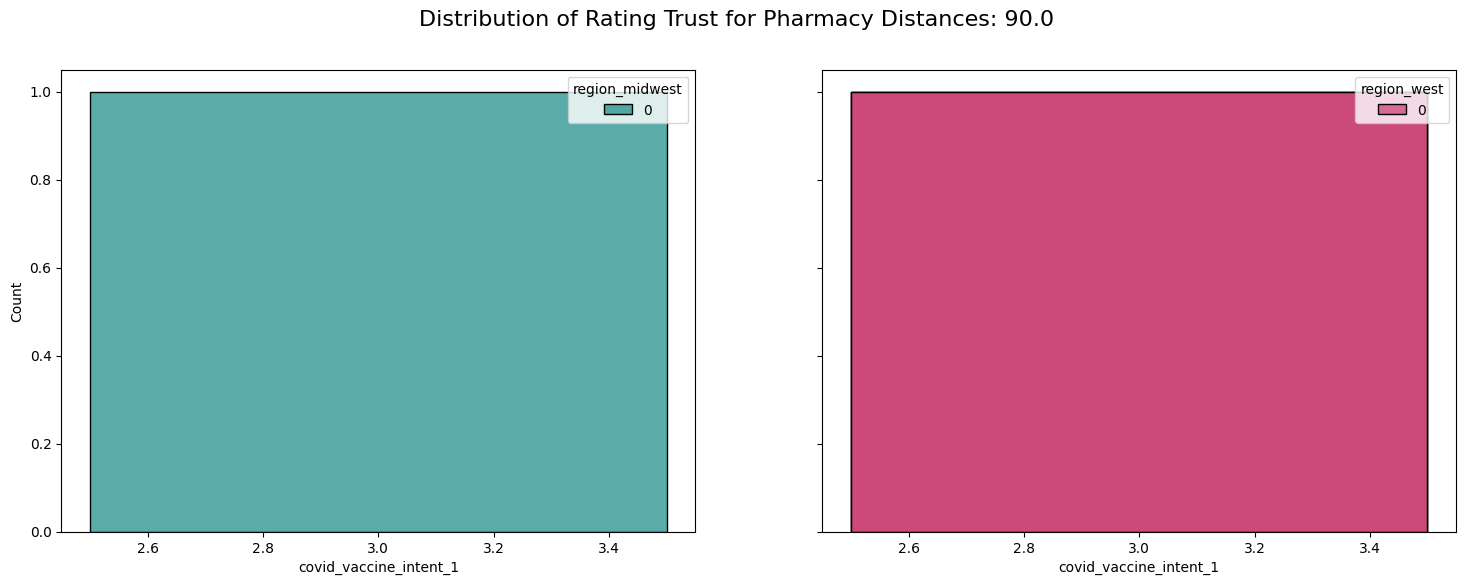

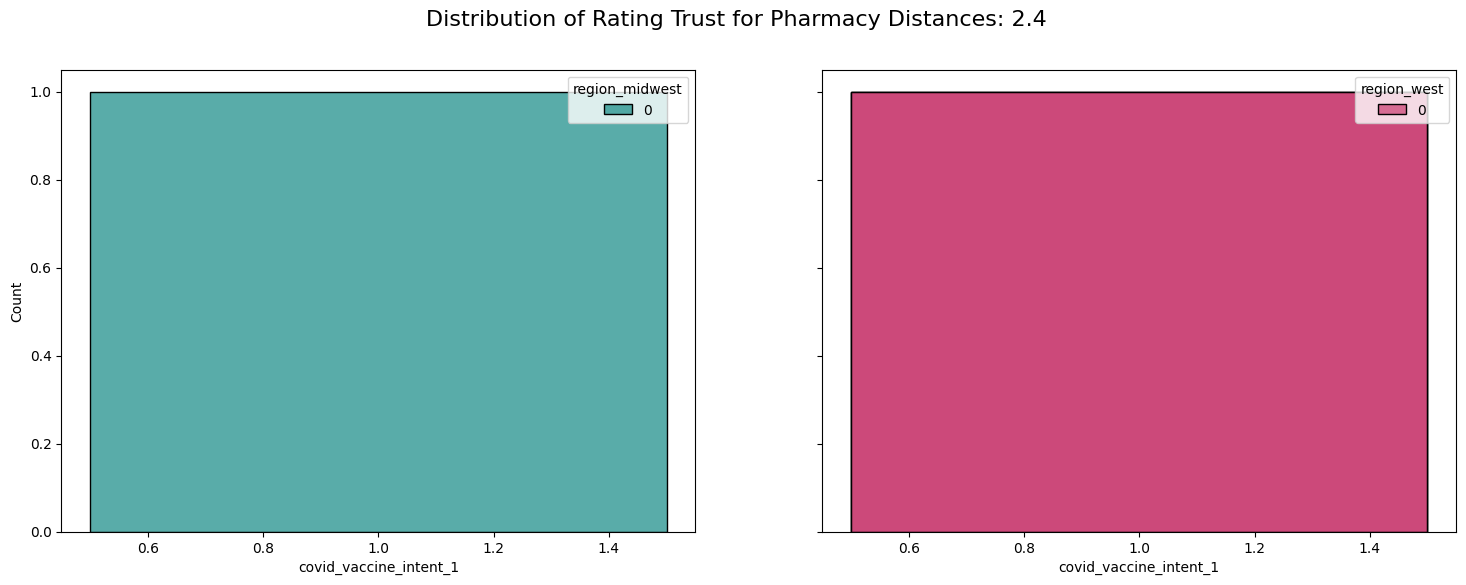

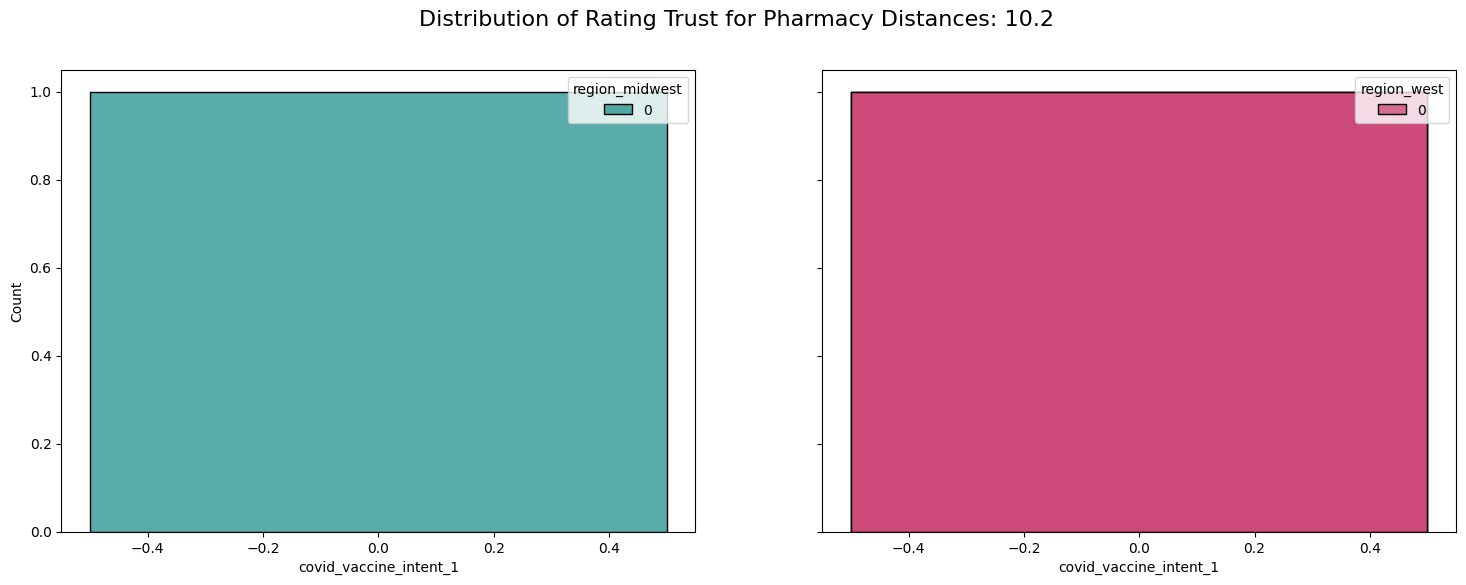

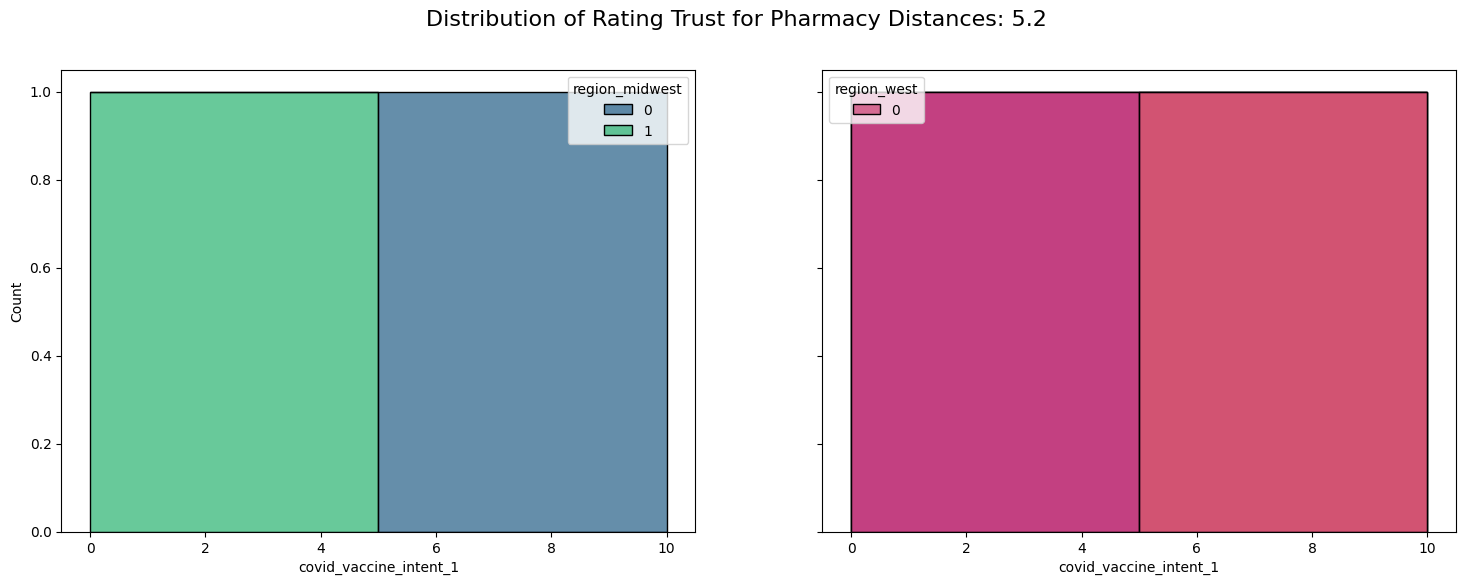

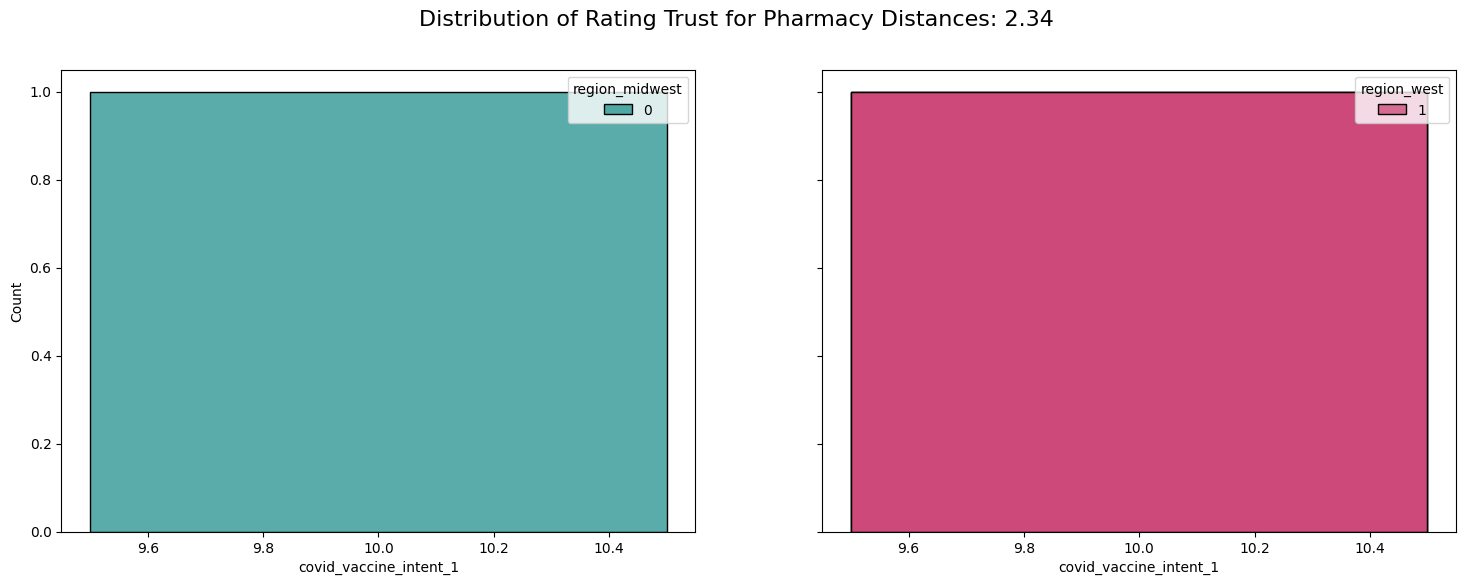

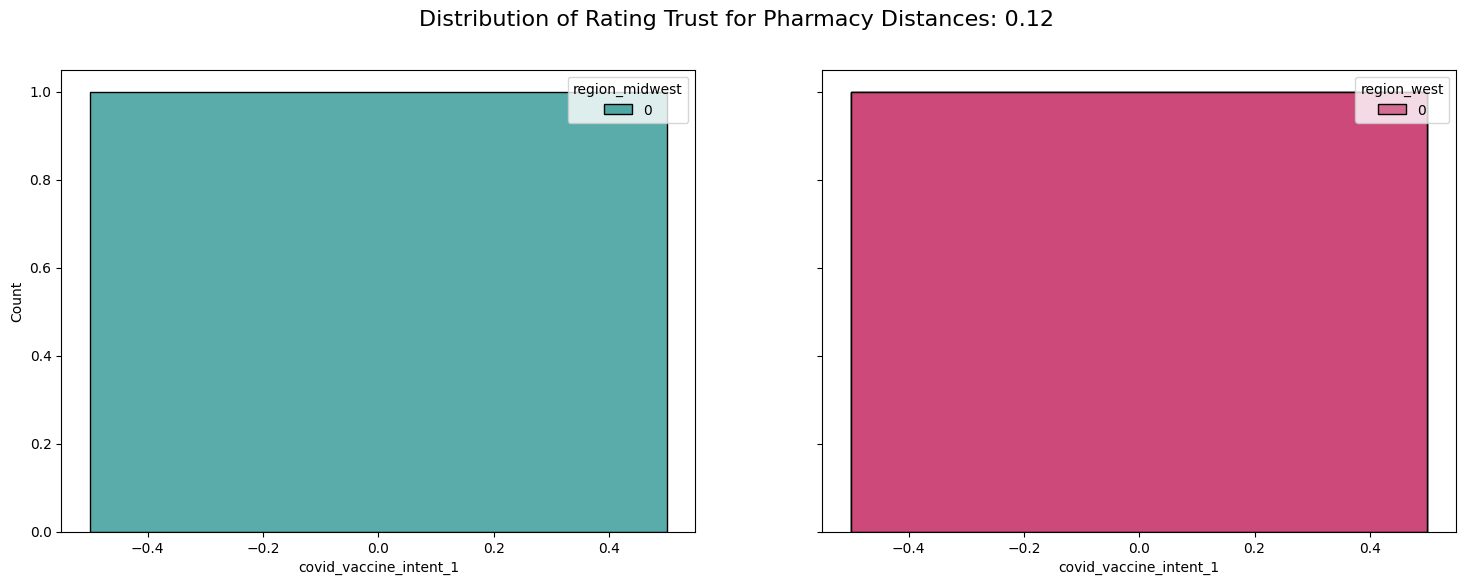

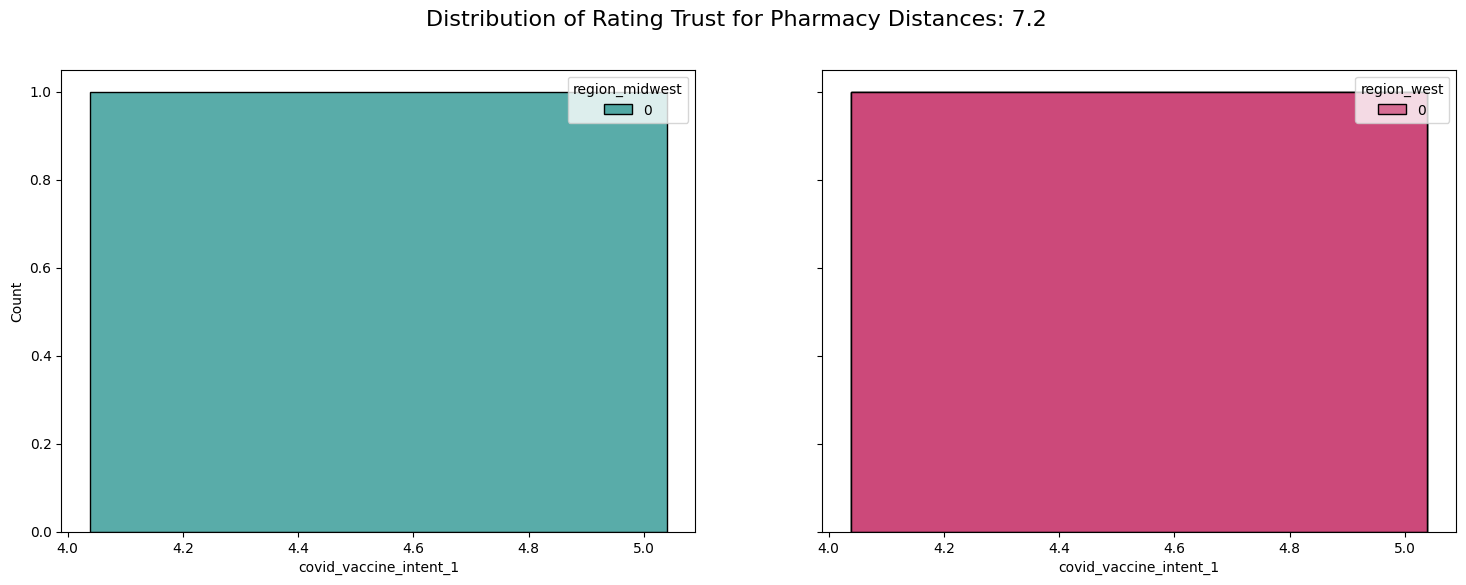

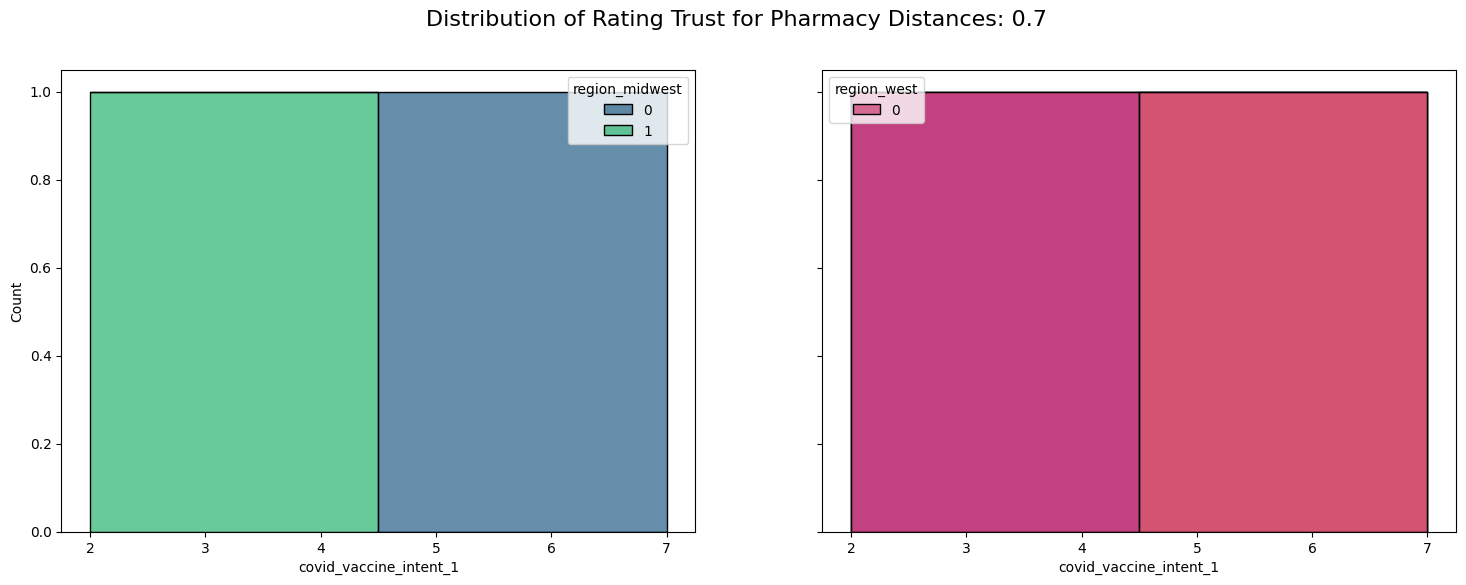

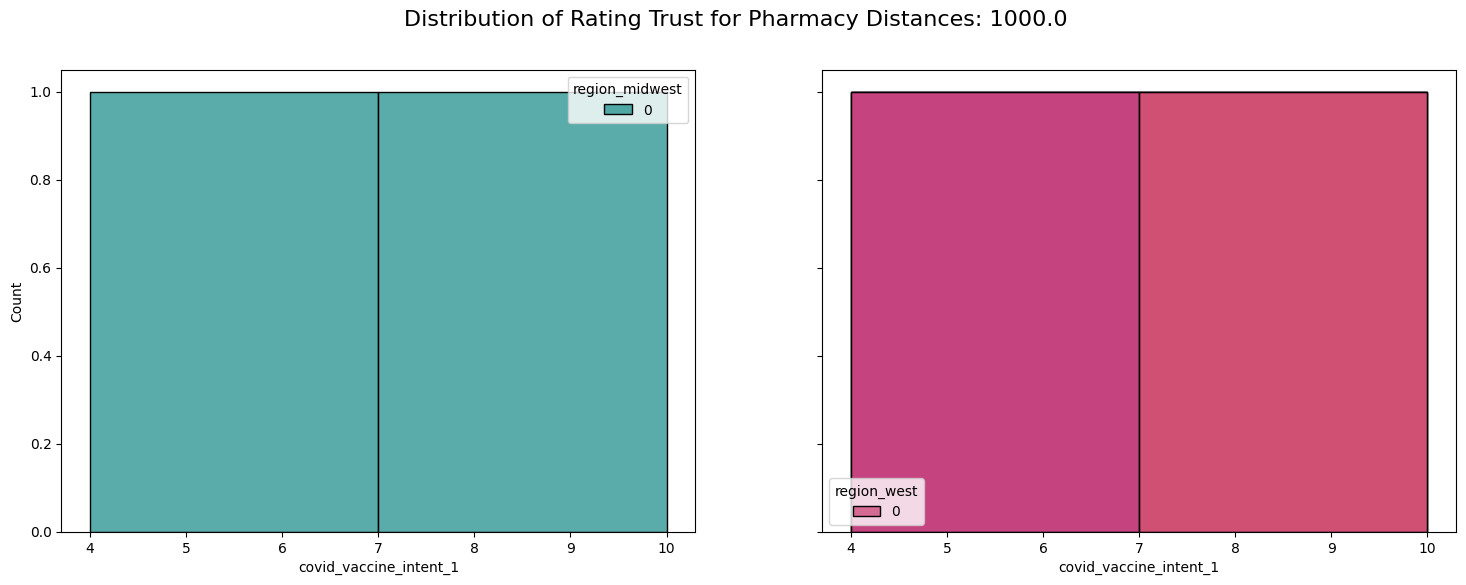

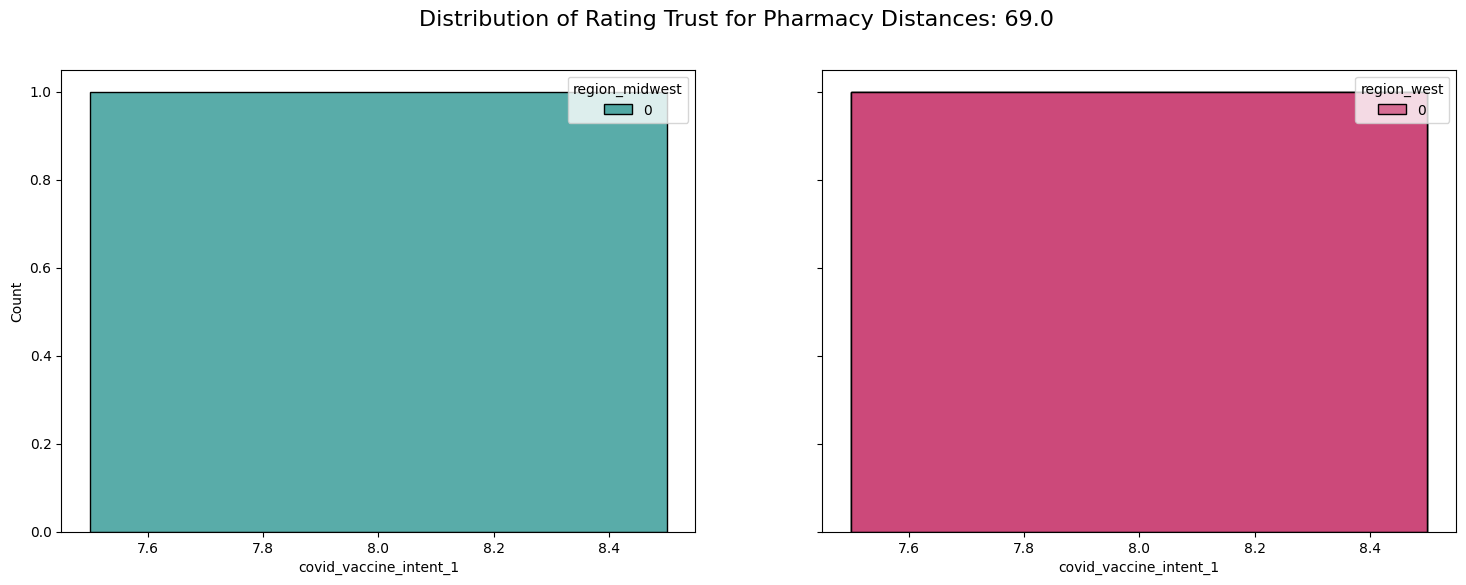

In [ ]:
unique_pharmacy_distances = question_1['pharmacy_distance'].unique()

for pharm_dis in unique_pharmacy_distances:
    filtered_df = question_1[question_1['pharmacy_distance'] == pharm_dis]

    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

    sns.histplot(data=filtered_df, x='covid_vaccine_intent_1', hue='region_midwest', multiple='stack', ax=axes[0], palette='viridis', legend=True)

    sns.histplot(data=filtered_df, x='covid_vaccine_intent_1', hue='region_northeast', multiple='stack', ax=axes[1], palette='plasma', legend=True)

    sns.histplot(data=filtered_df, x='covid_vaccine_intent_1', hue='region_south', multiple='stack', ax=axes[1], palette='plasma', legend=True)

    sns.histplot(data=filtered_df, x='covid_vaccine_intent_1', hue='region_west', multiple='stack', ax=axes[1], palette='plasma', legend=True)

    plt.suptitle(f'Distribution of Rating Trust for Pharmacy Distances: {pharm_dis}', fontsize=16)
plt.savefig('/content/drive/MyDrive/question1histogrampharmd.png')
plt.show()

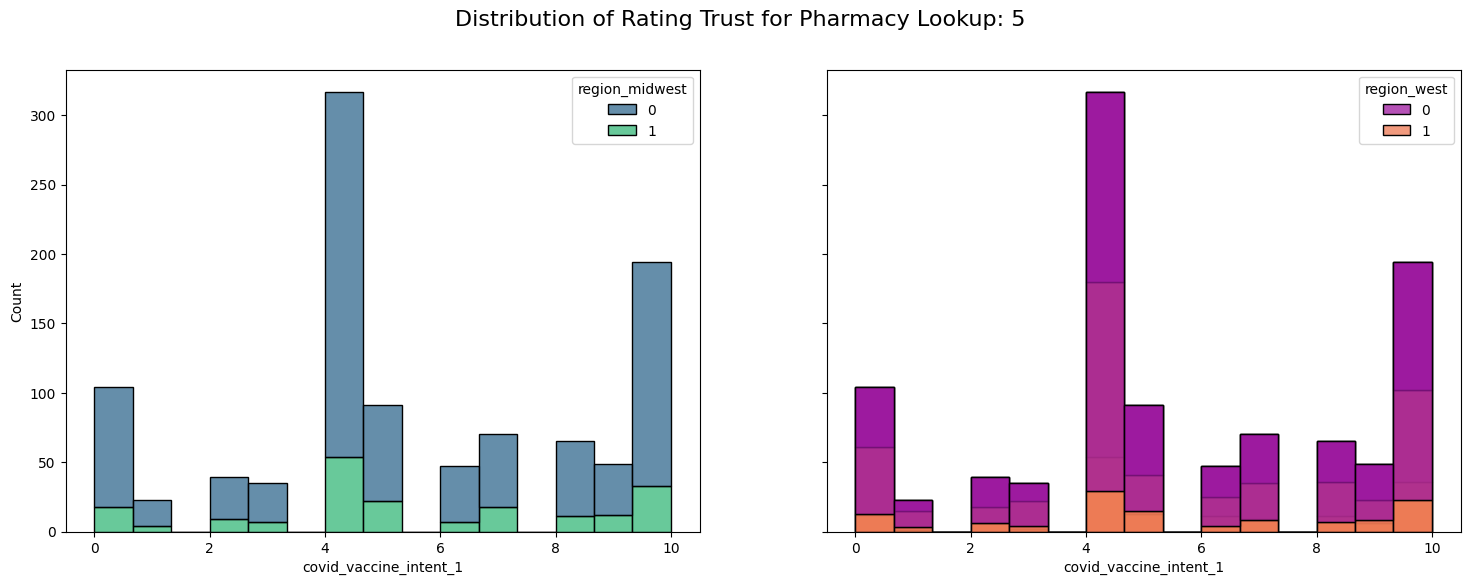

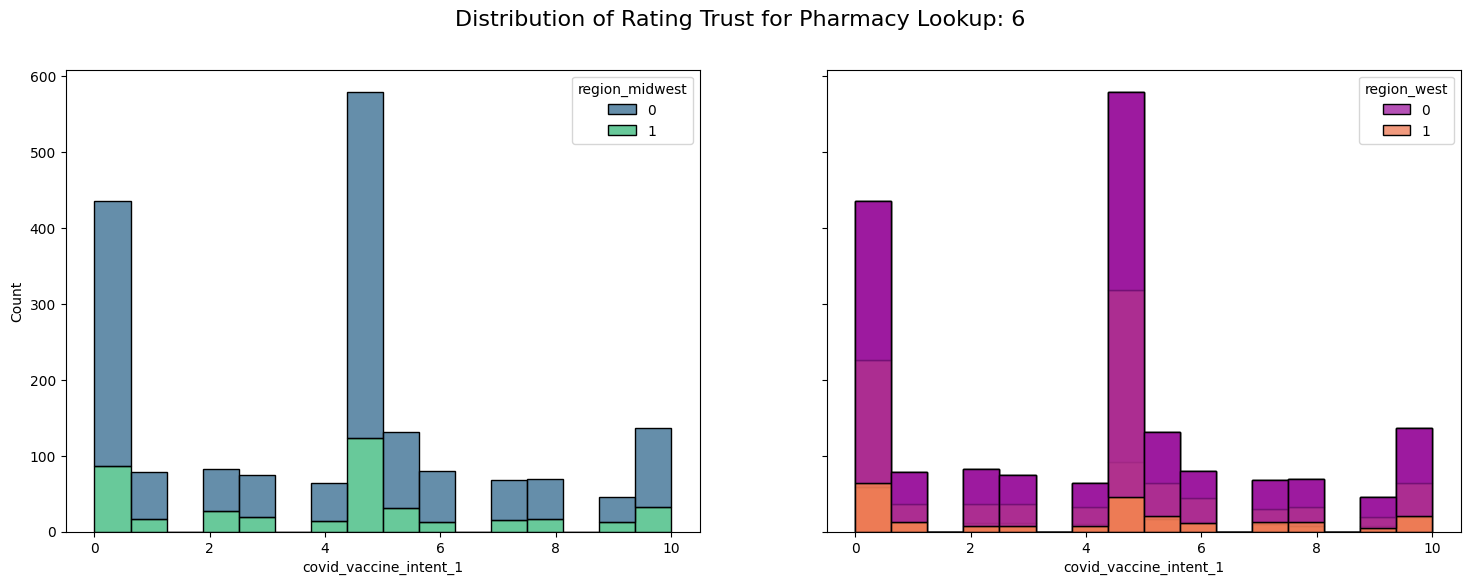

In [ ]:
unique_pharmacy_lookups = question_1['pharmacy_lookup'].unique()

for pharm_look in unique_pharmacy_lookups:
    filtered_df = question_1[question_1['pharmacy_lookup'] == pharm_look]

    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

    sns.histplot(data=filtered_df, x='covid_vaccine_intent_1', hue='region_midwest', multiple='stack', ax=axes[0], palette='viridis', legend=True)

    sns.histplot(data=filtered_df, x='covid_vaccine_intent_1', hue='region_northeast', multiple='stack', ax=axes[1], palette='plasma', legend=True)

    sns.histplot(data=filtered_df, x='covid_vaccine_intent_1', hue='region_south', multiple='stack', ax=axes[1], palette='plasma', legend=True)

    sns.histplot(data=filtered_df, x='covid_vaccine_intent_1', hue='region_west', multiple='stack', ax=axes[1], palette='plasma', legend=True)

    plt.suptitle(f'Distribution of Rating Trust for Pharmacy Lookup: {pharm_look}', fontsize=16)
plt.savefig('/content/drive/MyDrive/question1histo3.png')
plt.show()

In [ ]:
columns = ['pharmacy_lookup', 'pharmacy_distance', 'treatment_group', 'region_midwest', 'region_northeast', 'region_south', 'region_west']
describe_re = question_1.describe()
print(".describe returns a", type(describe_re))

.describe returns a <class 'pandas.core.frame.DataFrame'>


In [ ]:
question_1.groupby('covid_vaccine_intent_1')[columns].agg(['mean', 'std',
'min', 'max']).T.round(2)

covid_vaccine_intent_1  0.00000   1.00000   2.00000   3.00000   4.00000   \
pharmacy_lookup   mean      5.81      5.77      5.68      5.68      5.60   
                  std       0.39      0.42      0.47      0.47      0.49   
                  min       5.00      5.00      5.00      5.00      5.00   
                  max       6.00      6.00      6.00      6.00      6.00   
pharmacy_distance mean      4.42      8.40      4.47      5.88     14.08   
                  std       7.47     49.60      5.66     11.11     96.42   
                  min       0.00      0.00      0.00      0.00      0.00   
                  max     100.00    500.00     30.00     90.00   1000.00   
treatment_group   mean      3.31      3.32      2.80      3.36      3.36   
                  std       1.73      1.77      1.67      1.65      1.81   
                  min       1.00      1.00      1.00      1.00      1.00   
                  max       6.00      6.00      6.00      6.00      6.00   
region_midwest    mean      0.19      0.21      0.30      0.24      0.20   
                  std       0.40      0.41      0.46      0.43      0.40   
                  min       0.00      0.00      0.00      0.00      0.00   
                  max       1.00      1.00      1.00      1.00      1.00   
region_northeast  mean      0.13      0.13      0.14      0.12      0.21   
                  std       0.34      0.34      0.35      0.33      0.41   
                  min       0.00      0.00      0.00      0.00      0.00   
                  max       1.00      1.00      1.00      1.00      1.00   
region_south      mean      0.53      0.51      0.45      0.53      0.50   
                  std       0.50      0.50      0.50      0.50      0.50   
                  min       0.00      0.00      0.00      0.00      0.00   
                  max       1.00      1.00      1.00      1.00      1.00   
region_west       mean      0.14      0.15      0.11      0.11      0.09   
                  std       0.35      0.36      0.32      0.31      0.29   
                  min       0.00      0.00      0.00      0.00      0.00   
                  max       1.00      1.00      1.00      1.00      1.00   

covid_vaccine_intent_1  4.53899   5.00000   6.00000   7.00000   8.00000   \
pharmacy_lookup   mean      5.68      5.59      5.63      5.49      5.51   
                  std       0.47      0.49      0.48      0.50      0.50   
                  min       5.00      5.00      5.00      5.00      5.00   
                  max       6.00      6.00      6.00      6.00      6.00   
pharmacy_distance mean     11.30      4.25     14.58      9.18      8.04   
                  std     180.94      5.97     59.04     48.04     21.19   
                  min       0.00      0.00      0.00      0.00      0.00   
                  max    5280.00     50.00    500.00    555.00    200.00   
treatment_group   mean      3.25      3.14      3.33      3.21      3.16   
                  std       1.75      1.74      1.69      1.79      1.81   
                  min       1.00      1.00      1.00      1.00      1.00   
                  max       6.00      6.00      6.00      6.00      6.00   
region_midwest    mean      0.20      0.24      0.16      0.24      0.20   
                  std       0.40      0.43      0.37      0.43      0.40   
                  min       0.00      0.00      0.00      0.00      0.00   
                  max       1.00      1.00      1.00      1.00      1.00   
region_northeast  mean      0.16      0.13      0.18      0.14      0.14   
                  std       0.36      0.34      0.39      0.35      0.35   
                  min       0.00      0.00      0.00      0.00      0.00   
                  max       1.00      1.00      1.00      1.00      1.00   
region_south      mean      0.56      0.47      0.54      0.47      0.51   
                  std       0.50      0.50      0.50      0.50      0.50   
                  min       0.00      0.00     

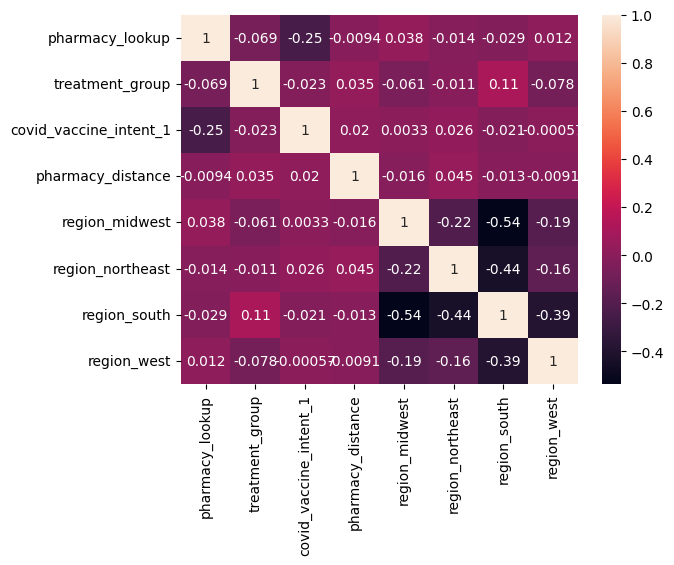

In [ ]:
correlations = question_1.corr()
_ = sns.heatmap(correlations, annot=True)
plt.savefig('/content/drive/MyDrive/question1correlation.png')
plt.show()

# Question 2 Data Visualization!

In [ ]:
question_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   video_length      2893 non-null   int64
 1   video_race        2893 non-null   int64
 2   treatment_group   2893 non-null   int64
 3   health_insurance  2893 non-null   int64
 4   income            2893 non-null   int64
 5   rating_trust      2893 non-null   int64
dtypes: int64(6)
memory usage: 135.7 KB


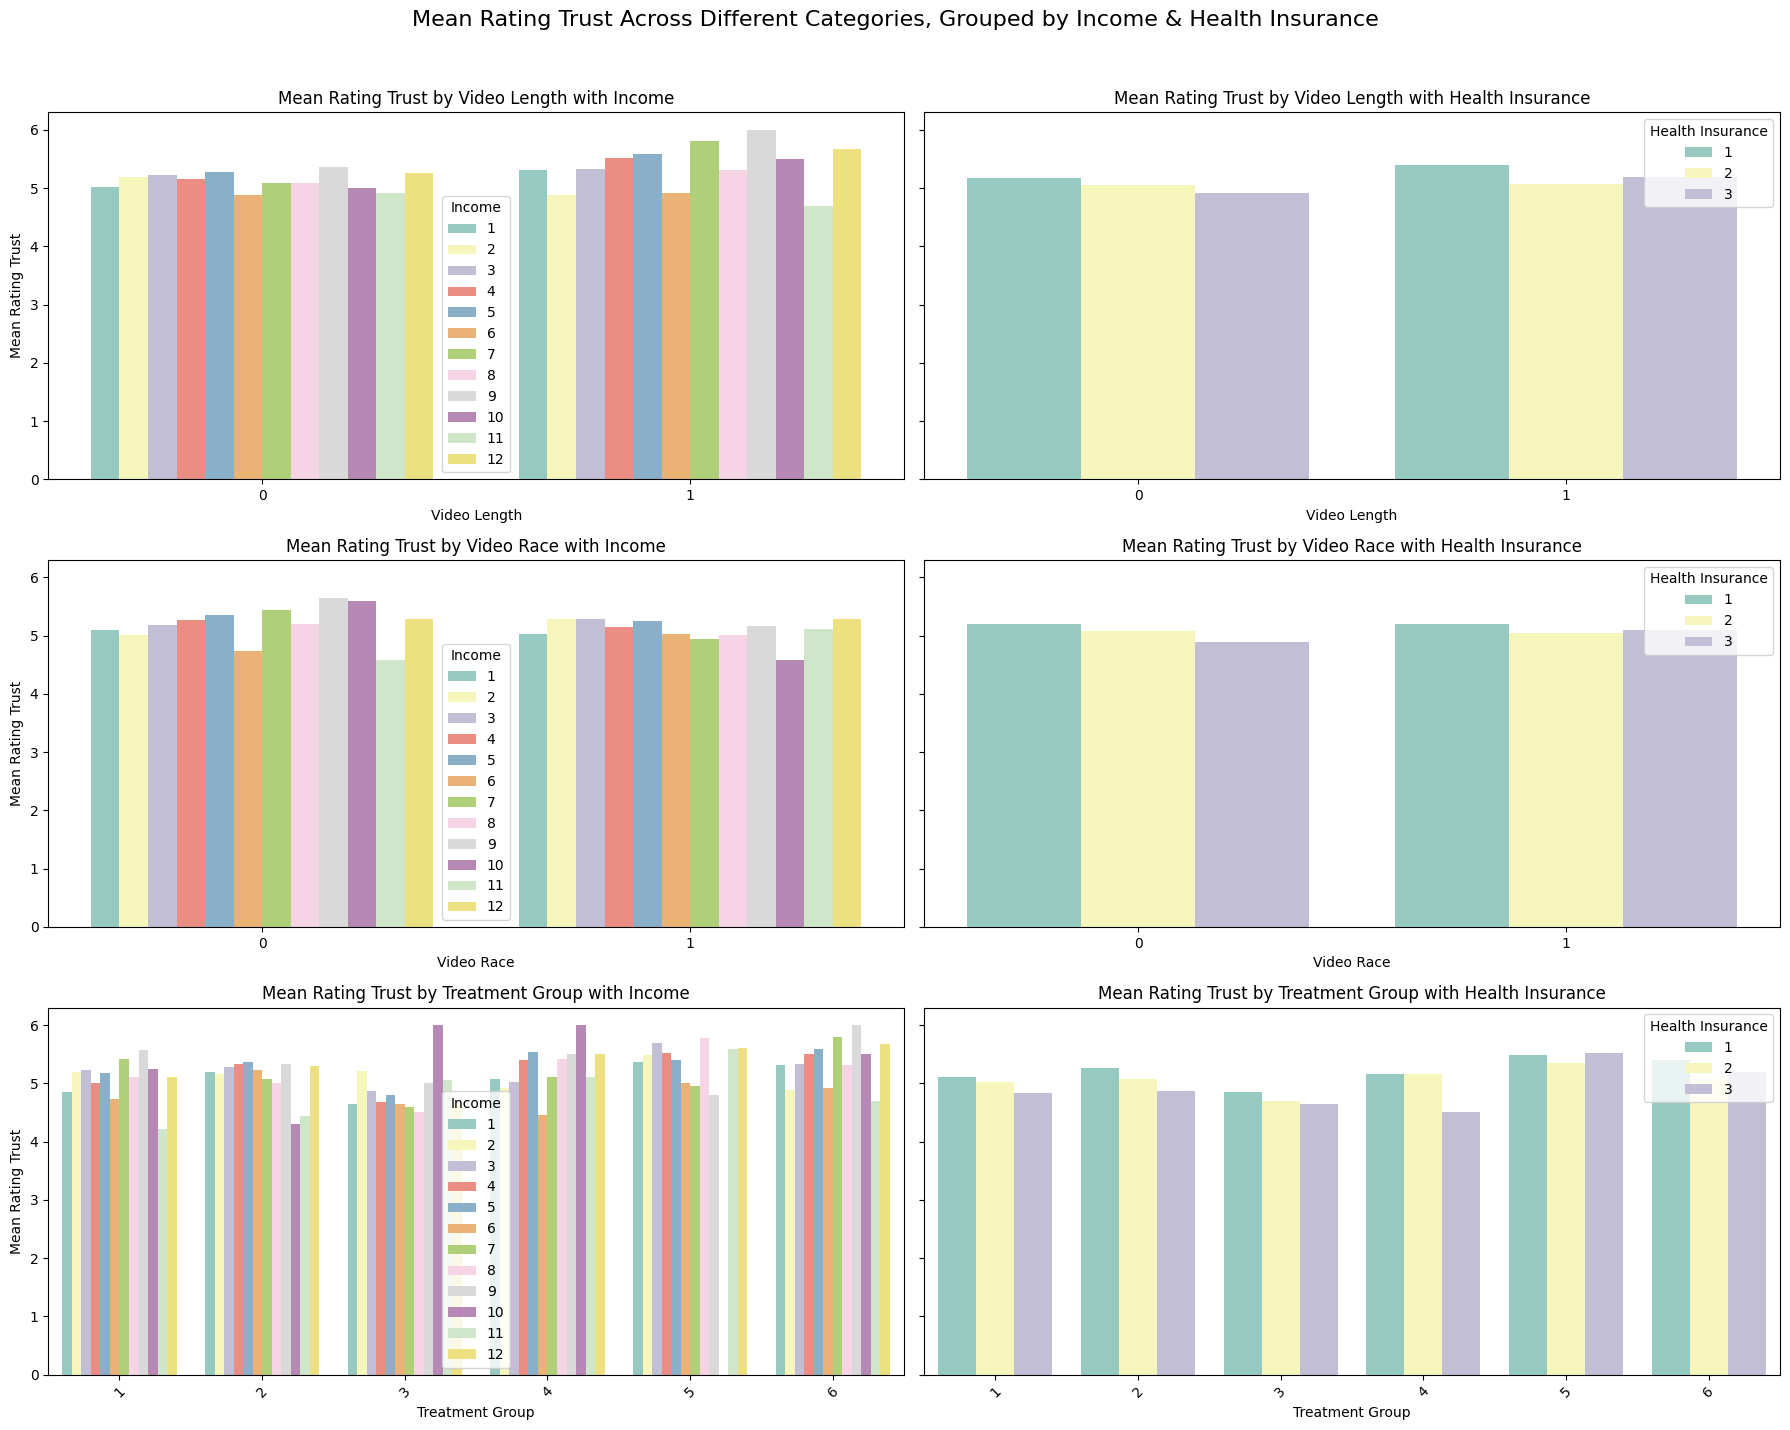

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

main_categorical_vars = ['video_length', 'video_race', 'treatment_group']
hue_categorizing_vars = ['income', 'health_insurance']
target_col = 'rating_trust'

fig, axes = plt.subplots(len(main_categorical_vars), len(hue_categorizing_vars),
                         figsize=(18, 5 * len(main_categorical_vars)), sharey=True)

if len(main_categorical_vars) == 1:
    axes = [axes]
elif len(hue_categorizing_vars) == 1:
    axes = [[ax] for ax in axes]


for i, main_col in enumerate(main_categorical_vars):
    for j, hue_col in enumerate(hue_categorizing_vars):
        ax = axes[i][j]

        mean_trust_grouped = question_2.groupby([main_col, hue_col])[target_col].mean().reset_index()

        sns.barplot(x=main_col, y=target_col, hue=hue_col, data=mean_trust_grouped, ax=ax, palette='Set3')

        ax.set_title(f'Mean {target_col.replace("_", " ").title()} by {main_col.replace("_", " ").title()} with {hue_col.replace("_", " ").title()}')
        ax.set_xlabel(main_col.replace("_", " ").title())
        ax.set_ylabel(f'Mean {target_col.replace("_", " ").title()}' if j == 0 else '')
        ax.legend(title=hue_col.replace("_", " ").title())

        if question_2[main_col].nunique() > 5:
            ax.tick_params(axis='x', rotation=45)

plt.suptitle(f"Mean {target_col.replace("_", " ").title()} Across Different Categories, Grouped by Income & Health Insurance", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])

plt.savefig('/content/drive/MyDrive/question_2bar.png')
plt.show()

In [ ]:
question_2.describe()

video_length   video_race  treatment_group  health_insurance  \
count   2893.000000  2893.000000      2893.000000       2893.000000   
mean       0.141721     0.501901         3.221915          1.419634   
std        0.348824     0.500083         1.733201          0.549287   
min        0.000000     0.000000         1.000000          1.000000   
25%        0.000000     0.000000         2.000000          1.000000   
50%        0.000000     1.000000         3.000000          1.000000   
75%        0.000000     1.000000         5.000000          2.000000   
max        1.000000     1.000000         6.000000          3.000000   

            income  rating_trust  
count  2893.000000   2893.000000  
mean      4.120636      5.145524  
std       2.744219      1.517274  
min       1.000000      1.000000  
25%       2.000000      5.000000  
50%       3.000000      5.000000  
75%       6.000000      6.000000  
max      12.000000      7.000000

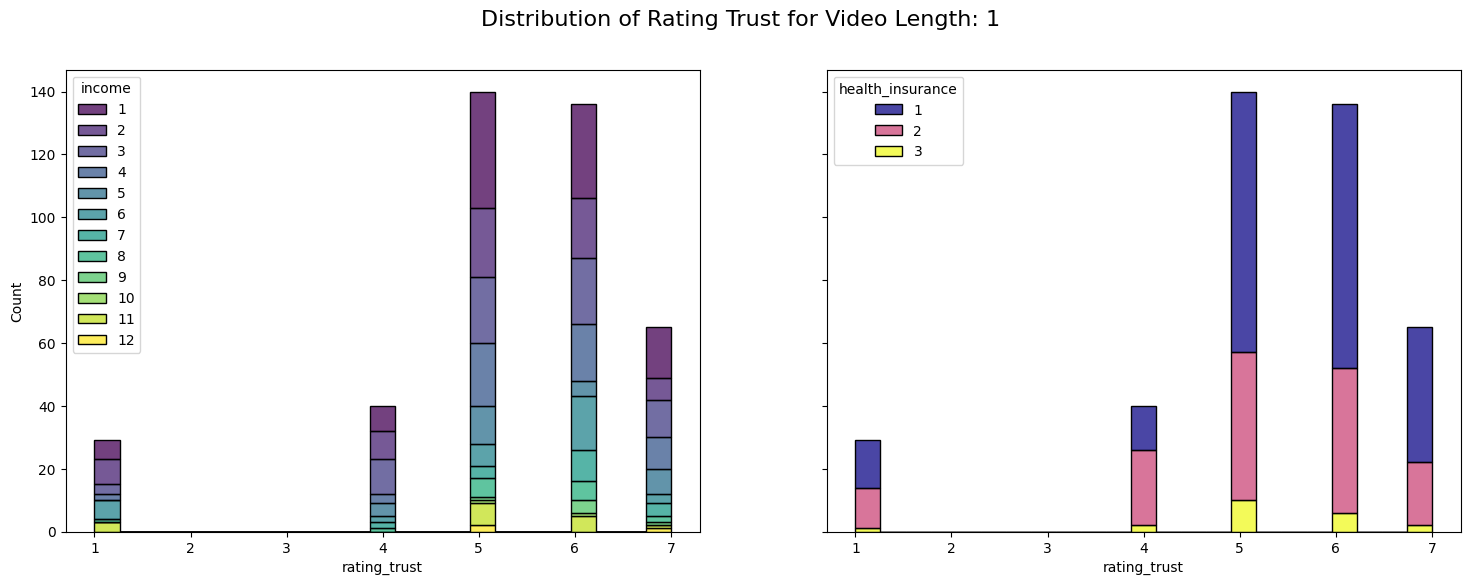

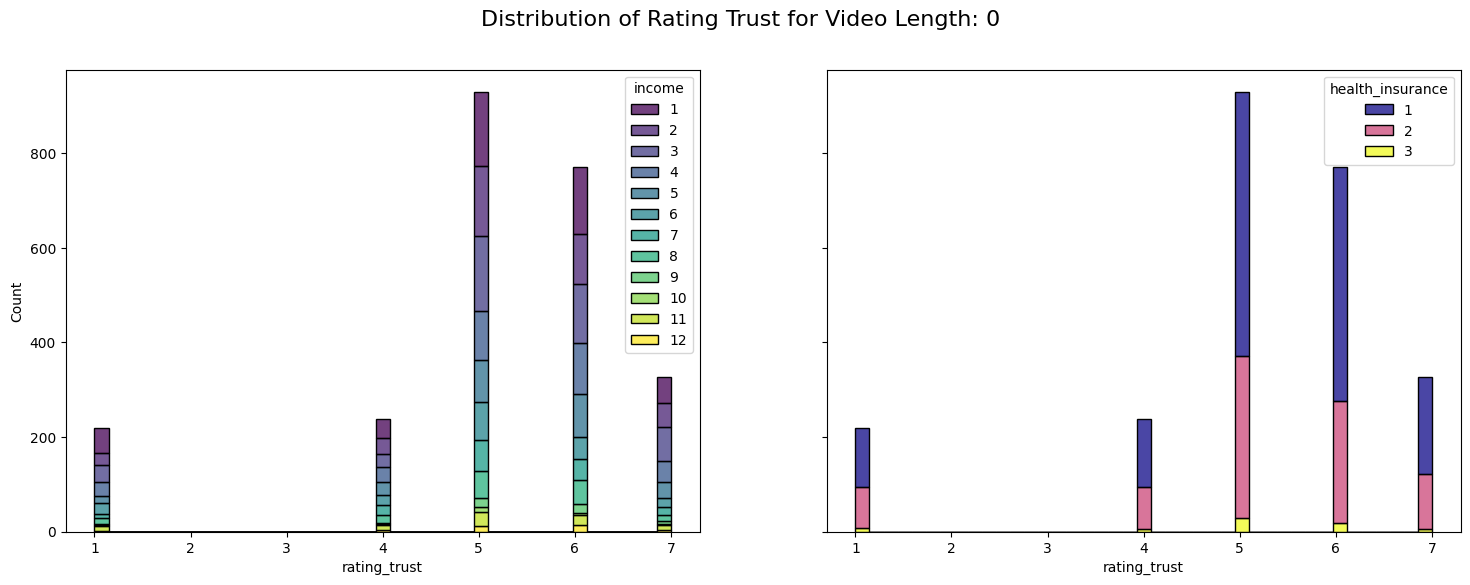

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_video_lengths = question_2['video_length'].unique()

for video_len in unique_video_lengths:
    filtered_df = question_2[question_2['video_length'] == video_len]

    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

    sns.histplot(data=filtered_df, x='rating_trust', hue='income', multiple='stack', ax=axes[0], palette='viridis', legend=True)

    sns.histplot(data=filtered_df, x='rating_trust', hue='health_insurance', multiple='stack', ax=axes[1], palette='plasma', legend=True)


    plt.suptitle(f'Distribution of Rating Trust for Video Length: {video_len}', fontsize=16)

plt.savefig('/content/drive/MyDrive/question2_histogram1.png')
plt.show()

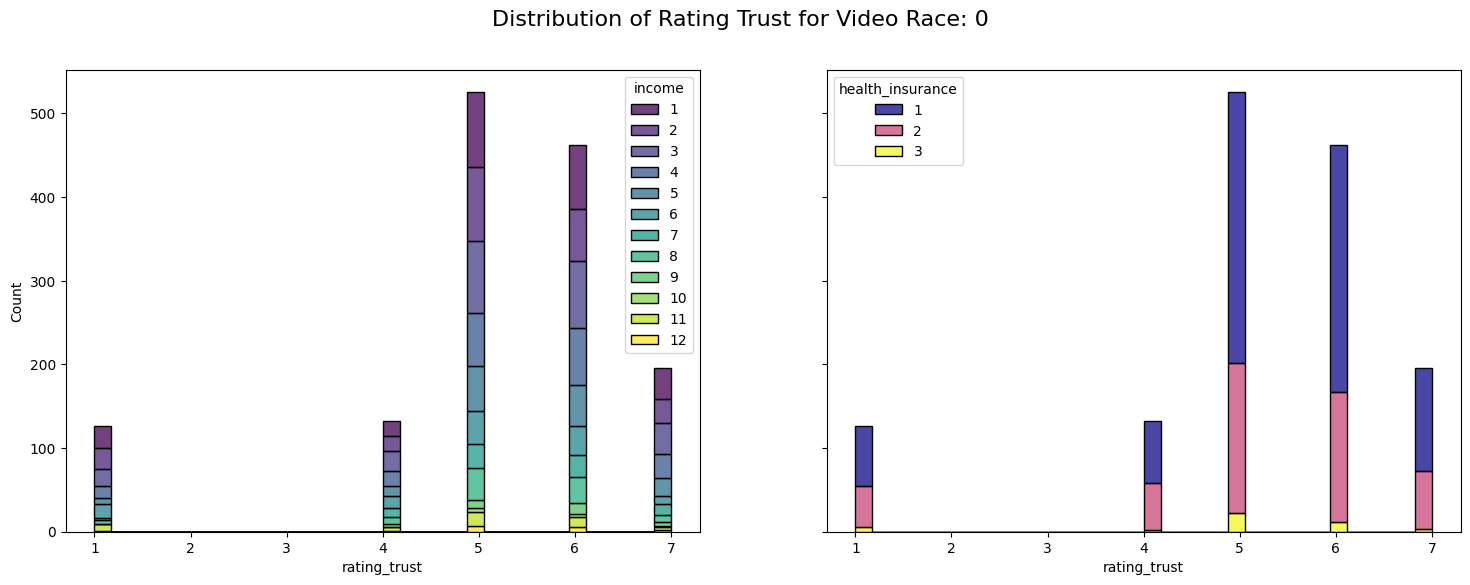

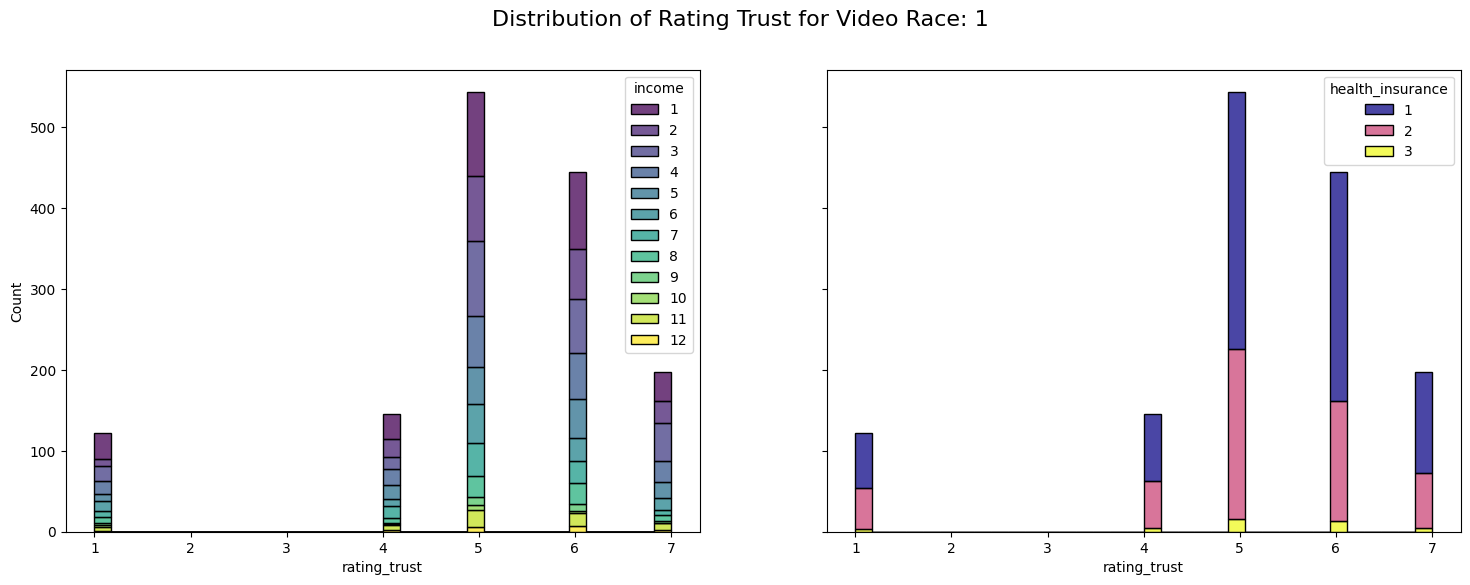

In [ ]:
unique_video_races = question_2['video_race'].unique()

for video_rac in unique_video_races:
    filtered_df = question_2[question_2['video_race'] == video_rac]

    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

    sns.histplot(data=filtered_df, x='rating_trust', hue='income', multiple='stack', ax=axes[0], palette='viridis', legend=True)

    sns.histplot(data=filtered_df, x='rating_trust', hue='health_insurance', multiple='stack', ax=axes[1], palette='plasma', legend=True)

    plt.suptitle(f'Distribution of Rating Trust for Video Race: {video_rac}', fontsize=16)
plt.savefig('/content/drive/MyDrive/question2histogram2.png')
plt.show()

/tmp/ipython-input-3377525680.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(title='Income')
/tmp/ipython-input-3377525680.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(title='Health Insurance')
/tmp/ipython-input-3377525680.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(title='Income')
/tmp/ipython-input-3377525680.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(title='Health Insurance')
/tmp/ipython-input-3

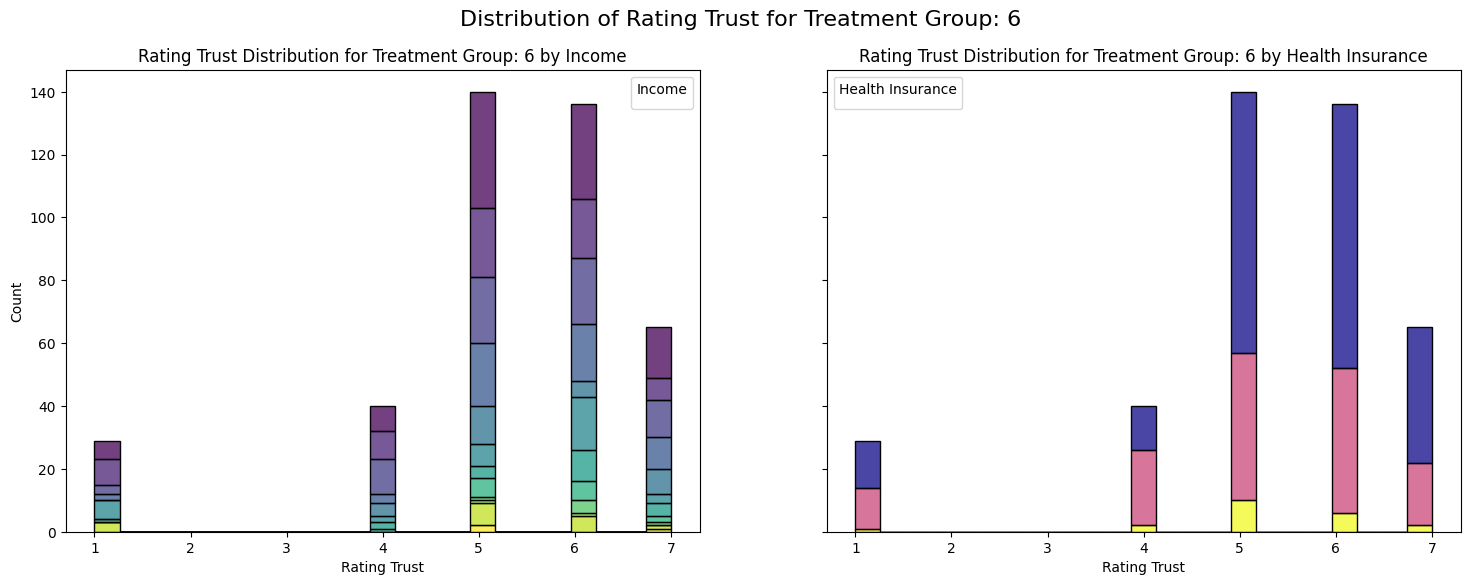

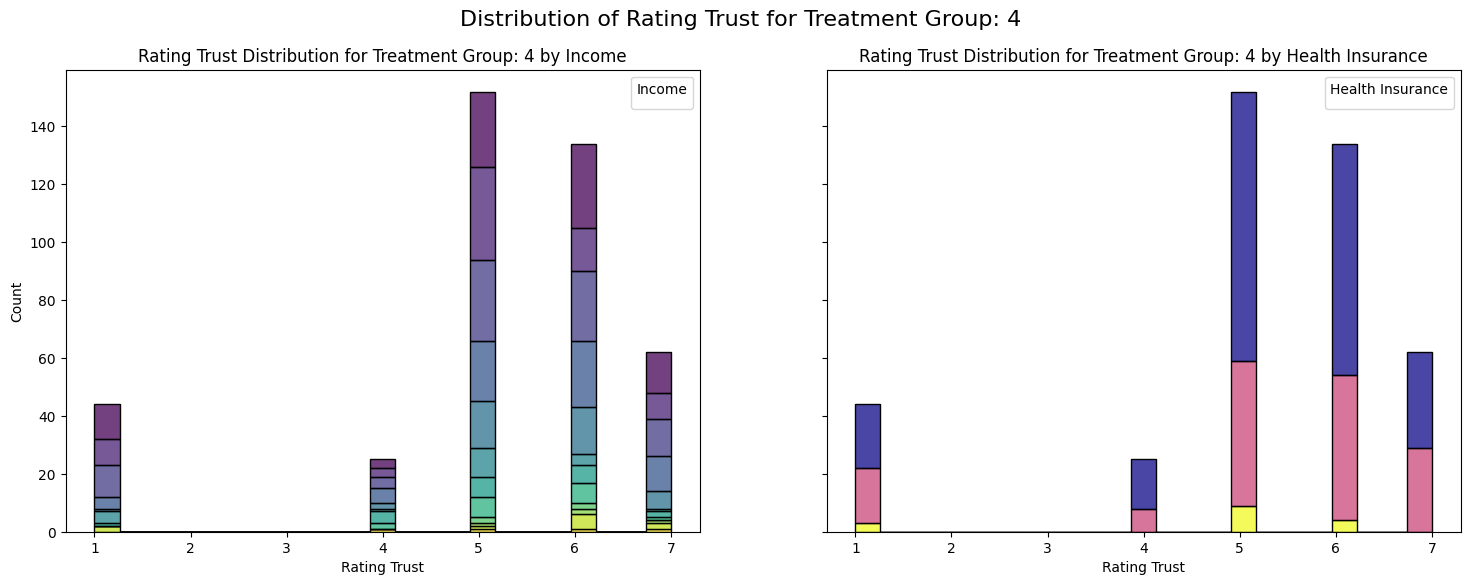

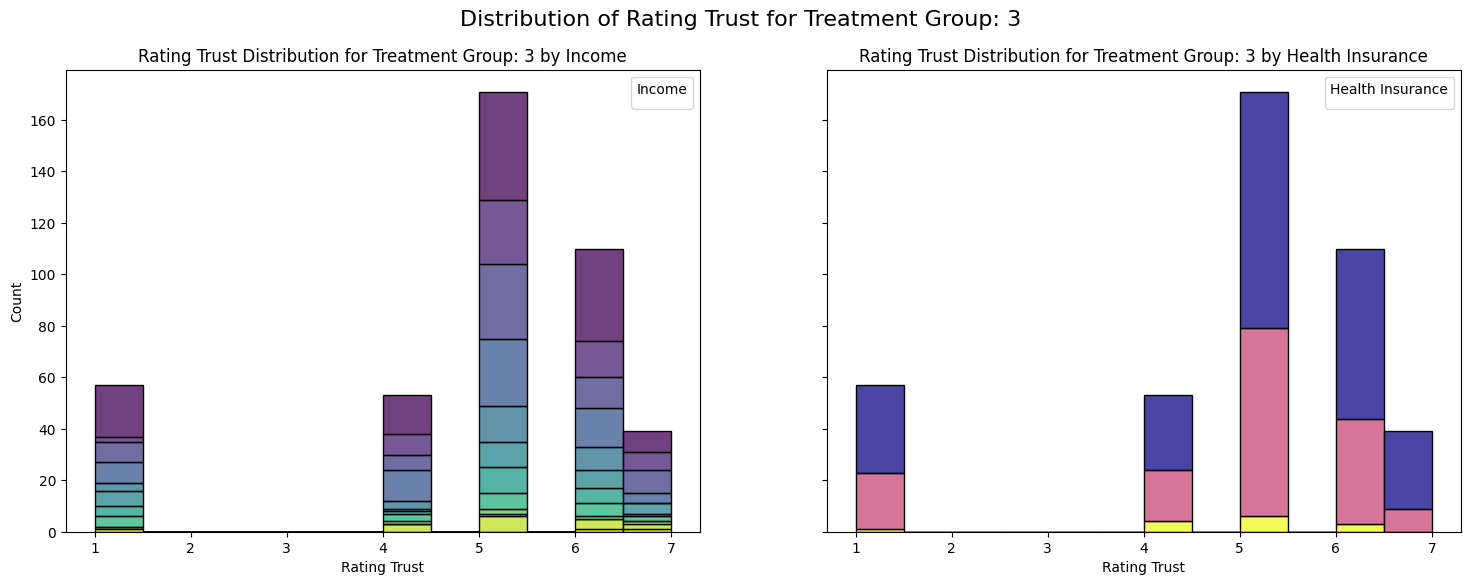

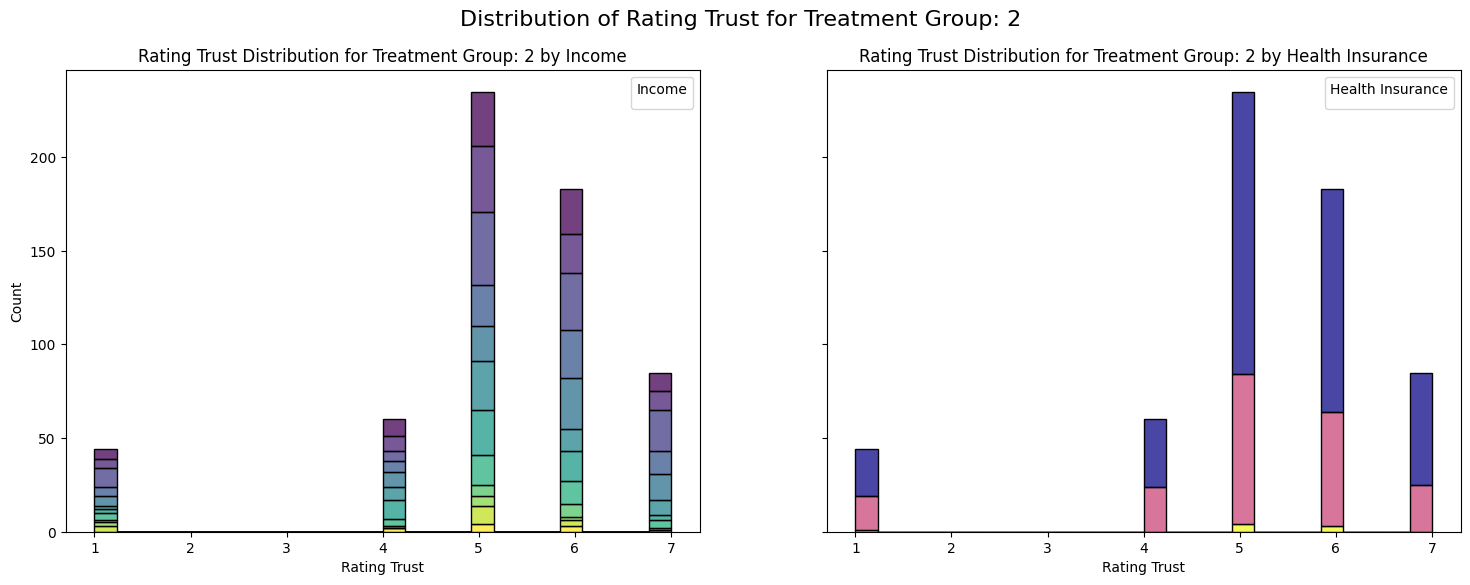

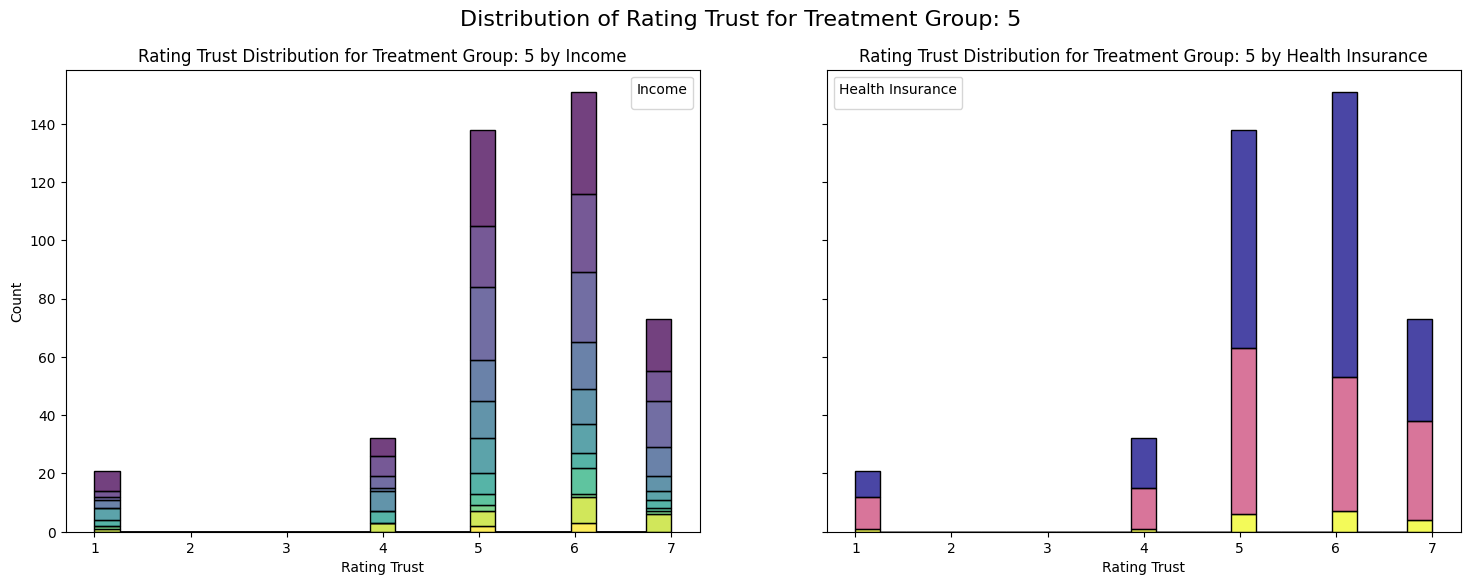

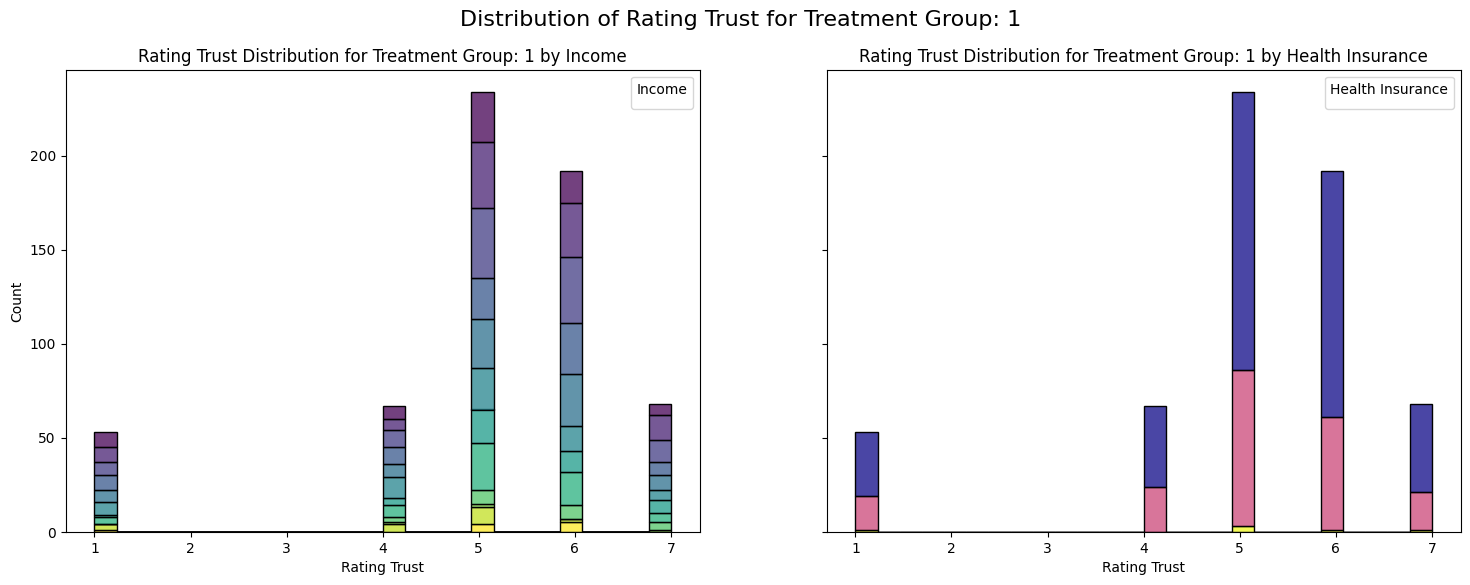

In [ ]:
unique_treatment_group = question_2['treatment_group'].unique()

for treat_g in unique_treatment_group:
    filtered_df = question_2[question_2['treatment_group'] == treat_g]

    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

    sns.histplot(data=filtered_df, x='rating_trust', hue='income', multiple='stack', ax=axes[0], palette='viridis', legend=True)
    axes[0].set_title(f'Rating Trust Distribution for Treatment Group: {treat_g} by Income')
    axes[0].set_xlabel('Rating Trust')
    axes[0].set_ylabel('Count')
    axes[0].legend(title='Income')


    sns.histplot(data=filtered_df, x='rating_trust', hue='health_insurance', multiple='stack', ax=axes[1], palette='plasma', legend=True)
    axes[1].set_title(f'Rating Trust Distribution for Treatment Group: {treat_g} by Health Insurance')
    axes[1].set_xlabel('Rating Trust')
    axes[1].set_ylabel('Count')
    axes[1].legend(title='Health Insurance')

    plt.suptitle(f'Distribution of Rating Trust for Treatment Group: {treat_g}', fontsize=16)
plt.savefig('/content/drive/MyDrive/question2histogram3.png')
plt.show()

Note: The system wants me to change varibales "income" and "health_insurance" into strings instead of integers in hopes of aiding this legend error. I don't know if that would affect th effectiveness of my dataset so it will remain as is. The histograms and bar charts look fine regardless!

In [ ]:
columns = ['video_length', 'video_race', 'treatment_group', 'health_insurance', 'income', 'rating_trust']

In [ ]:
describe_returns = question_2.describe()
print(".describe returns a", type(describe_returns))

.describe returns a <class 'pandas.core.frame.DataFrame'>


In [ ]:
question_2.groupby('rating_trust')[columns].agg(['mean', 'std',
'min', 'max']).T.round(2)

rating_trust               1      4      5      6      7
video_length     mean   0.12   0.14   0.13   0.15   0.17
                 std    0.32   0.35   0.34   0.36   0.37
                 min    0.00   0.00   0.00   0.00   0.00
                 max    1.00   1.00   1.00   1.00   1.00
video_race       mean   0.49   0.52   0.51   0.49   0.50
                 std    0.50   0.50   0.50   0.50   0.50
                 min    0.00   0.00   0.00   0.00   0.00
                 max    1.00   1.00   1.00   1.00   1.00
treatment_group  mean   3.09   3.05   3.14   3.31   3.46
                 std    1.61   1.74   1.71   1.77   1.76
                 min    1.00   1.00   1.00   1.00   1.00
                 max    6.00   6.00   6.00   6.00   6.00
health_insurance mean   1.47   1.46   1.44   1.39   1.39
                 std    0.56   0.55   0.56   0.54   0.52
                 min    1.00   1.00   1.00   1.00   1.00
                 max    3.00   3.00   3.00   3.00   3.00
income           mean   4.01   4.27   4.16   4.16   3.90
                 std    2.86   2.74   2.78   2.75   2.57
                 min    1.00   1.00   1.00   1.00   1.00
                 max   12.00  12.00  12.00  12.00  12.00
rating_trust     mean   1.00   4.00   5.00   6.00   7.00
                 std    0.00   0.00   0.00   0.00   0.00
                 min    1.00   4.00   5.00   6.00   7.00
                 max    1.00   4.00   5.00   6.00   7.00

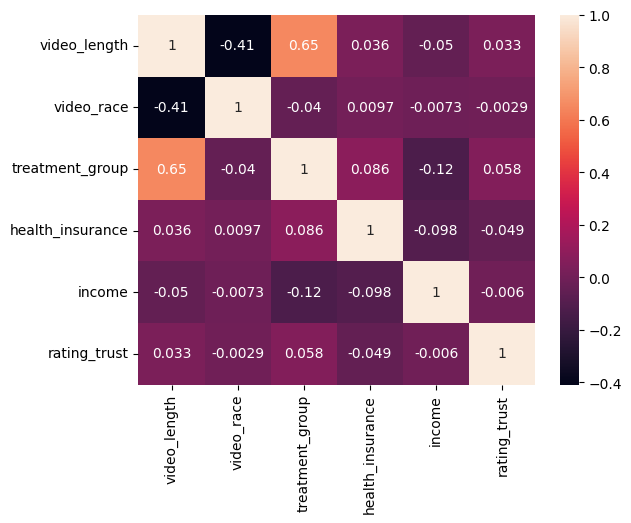

In [ ]:
correlations = question_2.corr()
_ = sns.heatmap(correlations, annot=True)
plt.savefig('/content/drive/MyDrive/my_colab_graph.png')
plt.show()

# TIME FOR MODELING

# Linear Regression for Question 1 + 2
(not used but created for comparison and making sure the correct model is used)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler

# scaling the data of question_1
scaler = StandardScaler()
X = question_1[['pharmacy_lookup', 'pharmacy_distance', 'treatment_group', 'region_midwest', 'region_northeast', 'region_south', 'region_west']]
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = ['pharmacy_lookup', 'pharmacy_distance', 'treatment_group', 'region_midwest', 'region_northeast', 'region_south', 'region_west']
X.head()

pharmacy_lookup  pharmacy_distance  treatment_group  region_midwest  \
0        -1.335789          -0.055910         1.600011       -0.514722   
1         0.748621          -0.074893         0.446529       -0.514722   
2        -1.335789          -0.055910         0.446529       -0.514722   
3        -1.335789          -0.074893        -0.130213        1.942797   
4         0.748621          -0.074893         1.600011       -0.514722   

   region_northeast  region_south  region_west  
0         -0.418452      0.960154    -0.371409  
1         -0.418452      0.960154    -0.371409  
2         -0.418452      0.960154    -0.371409  
3         -0.418452     -1.041500    -0.371409  
4          2.389761     -1.041500    -0.371409

In [ ]:
y= question_1['covid_vaccine_intent_1']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2001)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)

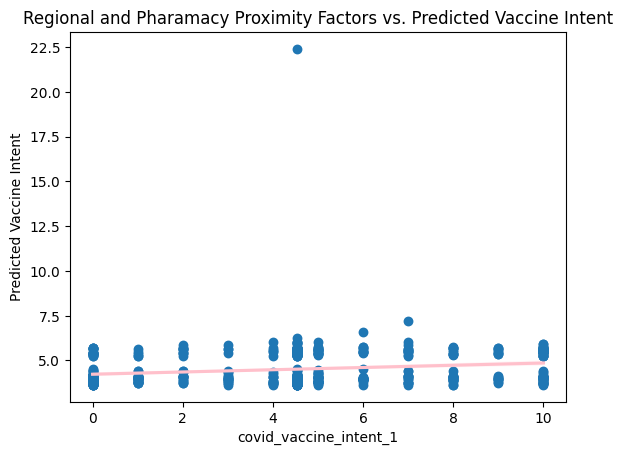

In [ ]:
_ = plt.scatter(y_test, predictions)
_ = plt.xlabel("Regional and Pharamacy Proximity Factors")
_ = plt.ylabel("Predicted Vaccine Intent")
_ = plt.title("Regional and Pharamacy Proximity Factors vs. Predicted Vaccine Intent")
_ = sns.regplot(x=y_test,
                y=predictions,
                scatter_kws={'alpha':0.2},
                line_kws={'color':'pink'})

plt.savefig('/content/drive/MyDrive/question1linearreg.png')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(r2)

0.0042911205707605315


This explains that 0.4% of the covid vaccine intent can be explained by the dataset and/or the variables chosen in this set. Barely anything!

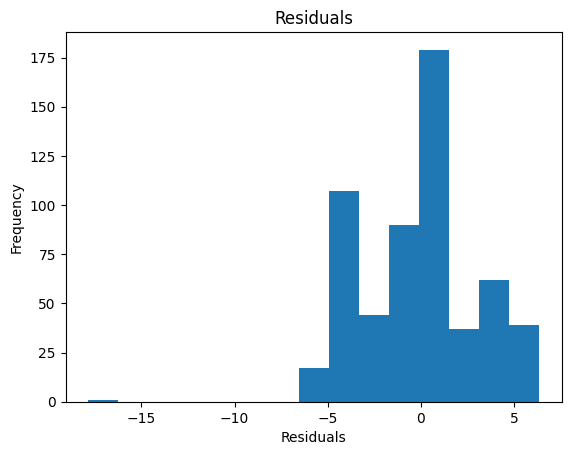

In [ ]:
_ = plt.hist(y_test - predictions, bins=15)
_= plt.xlabel("Residuals")
_= plt.ylabel("Frequency")
_= plt.title("Residuals")

In [ ]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, predictions)


mse = metrics.mean_squared_error(y_test, predictions)

rmse = metrics.root_mean_squared_error(y_test, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 2.452531990900115
MSE: 9.581503192970748
RMSE: 3.0954003283857725


In [ ]:
from sklearn.preprocessing import StandardScaler

# scaling the data of question_2
scaler = StandardScaler()
X = question_2[['video_length', 'video_race', 'treatment_group', 'income', 'health_insurance']]
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = ['video_length', 'video_race', 'treatment_group', 'income', 'health_insurance']
X.head()

video_length  video_race  treatment_group    income  health_insurance
0      2.460914   -1.003810         1.603140 -0.043968          1.056763
1     -0.406353   -1.003810         0.449007  0.684963          1.056763
2     -0.406353   -1.003810         0.449007  0.320498         -0.764092
3     -0.406353    0.996205        -0.128060  0.320498         -0.764092
4      2.460914   -1.003810         1.603140 -1.137364         -0.764092

In [ ]:
y= question_2['rating_trust']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2001)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)

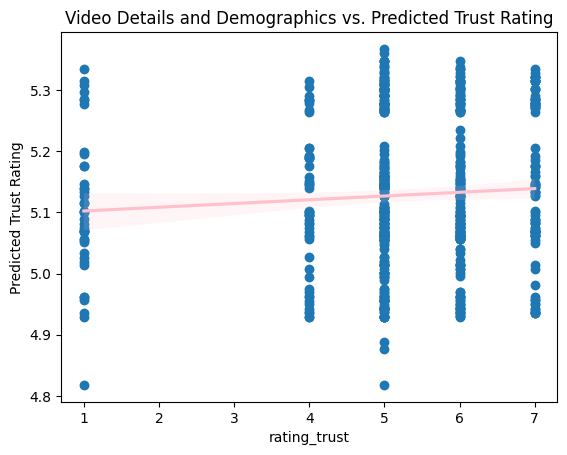

In [ ]:
_ = plt.scatter(y_test, predictions)
_ = plt.xlabel("Video Details and Demographics")
_ = plt.ylabel("Predicted Trust Rating")
_ = plt.title("Video Details and Demographics vs. Predicted Trust Rating")
_ = sns.regplot(x=y_test,
                y=predictions,
                scatter_kws={'alpha':0.2},
                line_kws={'color':'pink'})
plt.savefig('/content/drive/MyDrive/question2linearreg.png')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(r2)

0.0018527111474503366


In [ ]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, predictions)


mse = metrics.mean_squared_error(y_test, predictions)

rmse = metrics.root_mean_squared_error(y_test, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 0.9732354926906134
MSE: 2.061309132008972
RMSE: 1.4357259947528191


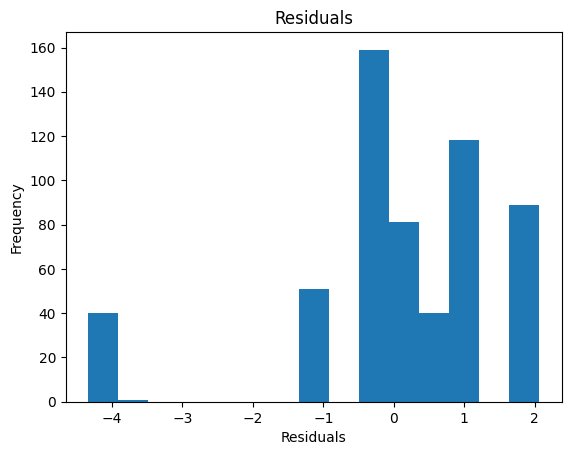

In [ ]:
_ = plt.hist(y_test - predictions, bins=15)
_= plt.xlabel("Residuals")
_= plt.ylabel("Frequency")
_= plt.title("Residuals")

This does not seem like a valueable model to base my dataset on. The histogram shows a very skewed to the right model and has a very low MAE, MSE, and RMSE for both of my questions. I was advised to see if this model could work but with the nature of my data, it isn't the right path. It is better to use a logistic regression model especially since my data outputs are catergorical and a good ROC curce graph could help piece together all the classifications within the data thta I'm using since there are alot of factors with each question!

# Logisitic Regression Model - Question 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
display(question_1.head())

pharmacy_lookup  treatment_group  covid_vaccine_intent_1  \
0                5                6                 1.00000   
1                6                4                 4.53899   
2                5                4                 4.53899   
3                5                3                 4.53899   
4                6                6                 4.53899   

   pharmacy_distance  region_midwest  region_northeast  region_south  \
0                3.0               0                 0             1   
1                1.0               0                 0             1   
2                3.0               0                 0             1   
3                1.0               1                 0             0   
4                1.0               0                 1             0   

   region_west  
0            0  
1            0  
2            0  
3            0  
4            0

In [ ]:
question_1_mean = question_1.copy()

In [ ]:
question_1_standardized = question_1_mean.copy()
for column in question_1_standardized.iloc[:,:-1]:
  question_1_standardized[column] = standardize(question_1_standardized[column])

question_1_standardized.head()

NameError: name 'standardize' is not defined

In [ ]:
lower_bound = question_1_standardized['covid_vaccine_intent_1'].min()
upper_bound = question_1_standardized['covid_vaccine_intent_1'].max()

bins = [
    lower_bound - 1e-6, # slightly less than min to make sure min value is included
    question_1_standardized['covid_vaccine_intent_1'].quantile(0.33),
    question_1_standardized['covid_vaccine_intent_1'].quantile(0.66),
    upper_bound + 1e-6  # same here with max
]
labels = ['Low', 'Medium', 'High']

In [ ]:
# creating a new column
question_1_standardized['covid_vaccine_intent_category'] = pd.cut(
    question_1_standardized['covid_vaccine_intent_1'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

print(question_1_standardized['covid_vaccine_intent_category'].value_counts())

In [ ]:
X = question_1_standardized.drop(columns=["covid_vaccine_intent_1", "covid_vaccine_intent_category"])

y = question_1_standardized["covid_vaccine_intent_category"]

print("Shape of X:", X.shape, " Shape of y:", y.shape)

In [ ]:
def standardize(data):
  """
  given a column of data, return a new column with all values standardized
  using z-score normalization.

  Arguments:
    data: Pandas column

  Return:
    Pandas column with values z-score standardized
  """
  mean = np.mean(data)
  std = np.std(data)

  standardized_data = (data - mean) / std
  return standardized_data

In [ ]:
question_1_standardized.info()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=16)
model.fit(X_train, y_train)


In [ ]:
X = question_1_standardized.drop(columns=["covid_vaccine_intent_1", "covid_vaccine_intent_category"])

# y will hold the outcomes (categorical bins)
y = question_1_standardized["covid_vaccine_intent_category"]

print("Shape of X:", X.shape, " Shape of y:", y.shape)

In [ ]:
predictions = model.predict(X_test)
print(predictions)
y_test.value_counts()

In [ ]:
unique, counts = np.unique(predictions, return_counts=True)
print(np.asarray((unique, counts)).T)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

In [ ]:
class_names = ["Low", "Medium", "High"]

_ = sns.heatmap(
    confusion_matrix(y_test, predictions),
    annot=True,
    fmt='g',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
    )
_ = plt.xlabel('Predicted')
_ = plt.ylabel('Actual')

plt.savefig('/content/drive/MyDrive/question1logcold.png')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# generate the classification report
class_names = ["Low", "Medium", "High"]
print(classification_report(y_test, predictions, target_names=class_names))


In [ ]:
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer

# Binarize y_test for one-vs-rest ROC curve
label_binarizer = LabelBinarizer().fit(y_train)
y_test_binarized = label_binarizer.transform(y_test)
y_pred_proba = model.predict_proba(X_test)

class_labels = label_binarizer.classes_

plt.figure(figsize=(10, 8))

for i, class_id in enumerate(class_labels):
    # For each class, the ROC curve is plotted
    false_pos_rate, true_pos_rate, _ = metrics.roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc = metrics.roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(false_pos_rate, true_pos_rate, label=f'Class {class_id} (AUC = {auc:.2f})')

_ = plt.title('ROC Curve for Multiclass Classification (One-vs-Rest)')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.legend(loc='lower right')
_ = plt.grid(True)
plt.savefig('/content/drive/MyDrive/question1roccurve.png')
plt.show()

# Logisitic Regression Model - Question 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
display(question_2.head())

video_length  video_race  treatment_group  health_insurance  income  \
0             1           0                6                 2       4   
1             0           0                4                 2       6   
2             0           0                4                 1       5   
3             0           1                3                 1       5   
4             1           0                6                 1       1   

   rating_trust  
0             6  
1             5  
2             6  
3             5  
4             5

In [ ]:
question_2_mean = question_2.copy()

In [ ]:
def standardize(data):
  """
  given a column of data, return a new column with all values standardized
  using z-score normalization.

  Arguments:
    data: Pandas column

  Return:
    Pandas column with values z-score standardized
  """
  mean = np.mean(data)
  std = np.std(data)

  standardized_data = (data - mean) / std
  return standardized_data

In [ ]:
question_2_standardized = question_2_mean.copy()
for column in question_2_standardized.iloc[:,:-1]:
  question_2_standardized[column] = standardize(question_2_standardized[column])

question_2_standardized.head()

video_length  video_race  treatment_group  health_insurance    income  \
0      2.460914   -1.003810         1.603140          1.056763 -0.043968   
1     -0.406353   -1.003810         0.449007          1.056763  0.684963   
2     -0.406353   -1.003810         0.449007         -0.764092  0.320498   
3     -0.406353    0.996205        -0.128060         -0.764092  0.320498   
4      2.460914   -1.003810         1.603140         -0.764092 -1.137364   

   rating_trust  
0             6  
1             5  
2             6  
3             5  
4             5

In [ ]:
X = question_2_standardized.drop(columns="rating_trust")

# y will hold the outcomes
y = question_2_standardized["rating_trust"]

print("Shape of X:", X.shape, " Shape of y:", y.shape)


Shape of X: (2893, 5)  Shape of y: (2893,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=16)
model.fit(X_train, y_train)


LogisticRegression(random_state=16)

In [ ]:
predictions = model.predict(X_test)
print(predictions)
y_test.value_counts()

[5 5 6 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5
 6 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 6 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5
 6 5 5 5 5 5 5 5 5 5 5 5 5 6 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5
 5 5 5 6 6 6 5 5 5 6 5 6 5 5 5 5 5 5 6 6 5 5 5 5 5 6 5 6 5 5 5 5 5 5 5 5 6
 6 5 5 6 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 6 5 6 5 6 5 5 5 5 6 5 5 5
 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 6 6 5
 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 6 5 5 6 5 5 5 6 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5
 5 5 5 5 6 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 6 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 6 5 5 5 5 6 5 6 5 5 5 5 6 5 6 5 5 5 6
 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 

rating_trust
5    255
6    228
7    112
4     67
1     62
Name: count, dtype: int64

In [ ]:
unique, counts = np.unique(predictions, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  5 648]
 [  6  76]]


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[  0,   0,  59,   3,   0],
       [  0,   0,  60,   7,   0],
       [  0,   0, 230,  25,   0],
       [  0,   0, 199,  29,   0],
       [  0,   0, 100,  12,   0]])

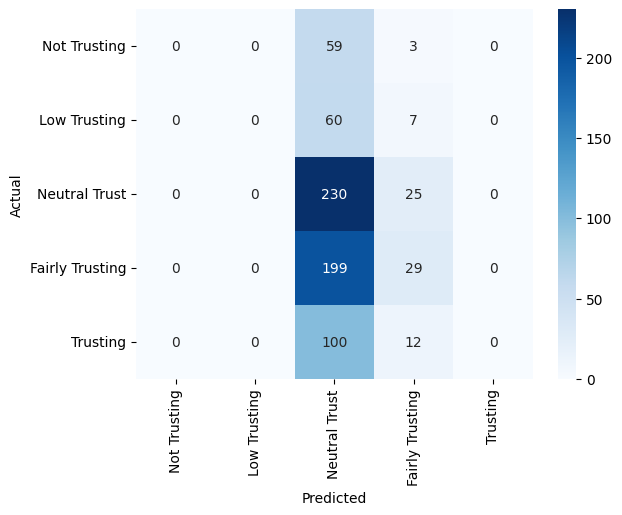

In [ ]:
class_names = ["Not Trusting", "Low Trusting", "Neutral Trust", "Fairly Trusting", "Trusting"]

_ = sns.heatmap(
    confusion_matrix(y_test, predictions),
    annot=True,
    fmt='g',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
    )
_ = plt.xlabel('Predicted')
_ = plt.ylabel('Actual')
plt.savefig('/content/drive/MyDrive/question2logcold.png')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# generate the classification report
class_names = ["Not Trusting", "Low Trusting", "Neutral Trust", "Fairly Trusting", "Trusting"]
print(classification_report(y_test, predictions, target_names=class_names))


                 precision    recall  f1-score   support

   Not Trusting       0.00      0.00      0.00        62
   Low Trusting       0.00      0.00      0.00        67
  Neutral Trust       0.35      0.90      0.51       255
Fairly Trusting       0.38      0.13      0.19       228
       Trusting       0.00      0.00      0.00       112

       accuracy                           0.36       724
      macro avg       0.15      0.21      0.14       724
   weighted avg       0.25      0.36      0.24       724



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


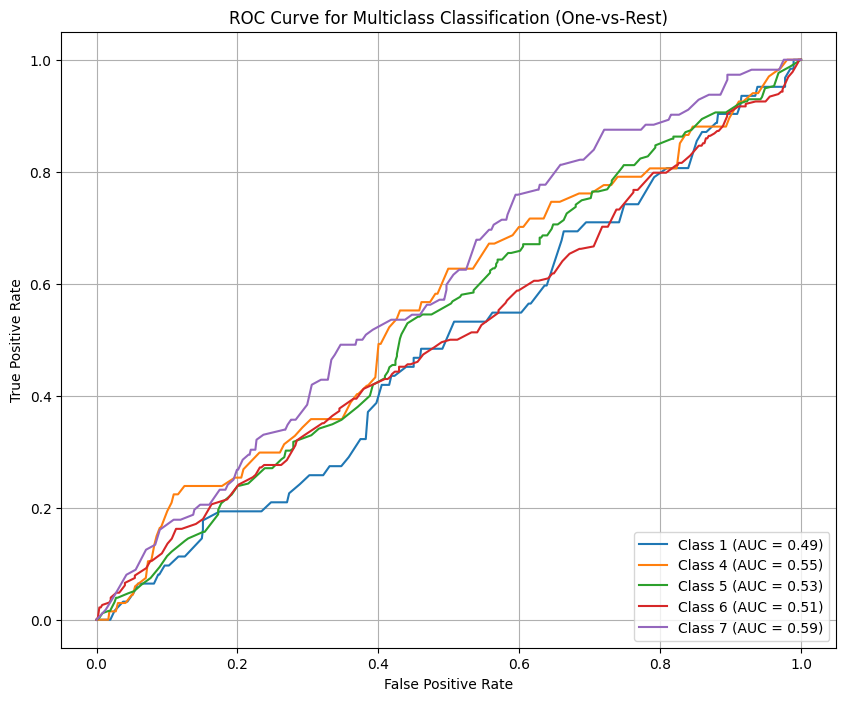

In [ ]:
# making sure this is the right model to use in this case! YES! YAYYYY
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer

# Binarize y_test for one-vs-rest ROC curve
label_binarizer = LabelBinarizer().fit(y_train)
y_test_binarized = label_binarizer.transform(y_test)
y_pred_proba = model.predict_proba(X_test)

class_labels = label_binarizer.classes_

plt.figure(figsize=(10, 8))

for i, class_id in enumerate(class_labels):
    # For each class, the ROC curve is plotted
    false_pos_rate, true_pos_rate, _ = metrics.roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc = metrics.roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(false_pos_rate, true_pos_rate, label=f'Class {class_id} (AUC = {auc:.2f})')

_ = plt.title('ROC Curve for Multiclass Classification (One-vs-Rest)')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.legend(loc='lower right')
_ = plt.grid(True)
plt.savefig('/content/drive/MyDrive/question2roccurve.png')
plt.show()


# NON-LINEAR REGRESSION MODELS

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_q1 = question_1[['pharmacy_lookup', 'pharmacy_distance', 'treatment_group', 'region_midwest', 'region_northeast', 'region_south', 'region_west']]
y_q1 = question_1['covid_vaccine_intent_1']

# scaling
scaler_q1 = StandardScaler()
X_q1_scaled = scaler_q1.fit_transform(X_q1)
X_q1_scaled_df = pd.DataFrame(X_q1_scaled, columns=X_q1.columns)

In [ ]:
# Generate polynomial features (degree 2)
poly_q1 = PolynomialFeatures(degree=2, include_bias=False)
X_q1_poly = poly_q1.fit_transform(X_q1_scaled_df)
X_q1_poly_df = pd.DataFrame(X_q1_poly, columns=poly_q1.get_feature_names_out(X_q1_scaled_df.columns))

# Splitting data into training and testing sets
X_train_q1, X_test_q1, y_train_q1, y_test_q1 = train_test_split(X_q1_poly_df, y_q1, test_size=0.2, random_state=2001)

In [ ]:
# Train Polynomial Regression model
poly_model_q1 = LinearRegression()
poly_model_q1.fit(X_train_q1, y_train_q1)

# Predictions
predictions_q1 = poly_model_q1.predict(X_test_q1)
print(predictions_q1)

[   3.99667451    4.1346686     4.10753241    3.82589566    5.28581747
    3.99893606    5.55729169    5.57846002    5.44741558    3.83528379
    5.38846979    4.00910757    4.40265054    4.13423383    3.6633867
    3.80643918    5.27665022    3.84054589    4.12299507    3.85512029
    5.70326174    3.75523009    4.42810708    3.76484609    3.98487317
    5.55729169    3.98342293    4.12711223    5.35925734    3.77442798
    4.12299507    7.25394175    4.1277787     3.86188671    4.00910757
    5.21327792    4.10753241    5.2898187     3.82465512    5.19627301
    4.42810708    5.52609639    5.19512804    3.80245826    4.04660631
    6.14768447    3.71092679    4.272269      5.21327792    3.80245826
    3.81867009    3.82087904    4.10753241    5.35925734    5.61533201
    4.00385196    3.79430116    3.99618537    3.86061962    5.21327792
    3.97291026    5.57185295    3.76484609    4.74401974    4.12551287
    4.12299507    3.85642484    5.61533201    5.97705955    3.77442798
    5.2

In [ ]:
# Model Performance
r2_q1 = r2_score(y_test_q1, predictions_q1)
mae_q1 = mean_absolute_error(y_test_q1, predictions_q1)
mse_q1 = mean_squared_error(y_test_q1, predictions_q1)
rmse_q1 = np.sqrt(mse_q1)

print(f"R-squared: {r2_q1:.4f}")
print(f"MAE: {mae_q1:.4f}")
print(f"MSE: {mse_q1:.4f}")
print(f"RMSE: {rmse_q1:.4f}")

R-squared: -34.5525
MAE: 3.1990
MSE: 342.1141
RMSE: 18.4963


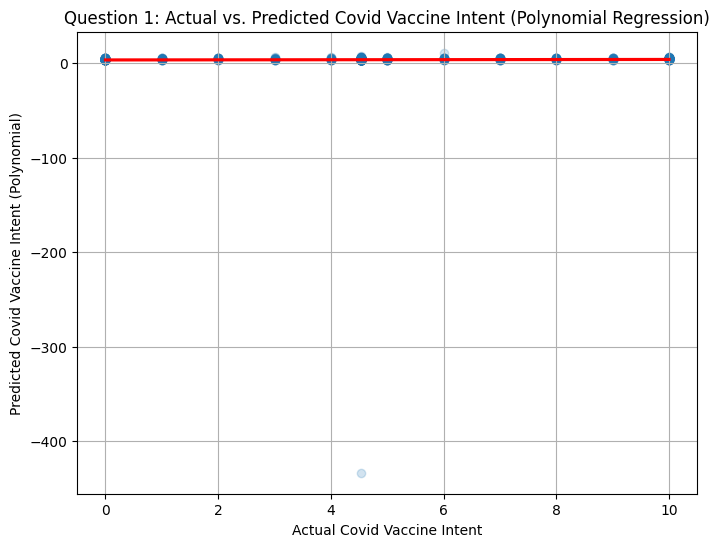

In [ ]:
# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test_q1, y=predictions_q1, scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.xlabel("Actual Covid Vaccine Intent")
plt.ylabel("Predicted Covid Vaccine Intent (Polynomial)")
plt.title("Question 1: Actual vs. Predicted Covid Vaccine Intent (Polynomial Regression)")
plt.grid(True)
plt.savefig('/content/drive/MyDrive/question1_poly_reg_scatter.png')
plt.show()

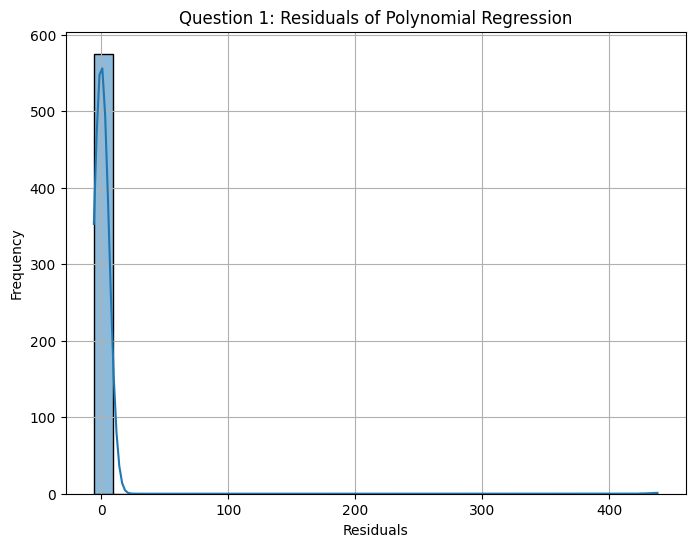

In [ ]:
# Visualize residuals
plt.figure(figsize=(8, 6))
sns.histplot(y_test_q1 - predictions_q1, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Question 1: Residuals of Polynomial Regression")
plt.grid(True)
plt.savefig('/content/drive/MyDrive/question1_poly_reg_residuals.png')
plt.show()

In [ ]:
# Define features and target for question_2
X_q2 = question_2[['video_length', 'video_race', 'treatment_group', 'income', 'health_insurance']]
y_q2 = question_2['rating_trust']

# Scale features
scaler_q2 = StandardScaler()
X_q2_scaled = scaler_q2.fit_transform(X_q2)
X_q2_scaled_df = pd.DataFrame(X_q2_scaled, columns=X_q2.columns)

In [ ]:
# Generate polynomial features (degree 2)
poly_q2 = PolynomialFeatures(degree=2, include_bias=False)
X_q2_poly = poly_q2.fit_transform(X_q2_scaled_df)
X_q2_poly_df = pd.DataFrame(X_q2_poly, columns=poly_q2.get_feature_names_out(X_q2_scaled_df.columns))

# Split data into training and testing sets
X_train_q2, X_test_q2, y_train_q2, y_test_q2 = train_test_split(X_q2_poly_df, y_q2, test_size=0.2, random_state=2001)

In [ ]:
# Train Polynomial Regression model
poly_model_q2 = LinearRegression()
poly_model_q2.fit(X_train_q2, y_train_q2)

# Make predictions
predictions_q2 = poly_model_q2.predict(X_test_q2)
print(predictions_q2)

[4.79759053 5.22043452 5.14318809 5.12044354 5.08438547 5.22740253
 5.08985843 4.6235765  5.34265764 5.15308767 5.04097829 4.81839306
 5.5367381  5.39705799 5.29082955 5.08438547 4.65107583 5.14082999
 4.83877658 5.10084215 5.06220384 5.14318809 5.04777154 5.24911805
 5.33974719 5.12776601 4.61405842 5.08985843 5.53018606 4.81839306
 5.07423902 4.5870874  5.4251822  5.33451268 5.36127245 4.96824147
 5.14318809 5.39705799 5.38895997 5.06220384 5.48738346 5.44151918
 5.12776601 5.13952685 5.24911805 4.6235765  5.27153324 5.10084215
 5.24911805 4.73358167 5.32062285 5.00585621 5.08985843 5.38895997
 5.24911805 5.37480401 4.8476583  4.98388858 5.08438547 5.10084215
 4.83877658 5.34265764 5.12044354 4.8476583  5.34695331 5.04097829
 5.03009319 4.5870874  5.33974719 5.34695331 5.255196   5.4825766
 5.04777154 5.34695331 5.14466441 5.14318809 5.47228976 5.22043452
 5.04128664 4.8476583  5.15308767 5.15308767 5.12044354 4.50464752
 4.6235765  5.39683026 5.31398512 5.22740253 5.5153368  5.06220

In [ ]:
# Evaluate model performance
r2_q2 = r2_score(y_test_q2, predictions_q2)
mae_q2 = mean_absolute_error(y_test_q2, predictions_q2)
mse_q2 = mean_squared_error(y_test_q2, predictions_q2)
rmse_q2 = np.sqrt(mse_q2)

print(f"R-squared: {r2_q2:.4f}")
print(f"MAE: {mae_q2:.4f}")
print(f"MSE: {mse_q2:.4f}")
print(f"RMSE: {rmse_q2:.4f}")

R-squared: -0.0120
MAE: 0.9964
MSE: 2.0900
RMSE: 1.4457


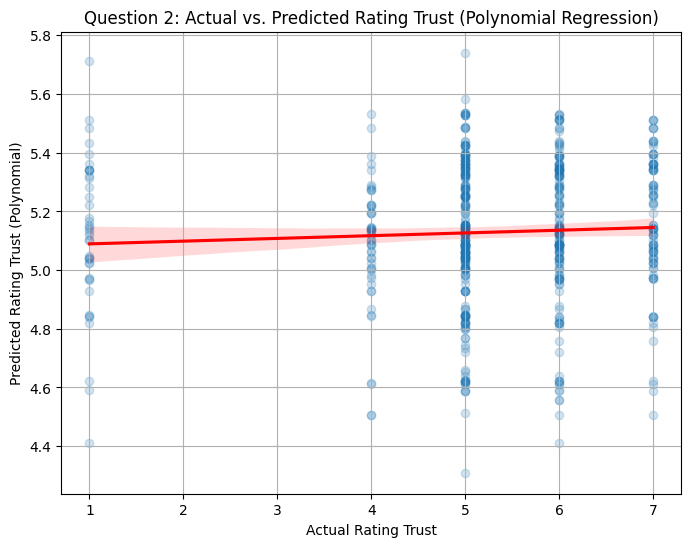

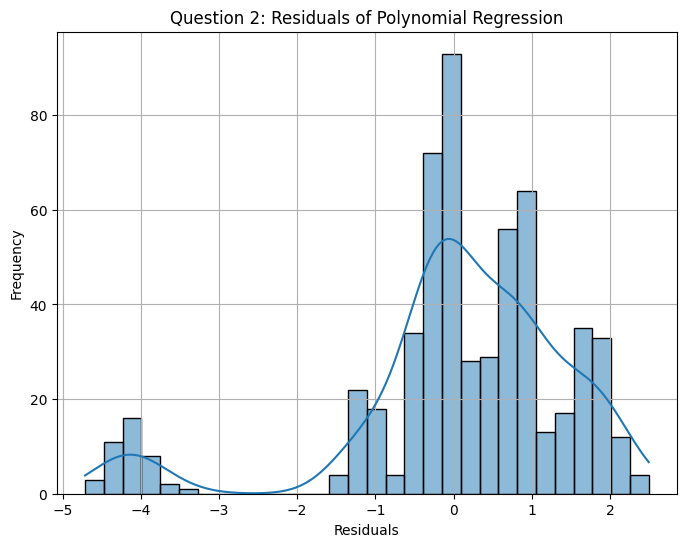

In [ ]:
# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test_q2, y=predictions_q2, scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.xlabel("Actual Rating Trust")
plt.ylabel("Predicted Rating Trust (Polynomial)")
plt.title("Question 2: Actual vs. Predicted Rating Trust (Polynomial Regression)")
plt.grid(True)
plt.savefig('/content/drive/MyDrive/question2_poly_reg_scatter.png')
plt.show()

# Visualize residuals
plt.figure(figsize=(8, 6))
sns.histplot(y_test_q2 - predictions_q2, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Question 2: Residuals of Polynomial Regression")
plt.grid(True)
plt.savefig('/content/drive/MyDrive/question2_poly_reg_residuals.png')
plt.show()

In [ ]:
print("Comparison of Linear vs. Polynomial Regression")
print("Question 1: Covid Vaccine Intent Prediction")
print("Linear Regression (from previous cell):")
print("R-squared: 0.0043, MAE: 2.4525, MSE: 9.5815, RMSE: 3.0954")
print("Polynomial Regression (degree=2):")
print("R-squared: {r2_q1:.4f}, MAE: {mae_q1:.4f}, MSE: {mse_q1:.4f}, RMSE: {rmse_q1:.4f}")

print("Question 2: Rating Trust Prediction")
print(f"  Linear Regression (from previous cell):")
print(f"    R-squared: 0.0019, MAE: 0.9732, MSE: 2.0613, RMSE: 1.4357")
print(f"  Polynomial Regression (degree=2):")
print(f"    R-squared: {r2_q2:.4f}, MAE: {mae_q2:.4f}, MSE: {mse_q2:.4f}, RMSE: {rmse_q2:.4f}")

Comparison of Linear vs. Polynomial Regression
Question 1: Covid Vaccine Intent Prediction
Linear Regression (from previous cell):
R-squared: 0.0043, MAE: 2.4525, MSE: 9.5815, RMSE: 3.0954
Polynomial Regression (degree=2):
R-squared: {r2_q1:.4f}, MAE: {mae_q1:.4f}, MSE: {mse_q1:.4f}, RMSE: {rmse_q1:.4f}
Question 2: Rating Trust Prediction
  Linear Regression (from previous cell):
    R-squared: 0.0019, MAE: 0.9732, MSE: 2.0613, RMSE: 1.4357
  Polynomial Regression (degree=2):
    R-squared: -0.0120, MAE: 0.9964, MSE: 2.0900, RMSE: 1.4457


## Polynomial Feature Engineering for question_1

### Subtask:
Generate polynomial features for relevant numerical columns in the `question_1` dataset to capture non-linear relationships with 'covid_vaccine_intent_1'.


**Reasoning**:
The subtask requires generating polynomial features for the `question_1` dataset. The first step is to define the feature matrix `X_q1` and the target variable `y_q1` from the `question_1` DataFrame as per the instructions.

